Features of the dataset:

ID: Unique identifier for each delivery.

Delivery_person_ID: Unique identifier for each delivery person.

Delivery_person_Age: Age of the delivery person.

Delivery_person_Ratings: Ratings assigned to the delivery person.

Restaurant_latitude: Latitude of the restaurant.

Restaurant_longitude: Longitude of the restaurant.

Delivery_location_latitude: Latitude of the delivery location.

Delivery_location_longitude: Longitude of the delivery location.

Order_Date: Date of the order.

Time_Ordered: Time the order was placed.

Time_Order_picked: Time the order was picked up for delivery.

Weather_conditions: Weather conditions at the time of delivery.

Road_traffic_density: Density of road traffic during delivery.

Vehicle_condition: Condition of the delivery vehicle.

Type_of_order: Type of order (e.g., dine-in, takeaway, delivery).

Type_of_vehicle: Type of vehicle used for delivery.

Multiple_deliveries: Indicator of whether multiple deliveries were made in the
same trip.

Festival: Indicator of whether the delivery coincided with a festival.

City: City where the delivery took place.

Time_taken (min): Time taken for delivery in minutes.

In [1]:
!wget -O test.csv "https://drive.google.com/uc?id=1CpLbd8Z_6kfDVyjwbaqOATliJmVdljqT"
!wget -O train.csv "https://drive.google.com/uc?id=159HvkY-x8Rn26Y1WUscDNNkqZVZhYl1T"
!wget -O delivery_banner.png "https://drive.google.com/uc?id=1U4wc3rXQ4RcGtH50E5T1IM6ilirEdsbV"

--2025-06-21 07:47:42--  https://drive.google.com/uc?id=1CpLbd8Z_6kfDVyjwbaqOATliJmVdljqT
Resolving drive.google.com (drive.google.com)... 142.250.145.101, 142.250.145.139, 142.250.145.138, ...
Connecting to drive.google.com (drive.google.com)|142.250.145.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1CpLbd8Z_6kfDVyjwbaqOATliJmVdljqT [following]
--2025-06-21 07:47:42--  https://drive.usercontent.google.com/download?id=1CpLbd8Z_6kfDVyjwbaqOATliJmVdljqT
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.128.132, 2a00:1450:4013:c02::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.128.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1839370 (1.8M) [application/octet-stream]
Saving to: ‘test.csv’

test.csv            100%[===================>]   1.75M  --.-KB/s    in 0.01s   

2025-06-21 07:47:44 (138 MB/s) - 

In [2]:
# Import Packages for Streamlit

!pip install streamlit streamlit-folium folium pyngrok


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 62.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.4/328.4 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 60.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.4 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statistics
from geopy.distance import geodesic

from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

from statsmodels.tsa.holtwinters import ExponentialSmoothing

import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Sharath's code to upload the train.csv and test.csv files to the content directory
#!wget -O test.csv "https://drive.google.com/uc?id=1CpLbd8Z_6kfDVyjwbaqOATliJmVdljqT"
#!wget -O train.csv "https://drive.google.com/uc?id=159HvkY-x8Rn26Y1WUscDNNkqZVZhYl1T"


import os
from google.colab import files
#uploaded = files.upload()
current_files = os.listdir()
current_path = os.getcwd()
print(f"Current working directory: {current_path}")
print(f"Files: {current_files}")

Current working directory: /content
Files: ['.config', 'test.csv', 'delivery_banner.png', 'train.csv', 'sample_data']


In [5]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [6]:
df_train.head()

ID Delivery_person_ID Delivery_person_Age Delivery_person_Ratings  \
0  0x4607     INDORES13DEL02                   37                     4.9   
1  0xb379     BANGRES18DEL02                   34                     4.5   
2  0x5d6d     BANGRES19DEL01                   23                     4.4   
3  0x7a6a    COIMBRES13DEL02                   38                     4.7   
4  0x70a2     CHENRES12DEL01                   32                     4.6   

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0            22.745049             75.892471                   22.765049   
1            12.913041             77.683237                   13.043041   
2            12.914264             77.678400                   12.924264   
3            11.003669             76.976494                   11.053669   
4            12.972793             80.249982                   13.012793   

   Delivery_location_longitude  Order_Date Time_Orderd Time_Order_picked  \
0                    75.912471  19-03-2022    11:30:00          11:45:00   
1                    77.813237  25-03-2022    19:45:00          19:50:00   
2                    77.688400  19-03-2022    08:30:00          08:45:00   
3                    77.026494  05-04-2022    18:00:00          18:10:00   
4                    80.289982  26-03-2022    13:30:00          13:45:00   

       Weatherconditions Road_traffic_density  Vehicle_condition  \
0       conditions Sunny                High                   2   
1      conditions Stormy                 Jam                   2   
2  conditions Sandstorms                 Low                   0   
3       conditions Sunny              Medium                   0   
4      conditions Cloudy                High                   1   

  Type_of_order Type_of_vehicle multiple_deliveries Festival            City  \
0        Snack      motorcycle                    0      No           Urban    
1        Snack         scooter                    1      No   Metropolitian    
2       Drinks      motorcycle                    1      No           Urban    
3       Buffet      motorcycle                    1      No   Metropolitian    
4        Snack         scooter                    1      No   Metropolitian    

  Time_taken(min)  
0        (min) 24  
1        (min) 33  
2        (min) 26  
3        (min) 21  
4        (min) 30

In [7]:
df_train.info()
df_train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
count         45593.000000          45593.000000                45593.000000   
mean             17.017729             70.231332                   17.465186   
std               8.185109             22.883647                    7.335122   
min             -30.905562            -88.366217                    0.010000   
25%              12.933284             73.170000                   12.988453   
50%              18.546947             75.898497                   18.633934   
75%              22.728163             78.044095                   22.785049   
max              30.914057             88.433452                   31.054057   

       Delivery_location_longitude  Vehicle_condition  
count                 45593.000000       45593.000000  
mean                     70.845702           1.023359  
std                      21.118812           0.839065  
min                       0.010000           0.000000  
25%                      73.280000           0.000000  
50%                      76.002574           1.000000  
75%                      78.107044           2.000000  
max                      88.563452           3.000000

In [8]:
df_test.info()
df_test.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11399 entries, 0 to 11398
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           11399 non-null  object 
 1   Delivery_person_ID           11399 non-null  object 
 2   Delivery_person_Age          11399 non-null  object 
 3   Delivery_person_Ratings      11399 non-null  object 
 4   Restaurant_latitude          11399 non-null  float64
 5   Restaurant_longitude         11399 non-null  float64
 6   Delivery_location_latitude   11399 non-null  float64
 7   Delivery_location_longitude  11399 non-null  float64
 8   Order_Date                   11399 non-null  object 
 9   Time_Orderd                  11399 non-null  object 
 10  Time_Order_picked            11399 non-null  object 
 11  Weatherconditions            11399 non-null  object 
 12  Road_traffic_density         11399 non-null  object 
 13  Vehicle_conditio

Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
count         11399.000000          11399.000000                11399.000000   
mean             17.099934             70.399259                   17.569497   
std               8.193510             22.773144                    7.287440   
min             -30.902872            -88.400467                    0.010000   
25%              12.933284             73.170937                   12.992532   
50%              18.551440             75.897429                   18.643481   
75%              22.732225             78.045732                   22.791226   
max              30.914057             88.433452                   31.054057   

       Delivery_location_longitude  Vehicle_condition  
count                 11399.000000       11399.000000  
mean                     71.102187           1.031406  
std                      20.693782           0.839599  
min                       0.010000           0.000000  
25%                      73.771081           0.000000  
50%                      75.996959           1.000000  
75%                      78.109004           2.000000  
max                      88.563452           3.000000

In [9]:
df_train["Delivery_person_ID"].nunique()

1320

In [10]:
df_test["Delivery_person_ID"].nunique()

1297

**Key Features That Likely Influence Driver Demand**

1. **Time-Based Factors**

* Order_Date, Time_Orderd, Time_Order_picked: Demand is likely higher during lunch, dinner, weekends, and festival days.

2. **Location & Geography**

* Restaurant_latitude, Restaurant_longitude, Delivery_location_latitude, Delivery_location_longitude: Areas with more restaurants or dense populations will have higher demand.

3. **Weather Conditions**

* Weatherconditions: Bad weather (rain, storms) might increase demand (more orders) but reduce driver availability.

4. **Traffic & Road Conditions**

* Road_traffic_density: High traffic might affect delivery times but also indicate areas with high demand.

* Vehicle_condition: Poor vehicle condition could slow deliveries, leading to higher demand for additional drivers.

5. **Order & Delivery Complexity**

* Type_of_order, multiple_deliveries: Large or multiple deliveries might require more drivers.

* Festival: Festivals can increase demand due to higher food orders.

6. **City-Specific Trends**

* City: Some cities may have inherently higher demand based on population and restaurant density.


**India does not have negative latitudes or longitudes. India's mainland is entirely located in the Northern Hemisphere, so all its latitudes are positive. Similarly, all longitudes in India are east of the Prime Meridian, thus positive.**

In [11]:
## Function to clean the dataset
def clean_dataframe(df, is_test=False):
    ## Dropping these columns since they do not have an impact on Driver Demand
    df.drop(columns=["ID", "Delivery_person_Age", "Delivery_person_Ratings"], inplace=True)

    df['Festival_Binary'] = df['Festival'].apply(lambda x: '1' if x == 'Yes' else 0)

    # Clean Weatherconditions column
    df["Weatherconditions"] = df["Weatherconditions"].astype(str).str.replace("conditions", "", regex=False).str.strip().replace("", pd.NA)

    # Clean Time_taken(min) column — only if not test
    if not is_test:
        df["Time_taken(min)"] = (
            df["Time_taken(min)"]
            .astype(str)
            .str.replace(r"\(min\)", "", regex=True)
            .str.strip()
            .replace("", pd.NA)
            .astype(float)
        )

    # Extract City_Code from Delivery_person_ID
    df["City_Code"] = df["Delivery_person_ID"].str.extract(r"^(.*?)RES")

    # Add rounded latitude and longitude columns
    df["Restaurant_latitude_rounded"] = df["Restaurant_latitude"].round(4)
    df["Restaurant_longitude_rounded"] = df["Restaurant_longitude"].round(4)
    df["Delivery_location_latitude_rounded"] = df["Delivery_location_latitude"].round(4)
    df["Delivery_location_longitude_rounded"] = df["Delivery_location_longitude"].round(4)

    df['Restaurant_latitude_1'] = df['Restaurant_latitude'].abs()
    df['Restaurant_longitude_1'] = df['Restaurant_longitude'].abs()
    df['Delivery_location_latitude_1'] = df['Delivery_location_latitude'].abs()
    df['Delivery_location_longitude_1'] = df['Delivery_location_longitude'].abs()

    # Count and remove duplicates
    total_rows = len(df)
    duplicate_count = df.duplicated().sum()
    duplicate_percentage = (duplicate_count / total_rows) * 100

    print(f"Number of duplicate rows: {duplicate_count}")
    print(f"Percentage of duplicate rows: {duplicate_percentage:.2f}%")
    #df = df.drop_duplicates()

    return df.head()

In [12]:
clean_dataframe(df_train, is_test=False)

Number of duplicate rows: 0
Percentage of duplicate rows: 0.00%


Delivery_person_ID  Restaurant_latitude  Restaurant_longitude  \
0    INDORES13DEL02             22.745049             75.892471   
1    BANGRES18DEL02             12.913041             77.683237   
2    BANGRES19DEL01             12.914264             77.678400   
3   COIMBRES13DEL02             11.003669             76.976494   
4    CHENRES12DEL01             12.972793             80.249982   

   Delivery_location_latitude  Delivery_location_longitude  Order_Date  \
0                   22.765049                    75.912471  19-03-2022   
1                   13.043041                    77.813237  25-03-2022   
2                   12.924264                    77.688400  19-03-2022   
3                   11.053669                    77.026494  05-04-2022   
4                   13.012793                    80.289982  26-03-2022   

  Time_Orderd Time_Order_picked Weatherconditions Road_traffic_density  ...  \
0    11:30:00          11:45:00             Sunny                High   ...   
1    19:45:00          19:50:00            Stormy                 Jam   ...   
2    08:30:00          08:45:00        Sandstorms                 Low   ...   
3    18:00:00          18:10:00             Sunny              Medium   ...   
4    13:30:00          13:45:00            Cloudy                High   ...   

   Festival_Binary City_Code Restaurant_latitude_rounded  \
0                0      INDO                     22.7450   
1                0      BANG                     12.9130   
2                0      BANG                     12.9143   
3                0     COIMB                     11.0037   
4                0      CHEN                     12.9728   

  Restaurant_longitude_rounded Delivery_location_latitude_rounded  \
0                      75.8925                            22.7650   
1                      77.6832                            13.0430   
2                      77.6784                            12.9243   
3                      76.9765                            11.0537   
4                      80.2500                            13.0128   

  Delivery_location_longitude_rounded  Restaurant_latitude_1  \
0                             75.9125              22.745049   
1                             77.8132              12.913041   
2                             77.6884              12.914264   
3                             77.0265              11.003669   
4                             80.2900              12.972793   

   Restaurant_longitude_1 Delivery_location_latitude_1  \
0               75.892471                    22.765049   
1               77.683237                    13.043041   
2               77.678400                    12.924264   
3               76.976494                    11.053669   
4               80.249982                    13.012793   

   Delivery_location_longitude_1  
0                      75.912471  
1                      77.813237  
2                      77.688400  
3                      77.026494  
4                      80.289982  

[5 rows x 27 columns]

In [13]:
clean_dataframe(df_test, is_test=True)

Number of duplicate rows: 0
Percentage of duplicate rows: 0.00%


Delivery_person_ID  Restaurant_latitude  Restaurant_longitude  \
0   COIMBRES13DEL01             11.003669             76.976494   
1    BANGRES15DEL01             12.975377             77.696664   
2     JAPRES09DEL03             26.911378             75.789034   
3     JAPRES07DEL03             26.766536             75.837333   
4    CHENRES19DEL01             12.986047             80.218114   

   Delivery_location_latitude  Delivery_location_longitude  Order_Date  \
0                   11.043669                    77.016494  30-03-2022   
1                   13.085377                    77.806664  29-03-2022   
2                   27.001378                    75.879034  10-03-2022   
3                   26.856536                    75.927333  02-04-2022   
4                   13.096047                    80.328114  27-03-2022   

  Time_Orderd Time_Order_picked Weatherconditions Road_traffic_density  ...  \
0        NaN           15:05:00               NaN                 NaN   ...   
1    20:30:00          20:35:00             Windy                 Jam   ...   
2    19:35:00          19:45:00            Stormy                 Jam   ...   
3    17:15:00          17:20:00               Fog              Medium   ...   
4    18:25:00          18:40:00             Sunny              Medium   ...   

   Festival_Binary City_Code Restaurant_latitude_rounded  \
0                0     COIMB                     11.0037   
1                0      BANG                     12.9754   
2                0       JAP                     26.9114   
3                0       JAP                     26.7665   
4                0      CHEN                     12.9860   

  Restaurant_longitude_rounded Delivery_location_latitude_rounded  \
0                      76.9765                            11.0437   
1                      77.6967                            13.0854   
2                      75.7890                            27.0014   
3                      75.8373                            26.8565   
4                      80.2181                            13.0960   

  Delivery_location_longitude_rounded  Restaurant_latitude_1  \
0                             77.0165              11.003669   
1                             77.8067              12.975377   
2                             75.8790              26.911378   
3                             75.9273              26.766536   
4                             80.3281              12.986047   

  Restaurant_longitude_1  Delivery_location_latitude_1  \
0              76.976494                     11.043669   
1              77.696664                     13.085377   
2              75.789034                     27.001378   
3              75.837333                     26.856536   
4              80.218114                     13.096047   

   Delivery_location_longitude_1  
0                      77.016494  
1                      77.806664  
2                      75.879034  
3                      75.927333  
4                      80.328114  

[5 rows x 26 columns]

In [14]:
def extract_date_features(df):
    df['Order_Date'] = pd.to_datetime(df['Order_Date'])
    df["day"] = df.Order_Date.dt.day
    df['day_of_week'] = df.Order_Date.dt.day_of_week.astype(int)
    df['day_name'] = df.Order_Date.dt.day_name()
    df['is_weekend'] = np.where(df['day_of_week'].isin([5,6]),1,0)

    # Extract hour from Time_Orderd and Time_Order_picked
    df['Order_Picked_Hour'] = pd.to_datetime(df['Time_Order_picked'], format='%H:%M:%S', errors='coerce').dt.hour
    df['Order_Hour'] = pd.to_datetime(df['Time_Orderd'], format='%H:%M:%S', errors='coerce').dt.hour

    return df.head()

In [15]:
extract_date_features(df_train)

Delivery_person_ID  Restaurant_latitude  Restaurant_longitude  \
0    INDORES13DEL02             22.745049             75.892471   
1    BANGRES18DEL02             12.913041             77.683237   
2    BANGRES19DEL01             12.914264             77.678400   
3   COIMBRES13DEL02             11.003669             76.976494   
4    CHENRES12DEL01             12.972793             80.249982   

   Delivery_location_latitude  Delivery_location_longitude Order_Date  \
0                   22.765049                    75.912471 2022-03-19   
1                   13.043041                    77.813237 2022-03-25   
2                   12.924264                    77.688400 2022-03-19   
3                   11.053669                    77.026494 2022-04-05   
4                   13.012793                    80.289982 2022-03-26   

  Time_Orderd Time_Order_picked Weatherconditions Road_traffic_density  ...  \
0    11:30:00          11:45:00             Sunny                High   ...   
1    19:45:00          19:50:00            Stormy                 Jam   ...   
2    08:30:00          08:45:00        Sandstorms                 Low   ...   
3    18:00:00          18:10:00             Sunny              Medium   ...   
4    13:30:00          13:45:00            Cloudy                High   ...   

   Restaurant_latitude_1 Restaurant_longitude_1 Delivery_location_latitude_1  \
0              22.745049              75.892471                    22.765049   
1              12.913041              77.683237                    13.043041   
2              12.914264              77.678400                    12.924264   
3              11.003669              76.976494                    11.053669   
4              12.972793              80.249982                    13.012793   

  Delivery_location_longitude_1 day day_of_week  day_name  is_weekend  \
0                     75.912471  19           5  Saturday           1   
1                     77.813237  25           4    Friday           0   
2                     77.688400  19           5  Saturday           1   
3                     77.026494   5           1   Tuesday           0   
4                     80.289982  26           5  Saturday           1   

  Order_Picked_Hour  Order_Hour  
0                11        11.0  
1                19        19.0  
2                 8         8.0  
3                18        18.0  
4                13        13.0  

[5 rows x 33 columns]

In [16]:
extract_date_features(df_test)

Delivery_person_ID  Restaurant_latitude  Restaurant_longitude  \
0   COIMBRES13DEL01             11.003669             76.976494   
1    BANGRES15DEL01             12.975377             77.696664   
2     JAPRES09DEL03             26.911378             75.789034   
3     JAPRES07DEL03             26.766536             75.837333   
4    CHENRES19DEL01             12.986047             80.218114   

   Delivery_location_latitude  Delivery_location_longitude Order_Date  \
0                   11.043669                    77.016494 2022-03-30   
1                   13.085377                    77.806664 2022-03-29   
2                   27.001378                    75.879034 2022-03-10   
3                   26.856536                    75.927333 2022-04-02   
4                   13.096047                    80.328114 2022-03-27   

  Time_Orderd Time_Order_picked Weatherconditions Road_traffic_density  ...  \
0        NaN           15:05:00               NaN                 NaN   ...   
1    20:30:00          20:35:00             Windy                 Jam   ...   
2    19:35:00          19:45:00            Stormy                 Jam   ...   
3    17:15:00          17:20:00               Fog              Medium   ...   
4    18:25:00          18:40:00             Sunny              Medium   ...   

   Restaurant_latitude_1 Restaurant_longitude_1 Delivery_location_latitude_1  \
0              11.003669              76.976494                    11.043669   
1              12.975377              77.696664                    13.085377   
2              26.911378              75.789034                    27.001378   
3              26.766536              75.837333                    26.856536   
4              12.986047              80.218114                    13.096047   

  Delivery_location_longitude_1 day day_of_week   day_name is_weekend  \
0                     77.016494  30           2  Wednesday          0   
1                     77.806664  29           1    Tuesday          0   
2                     75.879034  10           3   Thursday          0   
3                     75.927333   2           5   Saturday          1   
4                     80.328114  27           6     Sunday          1   

   Order_Picked_Hour  Order_Hour  
0                 15         NaN  
1                 20        20.0  
2                 19        19.0  
3                 17        17.0  
4                 18        18.0  

[5 rows x 32 columns]

In [17]:
df_train['Order_Date'].unique()

<DatetimeArray>
['2022-03-19 00:00:00', '2022-03-25 00:00:00', '2022-04-05 00:00:00',
 '2022-03-26 00:00:00', '2022-03-11 00:00:00', '2022-03-04 00:00:00',
 '2022-03-14 00:00:00', '2022-03-20 00:00:00', '2022-02-12 00:00:00',
 '2022-02-13 00:00:00', '2022-02-14 00:00:00', '2022-04-02 00:00:00',
 '2022-03-01 00:00:00', '2022-03-16 00:00:00', '2022-02-15 00:00:00',
 '2022-03-10 00:00:00', '2022-03-27 00:00:00', '2022-03-12 00:00:00',
 '2022-04-01 00:00:00', '2022-03-05 00:00:00', '2022-02-11 00:00:00',
 '2022-03-08 00:00:00', '2022-04-03 00:00:00', '2022-03-30 00:00:00',
 '2022-03-28 00:00:00', '2022-03-18 00:00:00', '2022-04-06 00:00:00',
 '2022-04-04 00:00:00', '2022-03-24 00:00:00', '2022-03-09 00:00:00',
 '2022-03-02 00:00:00', '2022-03-13 00:00:00', '2022-03-29 00:00:00',
 '2022-03-31 00:00:00', '2022-03-17 00:00:00', '2022-03-07 00:00:00',
 '2022-03-15 00:00:00', '2022-02-16 00:00:00', '2022-03-03 00:00:00',
 '2022-02-18 00:00:00', '2022-03-23 00:00:00', '2022-02-17 00:00:00',
 '20

In [18]:
## Using geopy
def compute_distance(row) -> float:
    try:
        origin = (row['Restaurant_latitude_1'], row['Restaurant_longitude_1'])
        dest   = (row['Delivery_location_latitude_1'], row['Delivery_location_longitude_1'])
        return geodesic(origin, dest).km
    except:
        return np.nan

In [19]:
df_train['Distance_km'] = df_train.apply(compute_distance, axis=1)
df_test['Distance_km'] = df_test.apply(compute_distance, axis=1)

In [20]:
df_train.isnull().sum()

Delivery_person_ID                        0
Restaurant_latitude                       0
Restaurant_longitude                      0
Delivery_location_latitude                0
Delivery_location_longitude               0
Order_Date                                0
Time_Orderd                               0
Time_Order_picked                         0
Weatherconditions                         0
Road_traffic_density                      0
Vehicle_condition                         0
Type_of_order                             0
Type_of_vehicle                           0
multiple_deliveries                       0
Festival                                  0
City                                      0
Time_taken(min)                           0
Festival_Binary                           0
City_Code                                 0
Restaurant_latitude_rounded               0
Restaurant_longitude_rounded              0
Delivery_location_latitude_rounded        0
Delivery_location_longitude_rounded       0
Restaurant_latitude_1                     0
Restaurant_longitude_1                    0
Delivery_location_latitude_1              0
Delivery_location_longitude_1             0
day                                       0
day_of_week                               0
day_name                                  0
is_weekend                                0
Order_Picked_Hour                         0
Order_Hour                             1731
Distance_km                               0
dtype: int64

In [21]:
df_test.isnull().sum()

Delivery_person_ID                       0
Restaurant_latitude                      0
Restaurant_longitude                     0
Delivery_location_latitude               0
Delivery_location_longitude              0
Order_Date                               0
Time_Orderd                              0
Time_Order_picked                        0
Weatherconditions                        0
Road_traffic_density                     0
Vehicle_condition                        0
Type_of_order                            0
Type_of_vehicle                          0
multiple_deliveries                      0
Festival                                 0
City                                     0
Festival_Binary                          0
City_Code                                0
Restaurant_latitude_rounded              0
Restaurant_longitude_rounded             0
Delivery_location_latitude_rounded       0
Delivery_location_longitude_rounded      0
Restaurant_latitude_1                    0
Restaurant_longitude_1                   0
Delivery_location_latitude_1             0
Delivery_location_longitude_1            0
day                                      0
day_of_week                              0
day_name                                 0
is_weekend                               0
Order_Picked_Hour                        0
Order_Hour                             444
Distance_km                              0
dtype: int64

In [22]:
# Show unique values in all object-type columns (check for weird formatting)
for col in df_train.select_dtypes(include=['object', 'category']).columns:
    print(f"Unique values in '{col}': {df_train[col].unique()}")

Unique values in 'Delivery_person_ID': ['INDORES13DEL02 ' 'BANGRES18DEL02 ' 'BANGRES19DEL01 ' ...
 'KOCRES04DEL01 ' 'BHPRES06DEL03 ' 'GOARES03DEL03 ']
Unique values in 'Time_Orderd': ['11:30:00' '19:45:00' '08:30:00' '18:00:00' '13:30:00' '21:20:00'
 '19:15:00' '17:25:00' '20:55:00' '21:55:00' '14:55:00' '17:30:00'
 '09:20:00' '19:50:00' '20:25:00' '20:30:00' '20:40:00' '21:15:00'
 '20:20:00' '22:30:00' '08:15:00' '19:30:00' '12:25:00' '18:35:00'
 '20:35:00' '23:20:00' '23:35:00' '22:35:00' '23:25:00' '13:35:00'
 '21:35:00' '18:55:00' '14:15:00' '11:00:00' '09:45:00' '08:40:00'
 '23:00:00' 'NaN ' '19:10:00' '10:55:00' '21:40:00' '19:00:00' '16:45:00'
 '15:10:00' '22:45:00' '22:10:00' '20:45:00' '22:50:00' '17:55:00'
 '09:25:00' '20:15:00' '22:25:00' '22:40:00' '23:50:00' '15:25:00'
 '10:20:00' '10:40:00' '15:55:00' '20:10:00' '12:10:00' '15:30:00'
 '10:35:00' '21:10:00' '20:50:00' '12:35:00' '21:00:00' '23:40:00'
 '18:15:00' '18:20:00' '11:45:00' '12:45:00' '23:30:00' '10:50:00'
 '21:2

In [23]:
# Count values that look like "NaN" (ignoring spaces & case)
nan_string_counts = df_train.applymap(lambda x: isinstance(x, str) and x.strip().lower() in ["nan", "nat"]).sum()

print(nan_string_counts)  # Shows columns with "NaN" strings

Delivery_person_ID                        0
Restaurant_latitude                       0
Restaurant_longitude                      0
Delivery_location_latitude                0
Delivery_location_longitude               0
Order_Date                                0
Time_Orderd                            1731
Time_Order_picked                         0
Weatherconditions                       616
Road_traffic_density                    601
Vehicle_condition                         0
Type_of_order                             0
Type_of_vehicle                           0
multiple_deliveries                     993
Festival                                228
City                                   1200
Time_taken(min)                           0
Festival_Binary                           0
City_Code                                 0
Restaurant_latitude_rounded               0
Restaurant_longitude_rounded              0
Delivery_location_latitude_rounded        0
Delivery_location_longitude_roun

In [24]:
# Count values that look like "NaN" (ignoring spaces & case)
nan_string_counts = df_test.applymap(lambda x: isinstance(x, str) and x.strip().lower() in ["nan", "nat"]).sum()

print(nan_string_counts)  # Shows columns with "NaN" strings

Delivery_person_ID                       0
Restaurant_latitude                      0
Restaurant_longitude                     0
Delivery_location_latitude               0
Delivery_location_longitude              0
Order_Date                               0
Time_Orderd                            444
Time_Order_picked                        0
Weatherconditions                      158
Road_traffic_density                   154
Vehicle_condition                        0
Type_of_order                            0
Type_of_vehicle                          0
multiple_deliveries                    238
Festival                                65
City                                   324
Festival_Binary                          0
City_Code                                0
Restaurant_latitude_rounded              0
Restaurant_longitude_rounded             0
Delivery_location_latitude_rounded       0
Delivery_location_longitude_rounded      0
Restaurant_latitude_1                    0
Restaurant_

In [25]:
# Replace all string variations of "NaN" with actual NaN
df_train = df_train.applymap(lambda x: np.nan if isinstance(x, str) and x.strip().lower() in ["nan", "nat"] else x)

# Confirm if "NaN" strings are now treated as NaN
print(df_train.isnull().sum())
print("Total NaN values: ", df_train.isnull().sum().sum())  # Total NaN values in dataset

Delivery_person_ID                        0
Restaurant_latitude                       0
Restaurant_longitude                      0
Delivery_location_latitude                0
Delivery_location_longitude               0
Order_Date                                0
Time_Orderd                            1731
Time_Order_picked                         0
Weatherconditions                       616
Road_traffic_density                    601
Vehicle_condition                         0
Type_of_order                             0
Type_of_vehicle                           0
multiple_deliveries                     993
Festival                                228
City                                   1200
Time_taken(min)                           0
Festival_Binary                           0
City_Code                                 0
Restaurant_latitude_rounded               0
Restaurant_longitude_rounded              0
Delivery_location_latitude_rounded        0
Delivery_location_longitude_roun

In [26]:
# Replace all string variations of "NaN" with actual NaN
df_test = df_test.applymap(lambda x: np.nan if isinstance(x, str) and x.strip().lower() in ["nan", "nat"] else x)

# Confirm if "NaN" strings are now treated as NaN
print(df_test.isnull().sum())
print("Total NaN values: ", df_test.isnull().sum().sum())  # Total NaN values in dataset

Delivery_person_ID                       0
Restaurant_latitude                      0
Restaurant_longitude                     0
Delivery_location_latitude               0
Delivery_location_longitude              0
Order_Date                               0
Time_Orderd                            444
Time_Order_picked                        0
Weatherconditions                      158
Road_traffic_density                   154
Vehicle_condition                        0
Type_of_order                            0
Type_of_vehicle                          0
multiple_deliveries                    238
Festival                                65
City                                   324
Festival_Binary                          0
City_Code                                0
Restaurant_latitude_rounded              0
Restaurant_longitude_rounded             0
Delivery_location_latitude_rounded       0
Delivery_location_longitude_rounded      0
Restaurant_latitude_1                    0
Restaurant_

In [27]:
# Loop through each column and print the percentage of NaN values
for col in df_train.columns:
    nan_count = df_train[col].isnull().sum()
    nan_percentage = (nan_count / len(df_train)) * 100

    # Only print columns with NaN values
    if nan_count > 0:
        print(f"{col}: {nan_percentage:.2f}% missing values")

Time_Orderd: 3.80% missing values
Weatherconditions: 1.35% missing values
Road_traffic_density: 1.32% missing values
multiple_deliveries: 2.18% missing values
Festival: 0.50% missing values
City: 2.63% missing values
Order_Hour: 3.80% missing values


In [28]:
# Loop through each column and print the percentage of NaN values
for col in df_test.columns:
    nan_count = df_test[col].isnull().sum()
    nan_percentage = (nan_count / len(df_test)) * 100

    # Only print columns with NaN values
    if nan_count > 0:
        print(f"{col}: {nan_percentage:.2f}% missing values")

Time_Orderd: 3.90% missing values
Weatherconditions: 1.39% missing values
Road_traffic_density: 1.35% missing values
multiple_deliveries: 2.09% missing values
Festival: 0.57% missing values
City: 2.84% missing values
Order_Hour: 3.90% missing values


In [ ]:
# Count unique ages for each Delivery_person_ID
#multiple_ages = df_train.groupby("Delivery_person_ID")["Delivery_person_Age"].nunique()

# Filter IDs with more than 1 unique age
#multiple_ages = multiple_ages[multiple_ages > 1]

# Display the Delivery_person_IDs
#print(multiple_ages)
#print("Total unique Delivery_person_IDs: ", df_train["Delivery_person_ID"].nunique())

There are 1320 unique Delivery_person_IDs. From here, it looks like every delivery person has multiple ages.

Because Delivery_person_Age and Delivery_person_Ratings does not have an impact on driver demand, I am not doing anything with those null values.

# **Handling Null Values**

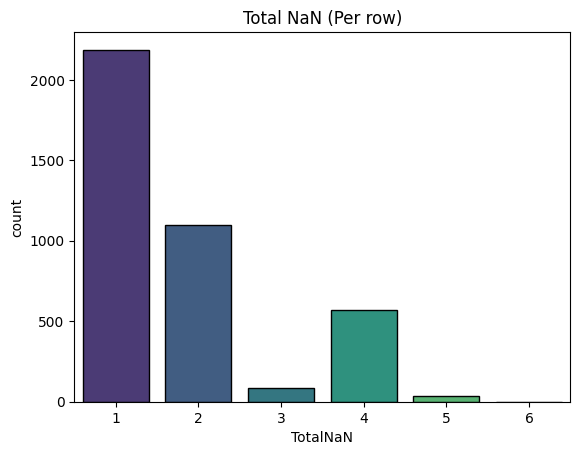

In [29]:
# 1. Count missing values per row
data = df_train.copy()
data['TotalNaN'] = data.isnull().sum(axis=1)

# 2. Plot the count of rows with missing values (excluding rows with 0 NaNs)
sns.countplot(data=data[data.TotalNaN != 0], x='TotalNaN', palette='viridis', edgecolor='k')
plt.title('Total NaN (Per row)')
plt.grid(False)
plt.show()

# 3. Remove rows with more than 5 missing values
#print(f"Initial rows: {data.shape[0]}")
#data = data[data['TotalNaN'] <= 5].copy()
#print(f"Remaining rows after removing rows with >5 NaNs: {data.shape[0]}")

# Drop the helper column
# data.drop(columns=['TotalNaN'], inplace=True)

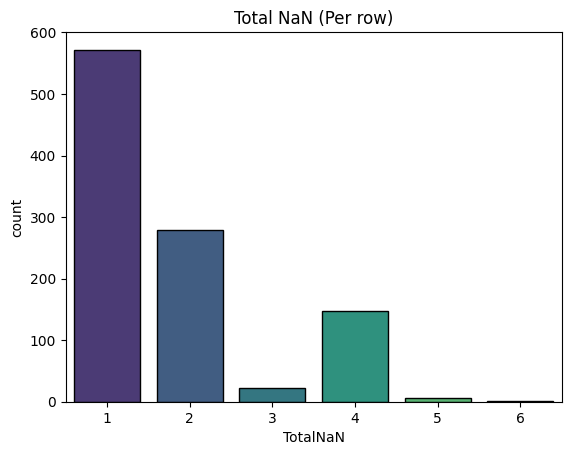

In [30]:
# 1. Count missing values per row
data = df_test.copy()
data['TotalNaN'] = data.isnull().sum(axis=1)

# 2. Plot the count of rows with missing values (excluding rows with 0 NaNs)
sns.countplot(data=data[data.TotalNaN != 0], x='TotalNaN', palette='viridis', edgecolor='k')
plt.title('Total NaN (Per row)')
plt.grid(False)
plt.show()

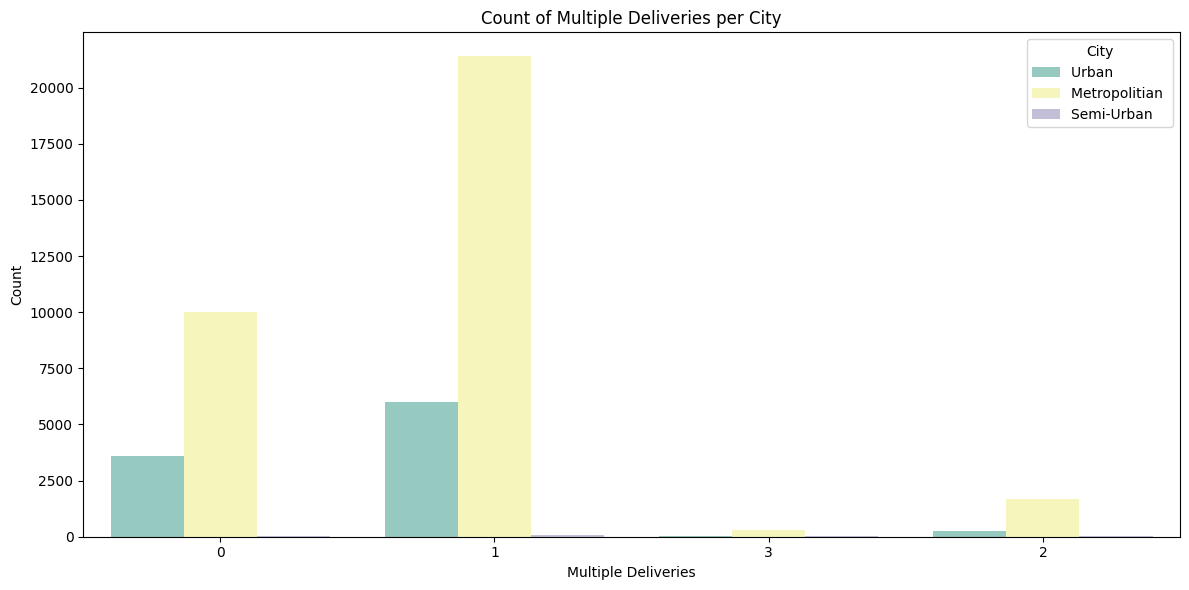

In [31]:
# Plot 2: Count of multiple deliveries by City
plt.figure(figsize=(12, 6))
sns.countplot(data=df_train, x='multiple_deliveries', hue='City', palette='Set3')
plt.title('Count of Multiple Deliveries per City')
plt.xlabel('Multiple Deliveries')
plt.ylabel('Count')
plt.legend(title='City')
plt.grid(False)
plt.tight_layout()
plt.show()

In [32]:
def handle_null_values(df):
    def fill_with_mode(series):
        mode_val = series.mode()
        return series.fillna(mode_val[0] if not mode_val.empty else pd.NA)

    # --- City ---
    df["City"] = df.groupby(["Delivery_location_latitude", "Delivery_location_longitude"])["City"].transform(fill_with_mode)
    df["City"] = df.groupby(["Restaurant_latitude", "Restaurant_longitude"])["City"].transform(fill_with_mode)

    # --- Festival ---
    df["Festival"] = df.groupby(["City_Code", "Order_Date"])["Festival"].transform(fill_with_mode)

    # --- Time_Orderd based on Time_Order_picked ---
    df["Time_Orderd"] = pd.to_datetime(df["Time_Orderd"], format="%H:%M:%S", errors="coerce")
    df["Time_Order_picked"] = pd.to_datetime(df["Time_Order_picked"], format="%H:%M:%S", errors="coerce")

    valid_times = df["Time_Orderd"].notna() & df["Time_Order_picked"].notna()
    df.loc[valid_times & (df["Time_Order_picked"] < df["Time_Orderd"]), "Time_Order_picked"] += pd.Timedelta(days=1)

    df["Time_Difference_min"] = (df["Time_Order_picked"] - df["Time_Orderd"]).dt.total_seconds() / 60
    median_time_diff = df["Time_Difference_min"].median()
    df.loc[df["Time_Orderd"].isna(), "Time_Orderd"] = df["Time_Order_picked"] - pd.to_timedelta(median_time_diff, unit="m")
    df["Time_Difference_min"] = (df["Time_Order_picked"] - df["Time_Orderd"]).dt.total_seconds() / 60
    df['Order_Hour'] = pd.to_datetime(df['Time_Orderd'], errors='coerce').dt.hour


    # --- Weatherconditions ---
    for precision in [4, 3, 2]: ## upto 2 decimal points for a diameter of 15 kms
        df[f"lat_r_{precision}"] = df["Restaurant_latitude"].round(precision)
        df[f"lon_r_{precision}"] = df["Restaurant_longitude"].round(precision)
        df["Weatherconditions"] = df.groupby(
            [f"lat_r_{precision}", f"lon_r_{precision}", "Order_Date", "Order_Picked_Hour"]
        )["Weatherconditions"].transform(fill_with_mode)

    # --- Road_traffic_density ---
    for precision in [4, 3, 2]:
        df[f"lat_r_{precision}"] = df["Restaurant_latitude"].round(precision)
        df[f"lon_r_{precision}"] = df["Restaurant_longitude"].round(precision)
        df["Road_traffic_density"] = df.groupby(
            [f"lat_r_{precision}", f"lon_r_{precision}", "Order_Date", "Order_Picked_Hour"]
        )["Road_traffic_density"].transform(fill_with_mode)

    # --- multiple_deliveries ---
    df["multiple_deliveries"] = df.groupby(
        ["Delivery_person_ID", "Restaurant_latitude_rounded", "Restaurant_longitude_rounded", "Order_Date", "Order_Picked_Hour"]
        )["multiple_deliveries"].transform(fill_with_mode)

    df["multiple_deliveries"].fillna('1', inplace=True)

    df['multiple_deliveries_1'] = df['multiple_deliveries'].apply(lambda x: 'no' if x == 0 else 'yes')

    # --- Final null summary and deletion count ---
    total_rows = len(df)
    rows_with_na = df.isnull().any(axis=1)
    rows_to_drop = rows_with_na.sum()
    percentage_to_drop = (rows_to_drop / total_rows) * 100
    null_summary = df.isnull().sum()

    print(null_summary[null_summary > 0])
    print("Rows to delete:", rows_to_drop)
    print(f"Percentage of total: {percentage_to_drop:.2f}%")

    return

In [33]:
handle_null_values(df_train)

Weatherconditions       375
Road_traffic_density    365
dtype: int64
Rows to delete: 375
Percentage of total: 0.82%


In [34]:
handle_null_values(df_test)

Weatherconditions       133
Road_traffic_density    130
dtype: int64
Rows to delete: 133
Percentage of total: 1.17%


<Axes: title={'center': 'City value counts'}, ylabel='multiple_deliveries'>

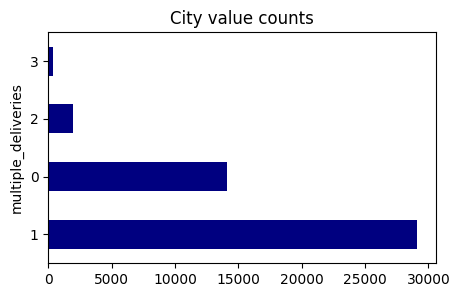

In [ ]:
# Plot 1: Count of multiple deliveries
df_train.multiple_deliveries.value_counts().plot(kind='barh', title='City value counts', color='navy', figsize=(5, 3))

<Axes: title={'center': 'City value counts'}, ylabel='multiple_deliveries'>

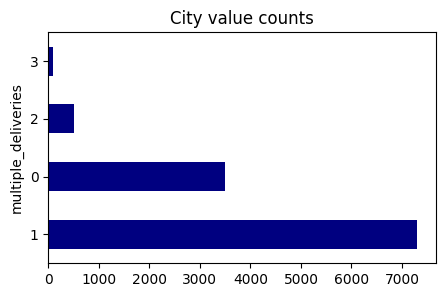

In [ ]:
df_test.multiple_deliveries.value_counts().plot(kind='barh', title='City value counts', color='navy', figsize=(5, 3))

In [ ]:
df_train["multiple_deliveries"].fillna('1', inplace=True)
df_test["multiple_deliveries"].fillna('1', inplace=True)

In [ ]:
# converting 'multiple_deliveries' to categorical: 0 = no, else = yes
df_train['multiple_deliveries_1'] = df_train['multiple_deliveries'].apply(lambda x: 'no' if x == 0 else 'yes')
df_test['multiple_deliveries_1'] = df_test['multiple_deliveries'].apply(lambda x: 'no' if x == 0 else 'yes')

In [ ]:
null_summary = df_train.isnull().sum()
print(null_summary[null_summary > 0])

Weatherconditions       375
Road_traffic_density    365
dtype: int64


In [ ]:
null_summary = df_test.isnull().sum()
print(null_summary[null_summary > 0])

Weatherconditions       133
Road_traffic_density    130
dtype: int64


In [ ]:
# Loop through each column and print the percentage of NaN values
for col in df_train.columns:
    nan_count = df_train[col].isnull().sum()
    nan_percentage = (nan_count / len(df_train)) * 100

    # Only print columns with NaN values
    if nan_count > 0:
        print(f"{col}: {nan_percentage:.2f}% missing values")

Weatherconditions: 0.82% missing values
Road_traffic_density: 0.80% missing values


In [ ]:
# Loop through each column and print the percentage of NaN values
for col in df_test.columns:
    nan_count = df_test[col].isnull().sum()
    nan_percentage = (nan_count / len(df_test)) * 100

    # Only print columns with NaN values
    if nan_count > 0:
        print(f"{col}: {nan_percentage:.2f}% missing values")

Weatherconditions: 1.17% missing values
Road_traffic_density: 1.14% missing values


In [ ]:
# Total number of rows
total_rows = len(df_train)

# Rows with NA in any of the 3 columns
rows_with_na = df_train.isnull().any(axis=1)

# Count of rows to drop
rows_to_drop = rows_with_na.sum()

# Percentage
percentage_to_drop = (rows_to_drop / total_rows) * 100

print(f"Rows to delete: {rows_to_drop}")
print(f"Percentage of total: {percentage_to_drop:.2f}%")

Rows to delete: 375
Percentage of total: 0.82%


In [ ]:
# Total number of rows
total_rows = len(df_test)

# Rows with NA in any of the 3 columns
rows_with_na = df_test.isnull().any(axis=1)

# Count of rows to drop
rows_to_drop = rows_with_na.sum()

# Percentage
percentage_to_drop = (rows_to_drop / total_rows) * 100

print(f"Rows to delete: {rows_to_drop}")
print(f"Percentage of total: {percentage_to_drop:.2f}%")

Rows to delete: 133
Percentage of total: 1.17%


In [ ]:
# Drop rows with Null Values
cols_with_na = df_train.columns[df_train.isnull().sum() > 0]
df_train.dropna(subset=cols_with_na, inplace=True)
print(f"Remaining rows: {len(df_train)}")
print("Any missing values left?", df_train.isnull().any(axis=1).sum())

Remaining rows: 45218
Any missing values left? 0


In [ ]:
# Drop rows with Null Values
cols_with_na = df_test.columns[df_test.isnull().sum() > 0]
df_test.dropna(subset=cols_with_na, inplace=True)
print(f"Remaining rows: {len(df_test)}")
print("Any missing values left?", df_test.isnull().any(axis=1).sum())

Remaining rows: 11266
Any missing values left? 0


In [ ]:
median_delivery_by_weather = df_train.pivot_table(
    index="City_Code",
    columns="Weatherconditions",
    values="Time_taken(min)",
    aggfunc="median"
    )
median_delivery_by_weather["Worst_Weather"] = median_delivery_by_weather.idxmax(axis=1)

print("Median delivery time by weather condition:")
median_delivery_by_weather

Median delivery time by weather condition:


Weatherconditions  Cloudy   Fog  Sandstorms  Stormy  Sunny  Windy  \
City_Code                                                           
AGR                  25.0  30.0        26.0    26.0   21.0   27.0   
ALH                  32.5  29.0        26.0    27.0   22.0   26.0   
AURG                 30.0  28.0        26.0    26.0   20.0   27.0   
BANG                 28.0  27.0        25.0    26.0   21.0   26.0   
BHP                  30.0  30.0        26.0    25.0   19.5   26.0   
CHEN                 28.0  29.0        26.0    25.0   20.0   26.0   
COIMB                29.0  28.0        26.0    25.0   20.0   26.0   
DEH                  28.0  31.5        26.0    27.0   19.0   26.0   
GOA                  27.0  28.0        26.0    26.0   21.0   25.0   
HYD                  28.0  30.0        25.0    26.0   20.0   25.5   
INDO                 28.0  28.0        25.0    26.0   20.0   26.0   
JAP                  30.0  30.0        26.0    25.0   20.0   26.0   
KNP                  29.5  27.0        25.0    26.0   20.0   26.0   
KOC                  29.0  28.0        26.0    24.0   20.5   26.0   
KOL                  30.5  28.0        26.0    25.0   20.0   26.0   
LUDH                 30.0  28.0        26.0    25.0   21.0   25.0   
MUM                  28.0  28.0        25.0    25.0   20.0   25.0   
MYS                  28.0  27.0        26.0    26.0   20.0   26.0   
PUNE                 28.0  29.0        25.0    26.0   21.0   26.0   
RANCHI               28.0  29.0        26.0    26.0   21.0   26.0   
SUR                  28.0  28.0        25.0    25.0   20.0   26.0   
VAD                  29.0  28.0        26.0    26.0   20.0   26.0   

Weatherconditions Worst_Weather  
City_Code                        
AGR                         Fog  
ALH                      Cloudy  
AURG                     Cloudy  
BANG                     Cloudy  
BHP                      Cloudy  
CHEN                        Fog  
COIMB                    Cloudy  
DEH                         Fog  
GOA                         Fog  
HYD                         Fog  
INDO                     Cloudy  
JAP                      Cloudy  
KNP                      Cloudy  
KOC                      Cloudy  
KOL                      Cloudy  
LUDH                     Cloudy  
MUM                      Cloudy  
MYS                      Cloudy  
PUNE                        Fog  
RANCHI                      Fog  
SUR                      Cloudy  
VAD                      Cloudy

In [ ]:
median_delivery_by_traffic = df_train.pivot_table(
    index="City_Code",
    columns="Road_traffic_density",
    values="Time_taken(min)",
    aggfunc="median"
    )

median_delivery_by_traffic["Worst_Traffic"] = median_delivery_by_traffic.idxmax(axis=1)

print("Median delivery time by traffic condition:")
median_delivery_by_traffic

Median delivery time by traffic condition:


Road_traffic_density  High   Jam   Low   Medium  Worst_Traffic
City_Code                                                     
AGR                    28.0  31.0  20.0     26.0          Jam 
ALH                    28.0  31.0  21.0     28.0          Jam 
AURG                   26.0  31.0  20.0     29.0          Jam 
BANG                   28.0  30.0  21.0     26.0          Jam 
BHP                    26.0  33.0  21.0     27.0          Jam 
CHEN                   27.0  31.0  20.0     27.0          Jam 
COIMB                  27.0  31.0  20.0     27.0          Jam 
DEH                    27.0  32.0  21.0     27.0          Jam 
GOA                    25.0  31.0  20.0     28.0          Jam 
HYD                    28.0  31.0  21.0     27.0          Jam 
INDO                   27.0  30.0  20.0     26.0          Jam 
JAP                    27.0  31.0  21.0     27.0          Jam 
KNP                    27.5  30.0  21.0     27.0          Jam 
KOC                    27.0  30.0  21.0     26.0          Jam 
KOL                    27.5  30.0  21.0     26.5          Jam 
LUDH                   26.0  31.0  21.0     26.0          Jam 
MUM                    27.0  30.0  20.0     26.0          Jam 
MYS                    27.0  31.0  20.0     26.0          Jam 
PUNE                   27.0  31.0  21.0     27.0          Jam 
RANCHI                 27.0  31.0  20.0     27.0          Jam 
SUR                    26.0  30.0  20.0     27.0          Jam 
VAD                    28.0  31.0  21.0     26.0          Jam

In [ ]:
#df_train['Festival_Binary'] = df_train['Festival'].apply(lambda x: '1' if x == 'Yes' else 0)
#df_test['Festival_Binary'] = df_test['Festival'].apply(lambda x: '1' if x == 'Yes' else 0)

In [ ]:
#df_train['Shift_Label'] = df_train['Order_Hour'].apply(lambda x: '0' if 8 <= x <= 16 else '1')
#df_train['Shift_Label'] = df_train['Shift_Label'].astype(int)

Text(0.5, 1.0, 'Hourly Order Distribution')

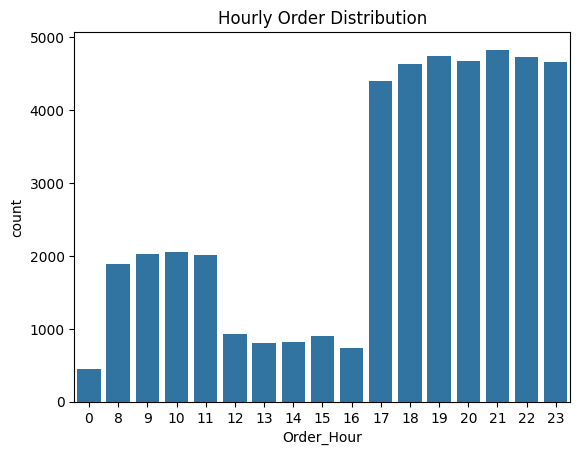

In [ ]:
sns.countplot(data=df_train, x='Order_Hour')
plt.title("Hourly Order Distribution")

<Axes: xlabel='day_name', ylabel='count'>

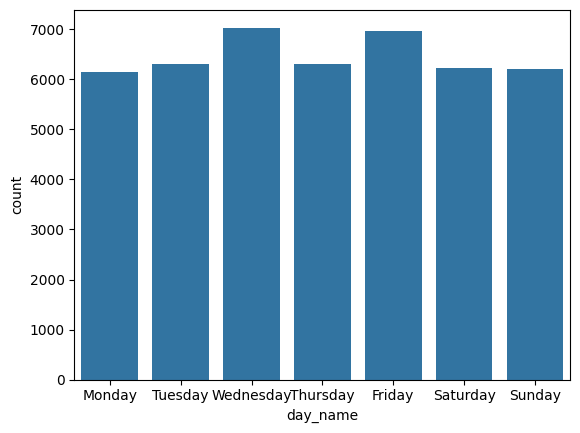

In [ ]:
# Define the correct order for days
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

sns.countplot(data=df_train, x='day_name', order=day_order)

In [ ]:
def assign_shift(hour):
    if 8 <= hour <= 11:
        return 'Morning'
    elif 12 <= hour <= 16:
        return 'Afternoon'
    elif 17 <= hour <= 23:
        return 'Night'
    else:
        return 'Low Demand'

df_train['Shift_4'] = df_train['Order_Hour'].apply(assign_shift)
df_test['Shift_4'] = df_test['Order_Hour'].apply(assign_shift)

In [ ]:
df_train['Distance_km'].describe()

count    45218.000000
mean         9.720827
std          5.599991
min          1.463837
25%          4.654105
50%          9.203901
75%         13.660197
max         20.942906
Name: Distance_km, dtype: float64

In [ ]:
## Dealing with Distance_km buckets

# 1. Calculate Q1, Q3, and IQR
Q1 = df_train['Distance_km'].quantile(0.25)
Q3 = df_train['Distance_km'].quantile(0.75)
IQR = Q3 - Q1

# 2. Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

Q1: 4.6541050410547395, Q3: 13.660196747006776, IQR: 9.006091705952036
Lower Bound: -8.855032517873314, Upper Bound: 27.16933430593483


In [ ]:
# 3. Create buckets
def distance_bucket(row):
    val = row['Distance_km']
    if val < lower_bound:
        return 'Outlier_Low'
    elif 0 <= val <= 5:
        return '0-5 km'
    elif 5 < val <= 10:
        return '5-10 km'
    elif 10 < val <= 15:
        return '10-15 km'
    elif 15 < val <= upper_bound:
        return '15-Upper_IQR km'
    else:
        return 'Outlier_High'

df_train['Distance_Bucket'] = df_train.apply(distance_bucket, axis=1)

# 4. Check the bucket distribution
print(df_train['Distance_Bucket'].value_counts())

Distance_Bucket
10-15 km           12195
5-10 km            12190
0-5 km             12181
15-Upper_IQR km     8652
Name: count, dtype: int64


In [ ]:
df_train[df_train['Distance_Bucket'] == 'Outlier_High']

Empty DataFrame
Columns: [Delivery_person_ID, Restaurant_latitude, Restaurant_longitude, Delivery_location_latitude, Delivery_location_longitude, Order_Date, Time_Orderd, Time_Order_picked, Weatherconditions, Road_traffic_density, Vehicle_condition, Type_of_order, Type_of_vehicle, multiple_deliveries, Festival, City, Time_taken(min), Festival_Binary, City_Code, Restaurant_latitude_rounded, Restaurant_longitude_rounded, Delivery_location_latitude_rounded, Delivery_location_longitude_rounded, Restaurant_latitude_1, Restaurant_longitude_1, Delivery_location_latitude_1, Delivery_location_longitude_1, day, day_of_week, day_name, is_weekend, Order_Picked_Hour, Order_Hour, Distance_km, Time_Difference_min, lat_r_4, lon_r_4, lat_r_3, lon_r_3, lat_r_2, lon_r_2, multiple_deliveries_1, Shift_4, Distance_Bucket]
Index: []

[0 rows x 44 columns]

In [ ]:
df_test['Distance_Bucket'] = df_test.apply(distance_bucket, axis=1)
print(df_test['Distance_Bucket'].value_counts())

Distance_Bucket
0-5 km             3044
10-15 km           3040
5-10 km            3015
15-Upper_IQR km    2167
Name: count, dtype: int64


# Visualizations - EDA

<Axes: title={'center': 'Orders per City'}, ylabel='City'>

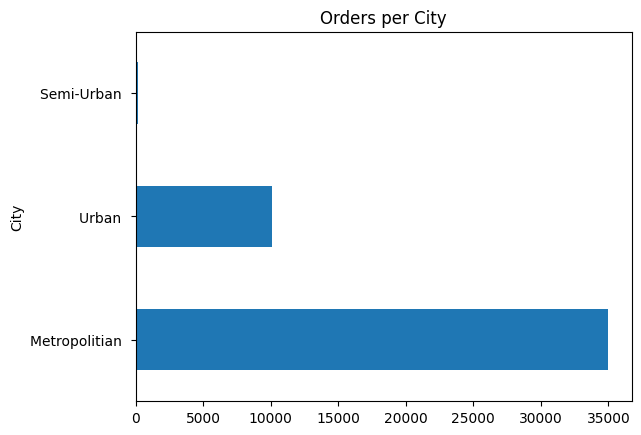

In [ ]:
df_train['City'].value_counts().plot(kind='barh', title='Orders per City')

<Axes: title={'center': 'Orders per City'}, ylabel='City_Code'>

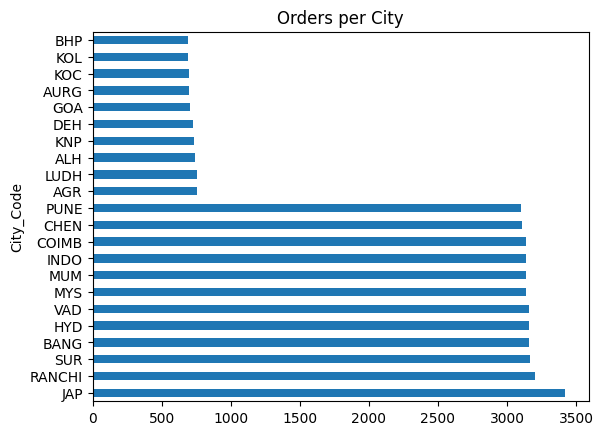

In [ ]:
df_train['City_Code'].value_counts().plot(kind='barh', title='Orders per City')

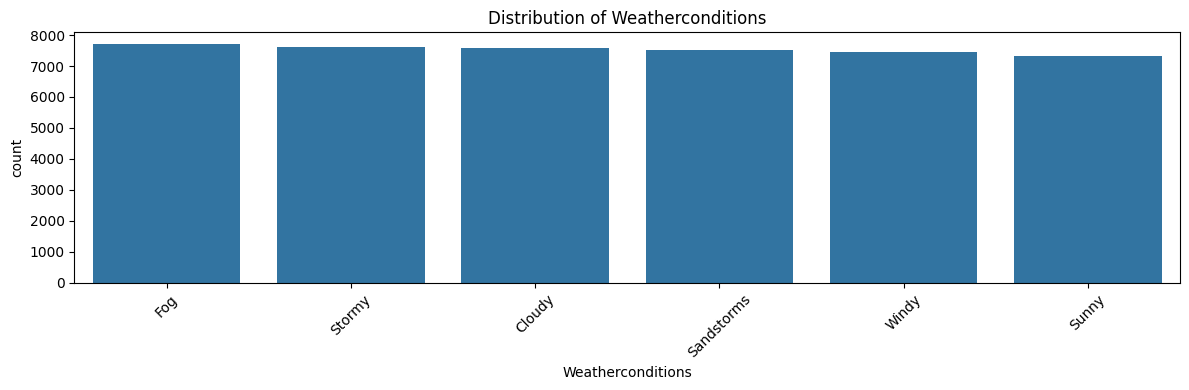

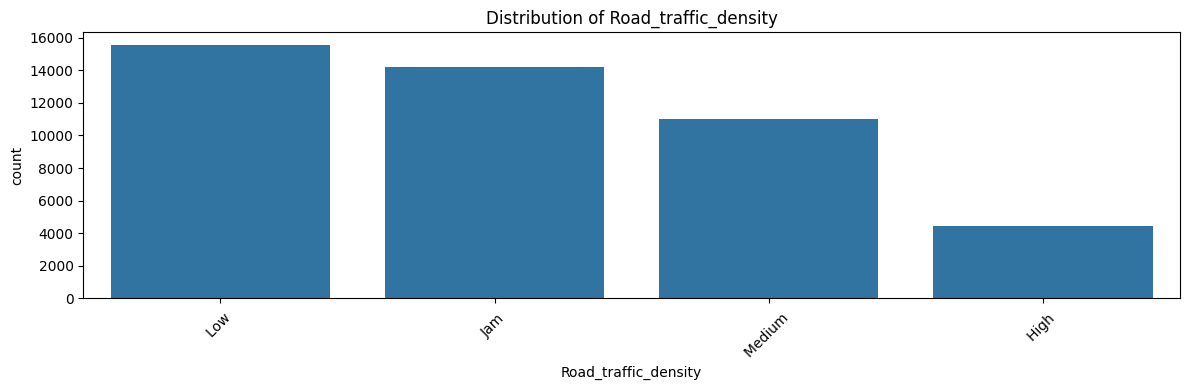

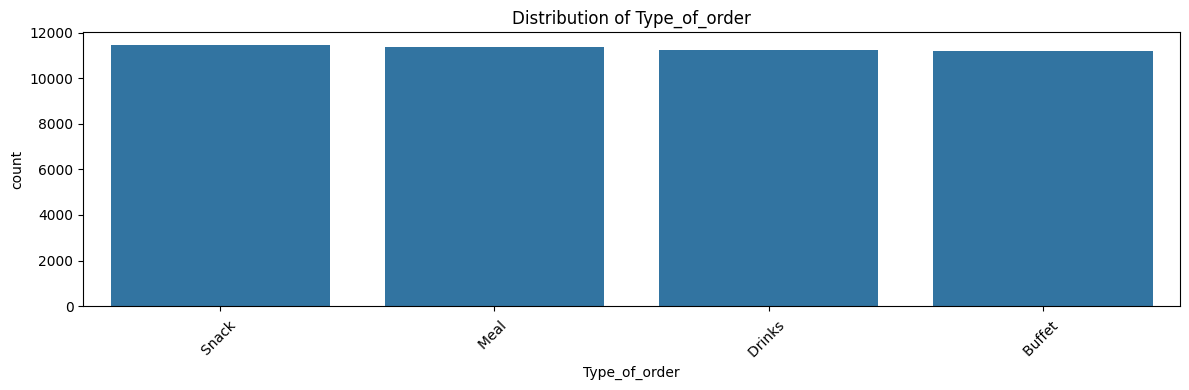

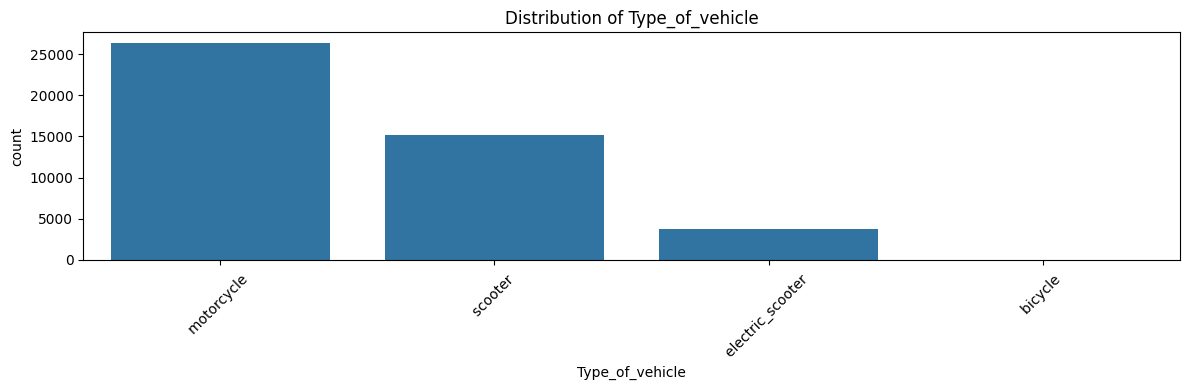

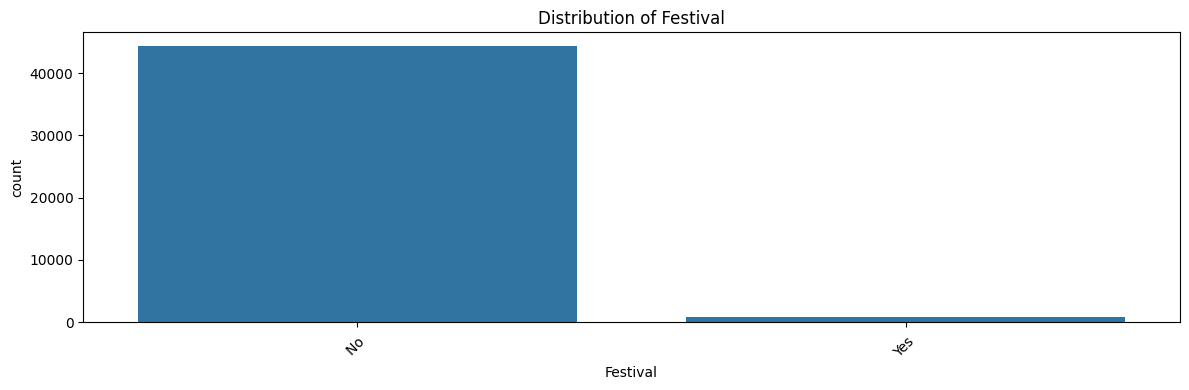

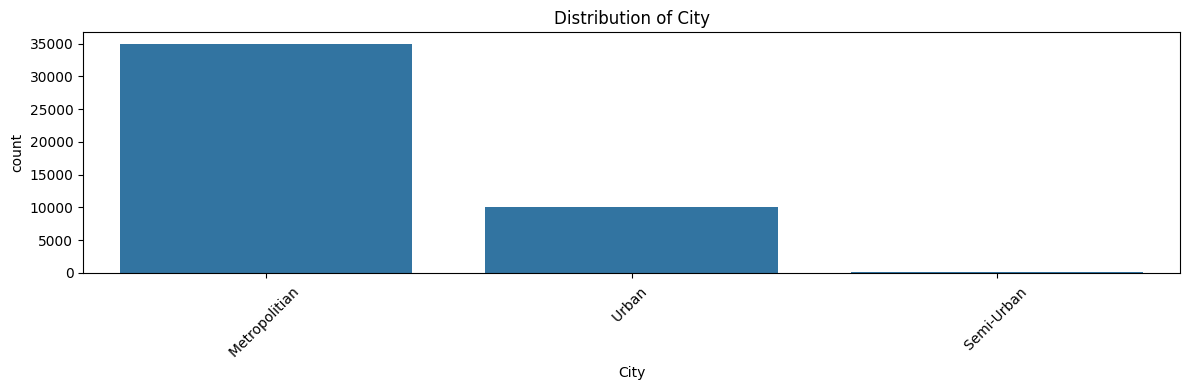

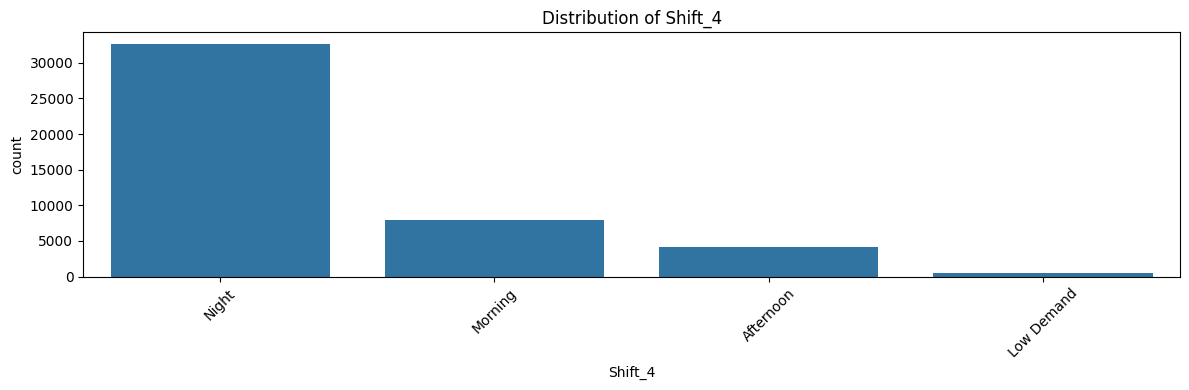

In [ ]:
categorical = ['Weatherconditions', 'Road_traffic_density', 'Type_of_order', 'Type_of_vehicle', 'Festival', 'City', 'Shift_4']
for col in categorical:
    plt.figure(figsize=(12,4))
    sns.countplot(data=df_train, x=col, order=df_train[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()

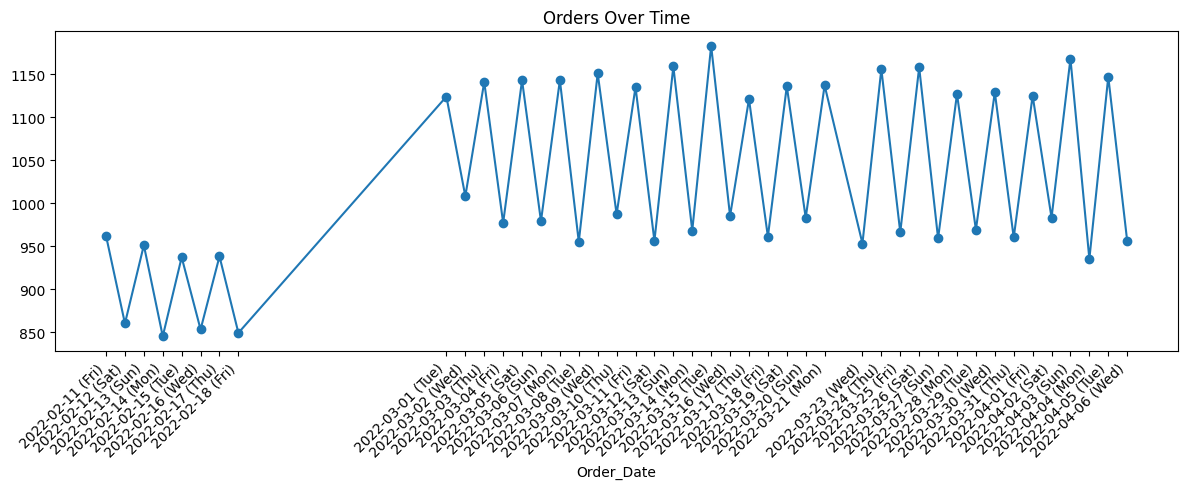

In [ ]:
# Group and plot
orders_by_date = df_train.groupby('Order_Date').size()

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 5))

# Plot using pandas so it handles the index properly
orders_by_date.plot(ax=ax, marker='o', title='Orders Over Time')

# Combine date and day name
xticks_labels = orders_by_date.index.strftime('%Y-%m-%d (%a)')  # (%a) for short day name

# Set all dates as x-ticks
ax.set_xticks(orders_by_date.index)
ax.set_xticklabels(xticks_labels, rotation=45)

plt.tight_layout()
plt.show()

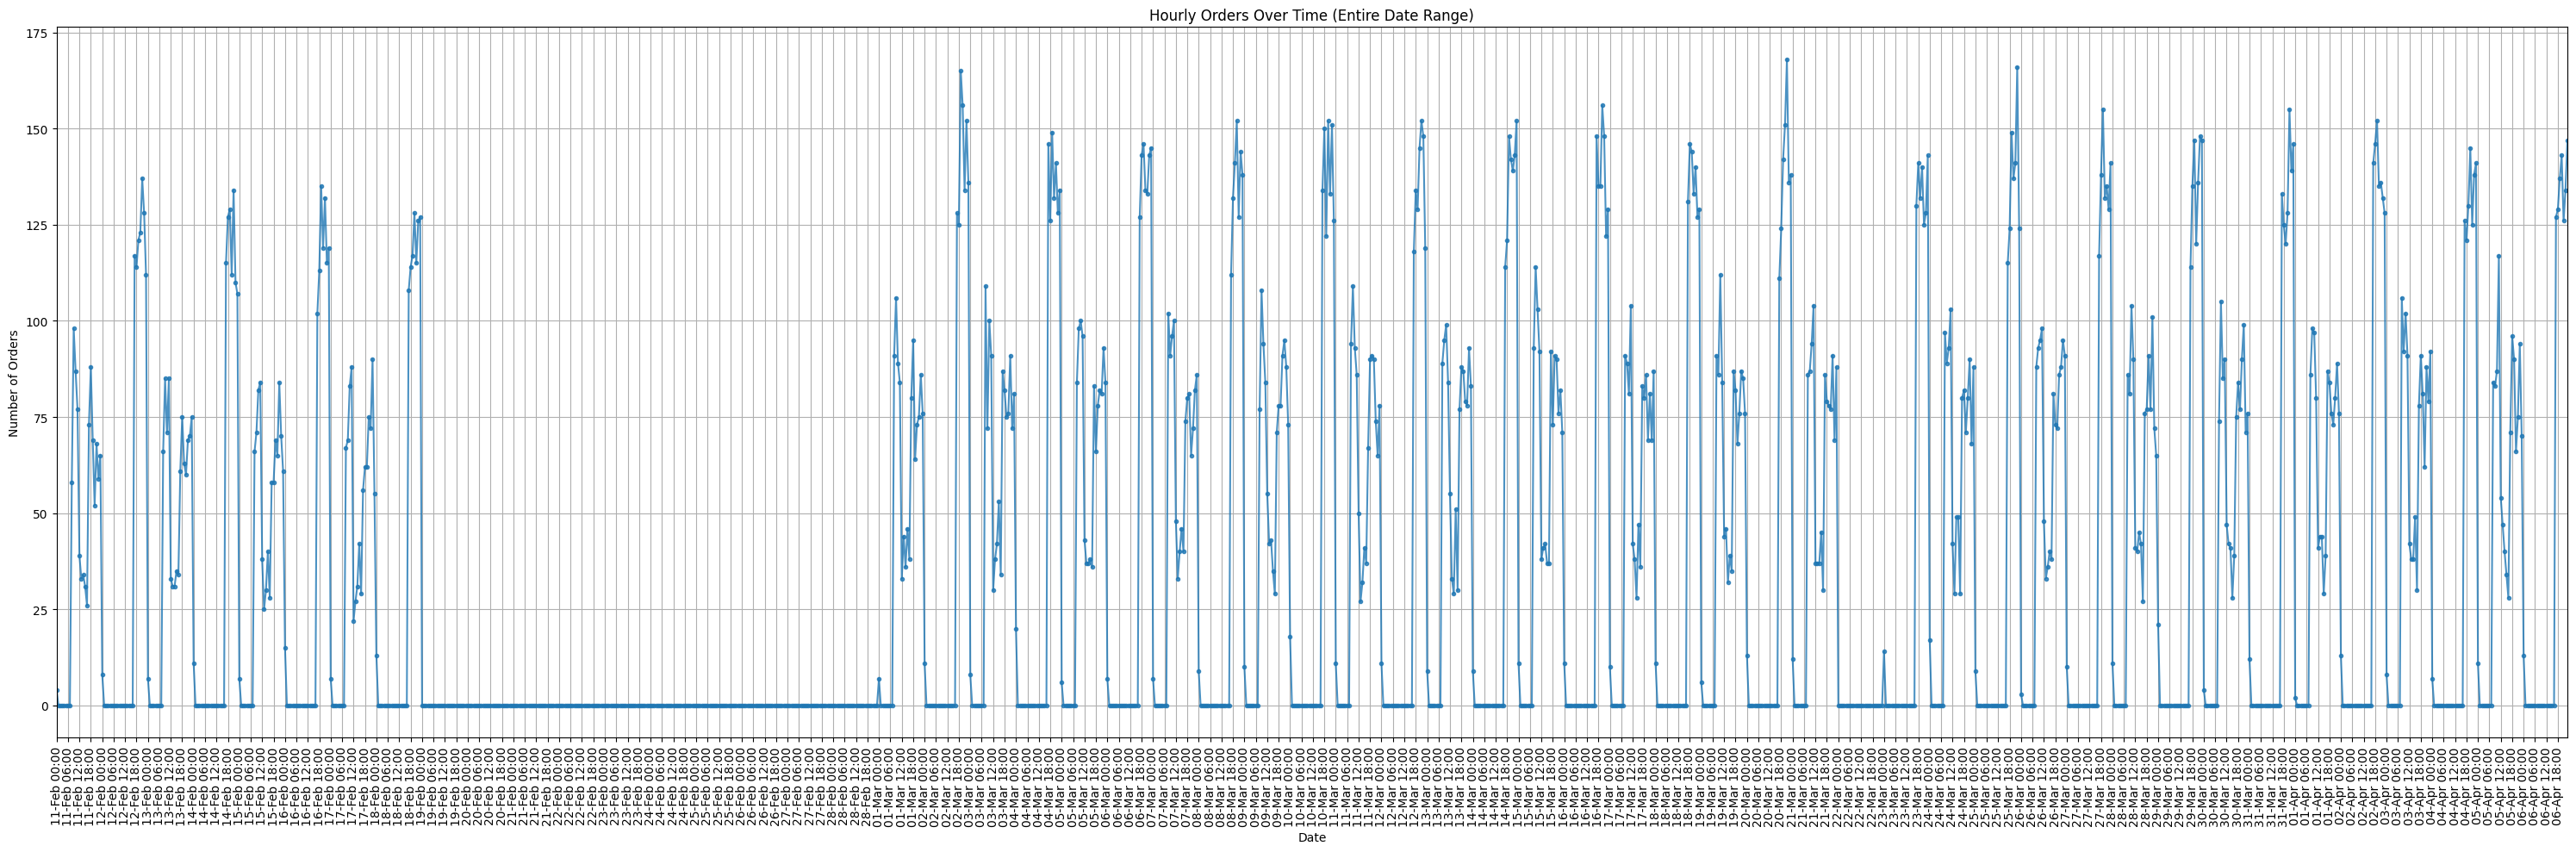

In [ ]:
#import matplotlib.dates as mdates

# Combine date and time into a datetime column
df_train['Order_Timestamp'] = pd.to_datetime(df_train['Order_Date'].astype(str) + ' ' + df_train['Time_Orderd'].astype(str), errors='coerce')

# Drop missing timestamps if needed
df_hourly = df_train.dropna(subset=['Order_Timestamp'])

# Set datetime as index
df_hourly.set_index('Order_Timestamp', inplace=True)

# Hourly order count
orders_hourly = df_train.set_index('Order_Timestamp').resample('H').size()

# Plot
fig, ax = plt.subplots(figsize=(30, 10))
orders_hourly.plot(ax=ax, marker='.', linestyle='-', alpha=0.8)

# Clean title and labels
ax.set_title("Hourly Orders Over Time (Entire Date Range)")
ax.set_xlabel("Date")
ax.set_ylabel("Number of Orders")

# Smarter ticks
ax.set_xticks(orders_hourly.index[::6])  # Show every 6th hour
ax.set_xticklabels(orders_hourly.index[::6].strftime('%d-%b %H:%M'), rotation=90)

plt.grid(True)
plt.tight_layout()
plt.show()

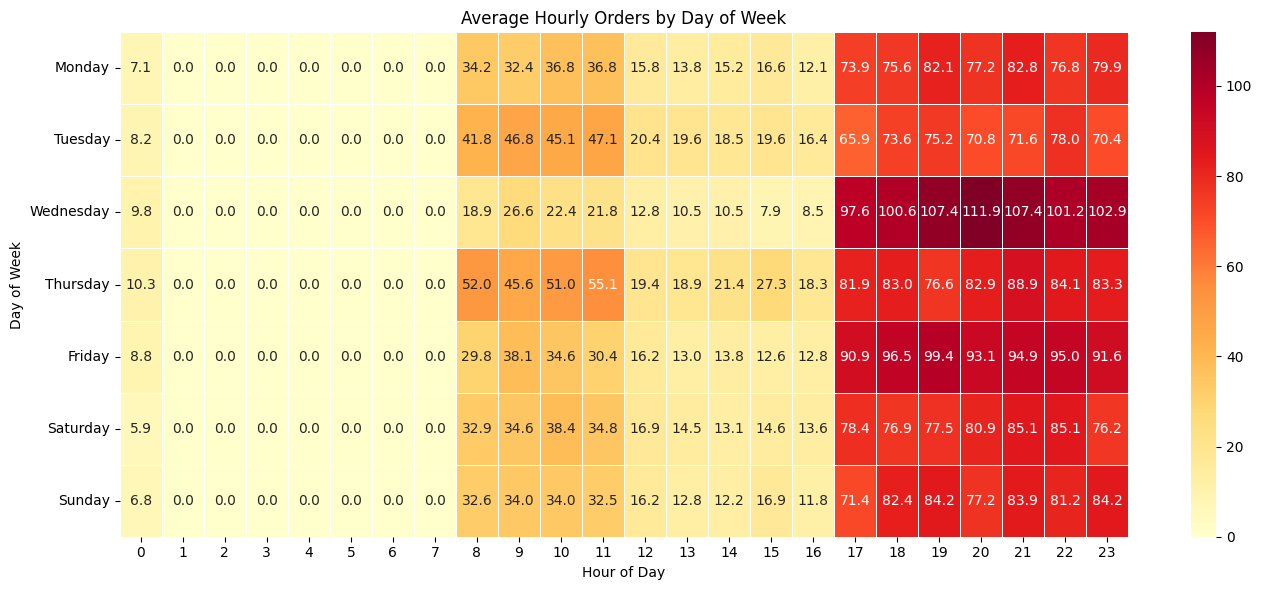

In [ ]:
# Create a temp DataFrame with hourly counts
orders_hourly_df = orders_hourly.reset_index()
orders_hourly_df.columns = ['Order_Timestamp', 'Num_Orders']
orders_hourly_df['weekday'] = orders_hourly_df['Order_Timestamp'].dt.day_name()
orders_hourly_df['hour'] = orders_hourly_df['Order_Timestamp'].dt.hour

# Pivot for heatmap (weekday as rows, hour as columns)
heatmap_data = orders_hourly_df.groupby(['weekday', 'hour'])['Num_Orders'].mean().unstack()

# Reorder weekdays
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(weekday_order)

# Plot
plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data, cmap='YlOrRd', linewidths=0.5, annot=True, fmt=".1f")
plt.title("Average Hourly Orders by Day of Week")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.tight_layout()
plt.show()

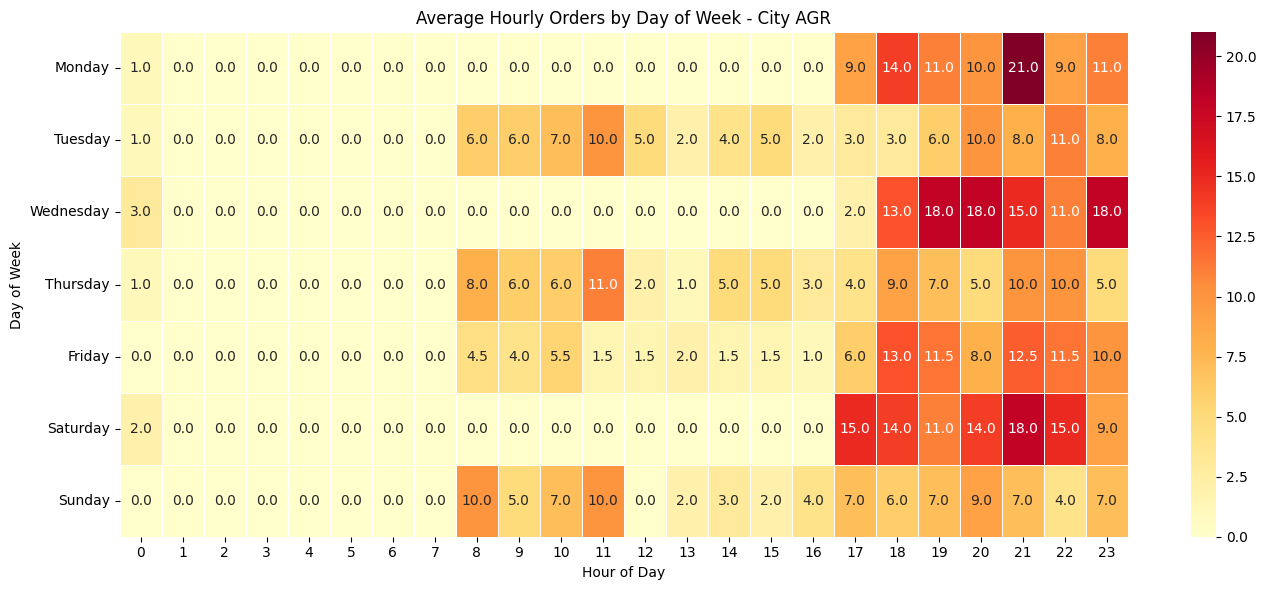

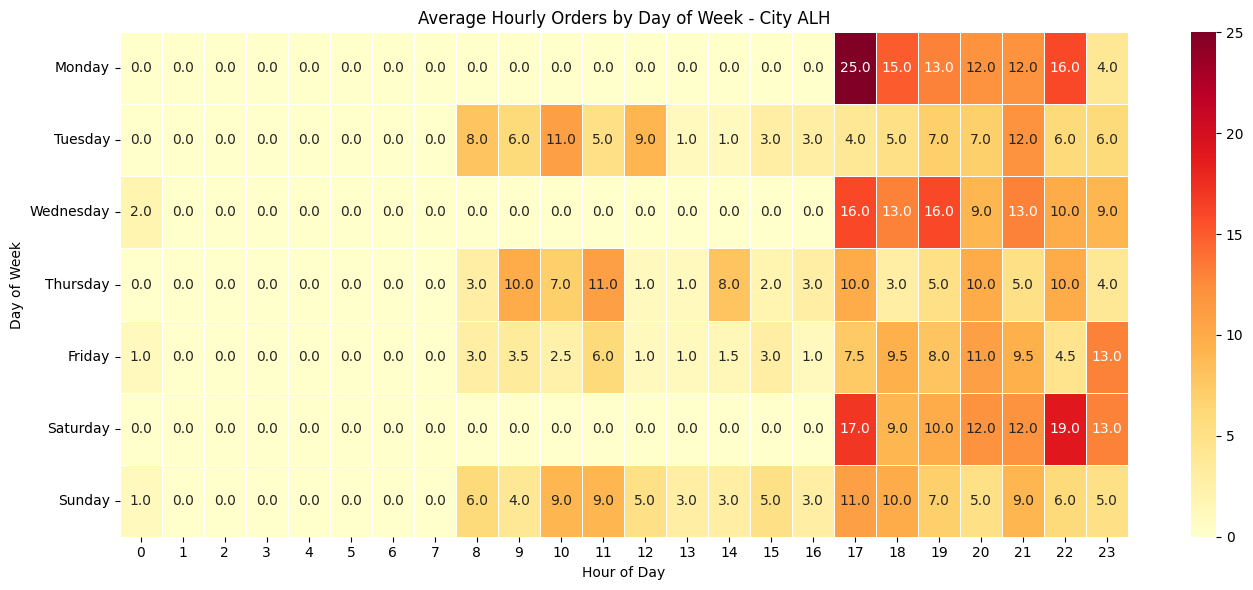

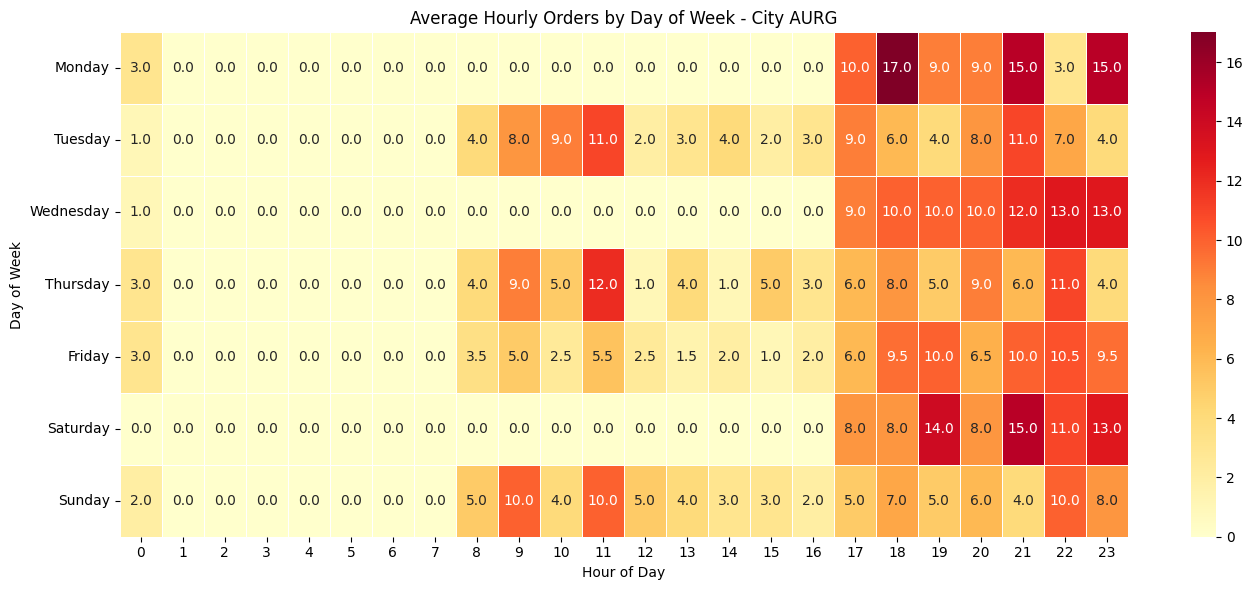

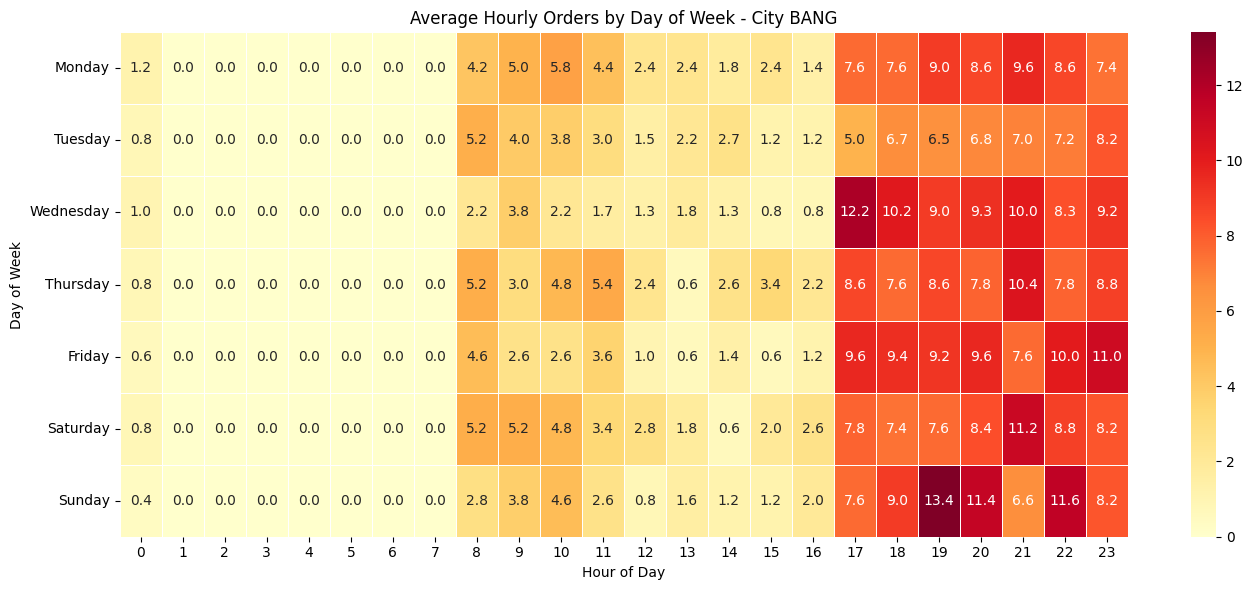

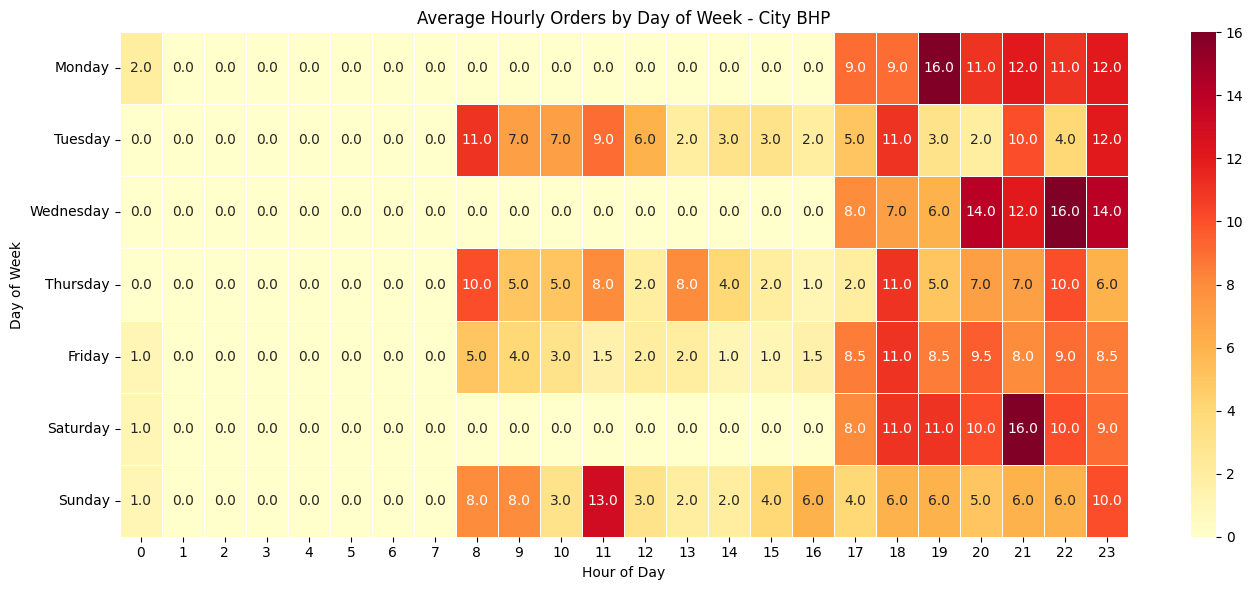

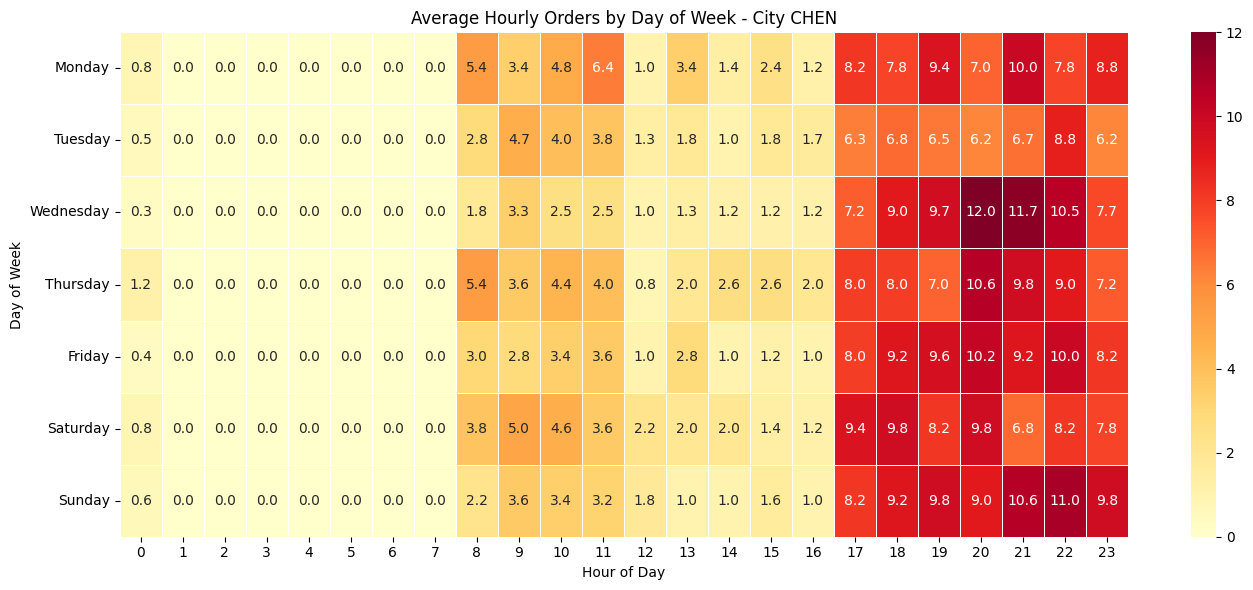

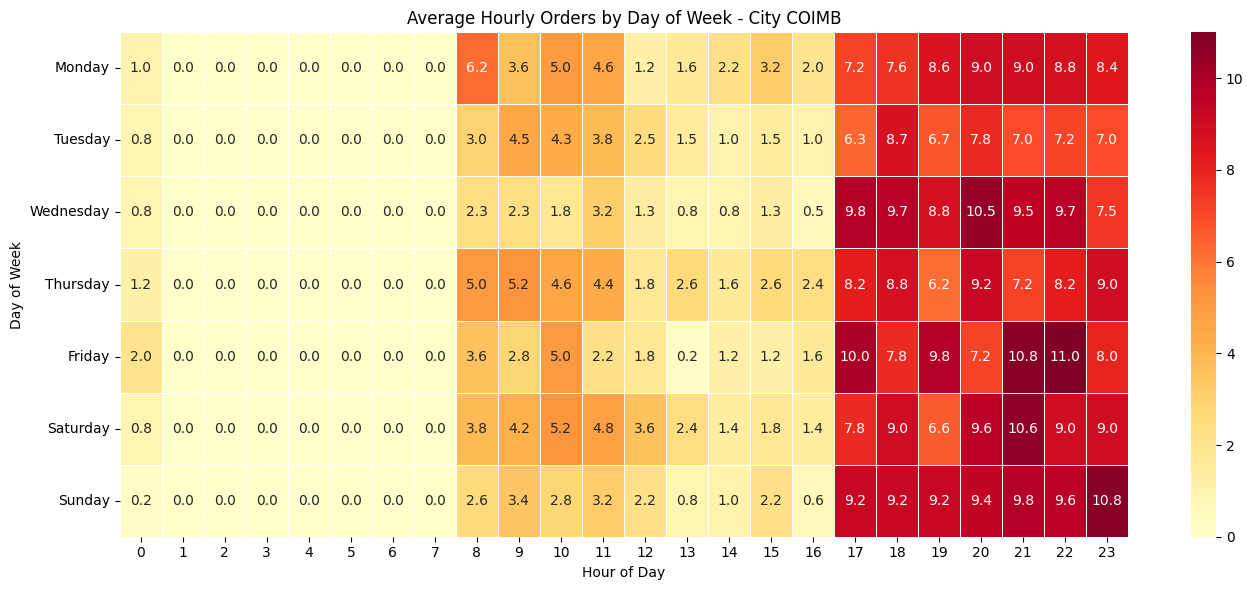

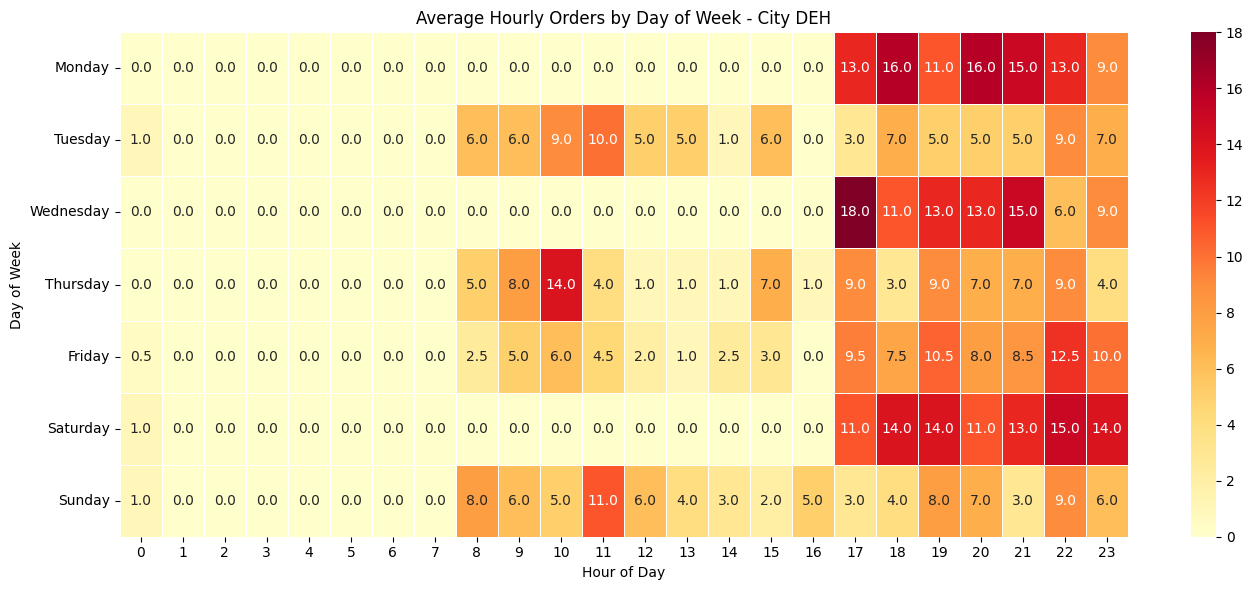

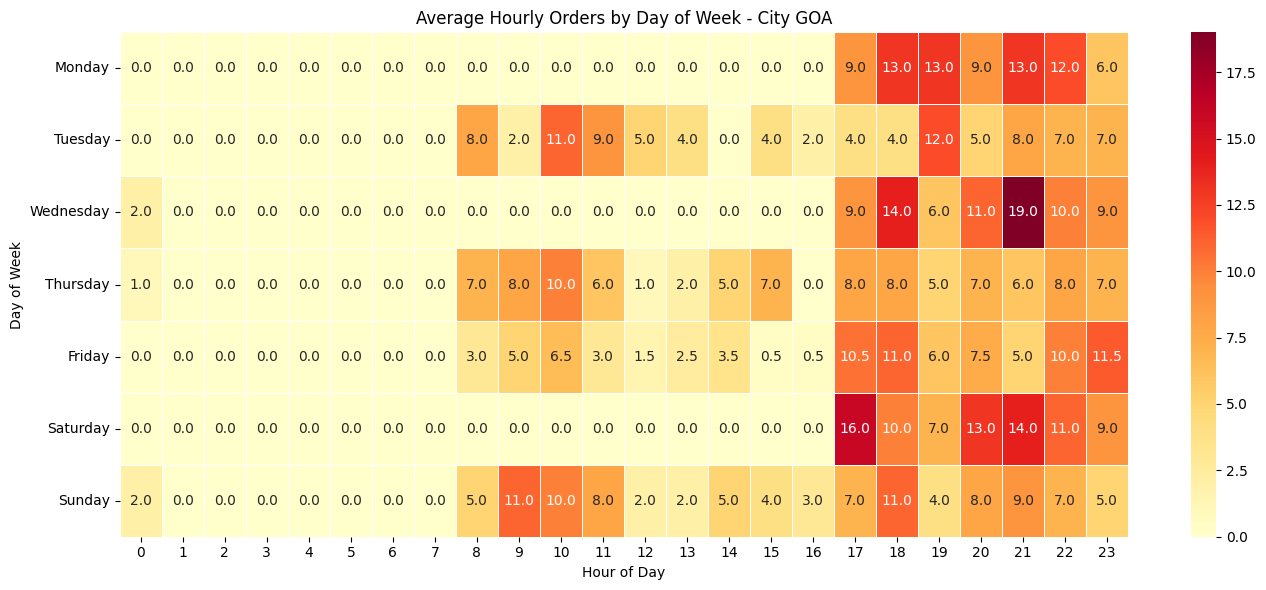

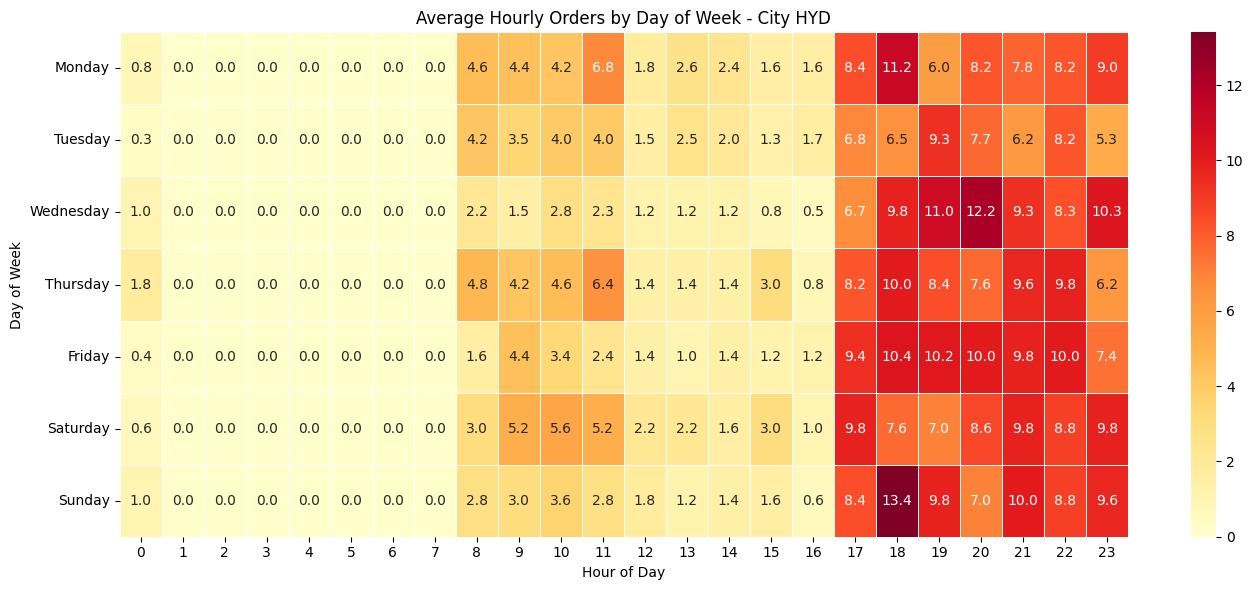

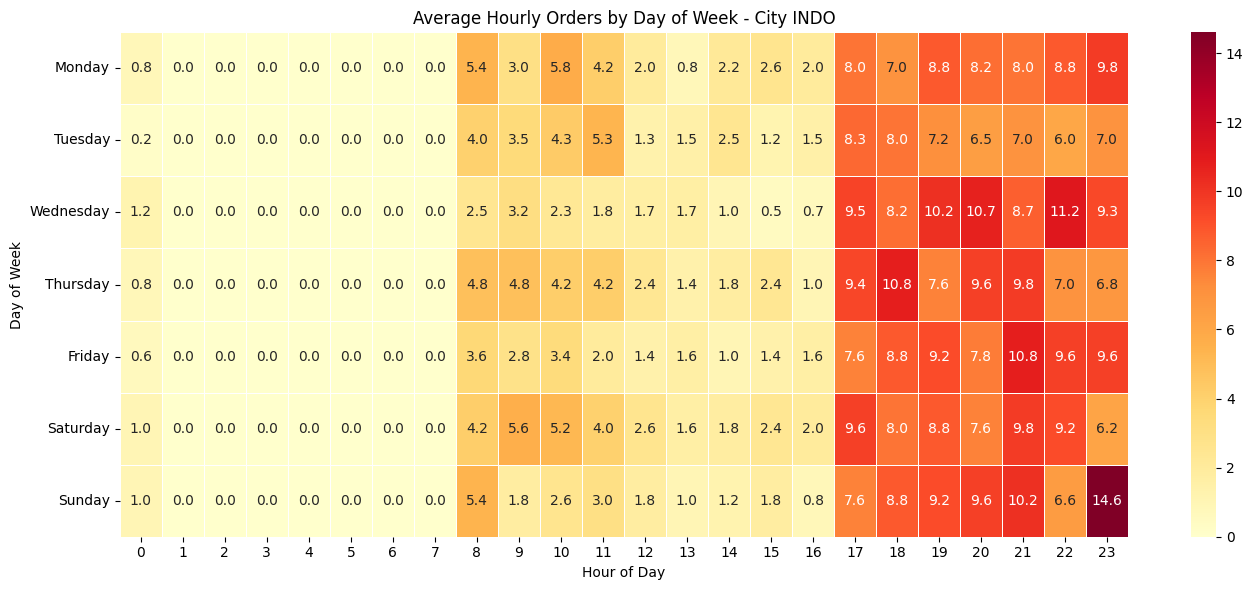

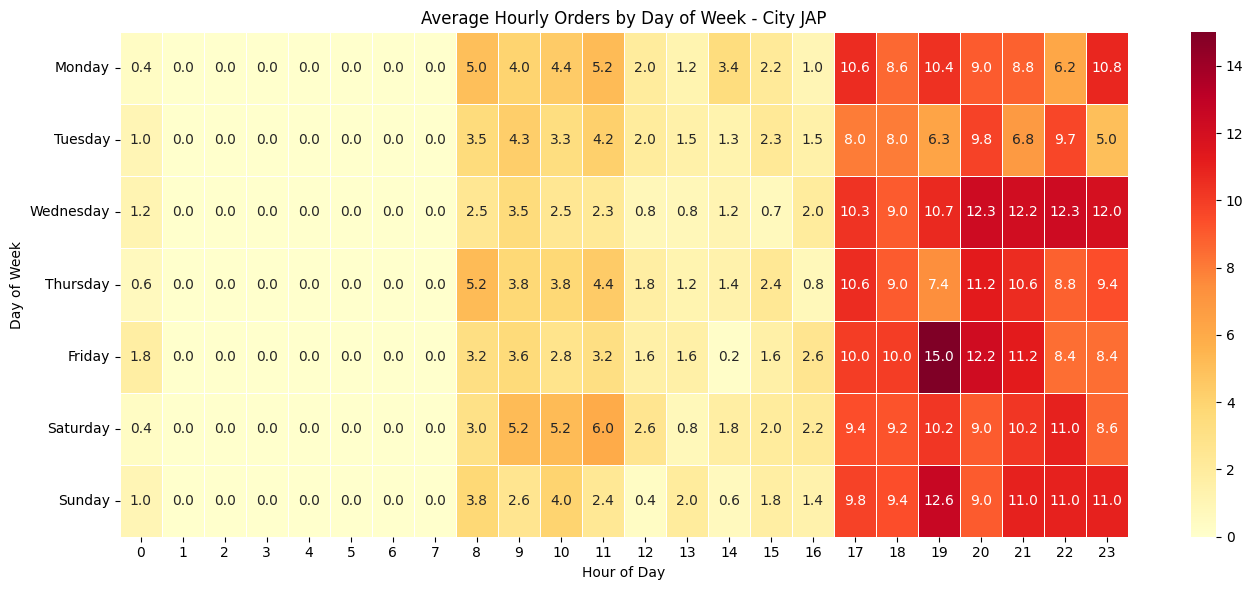

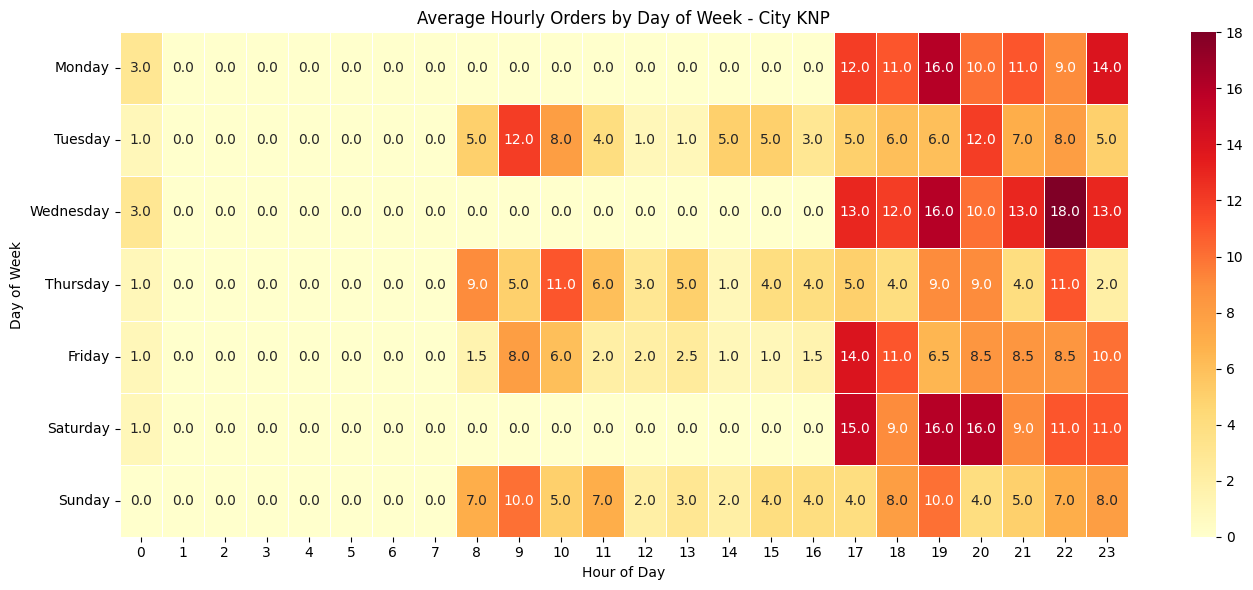

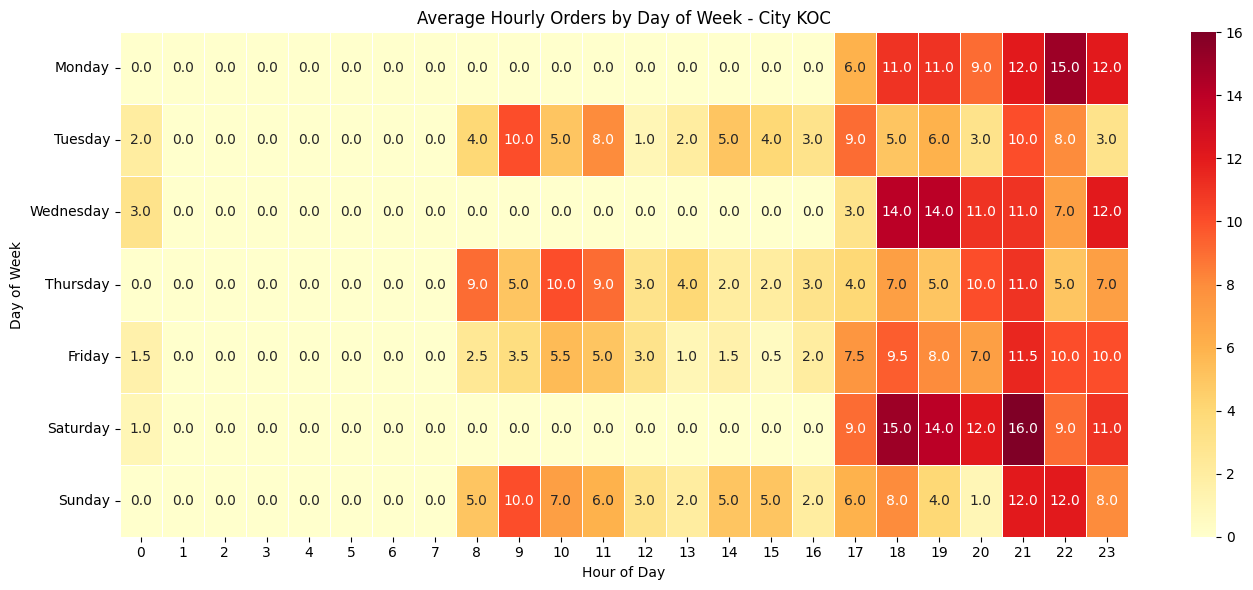

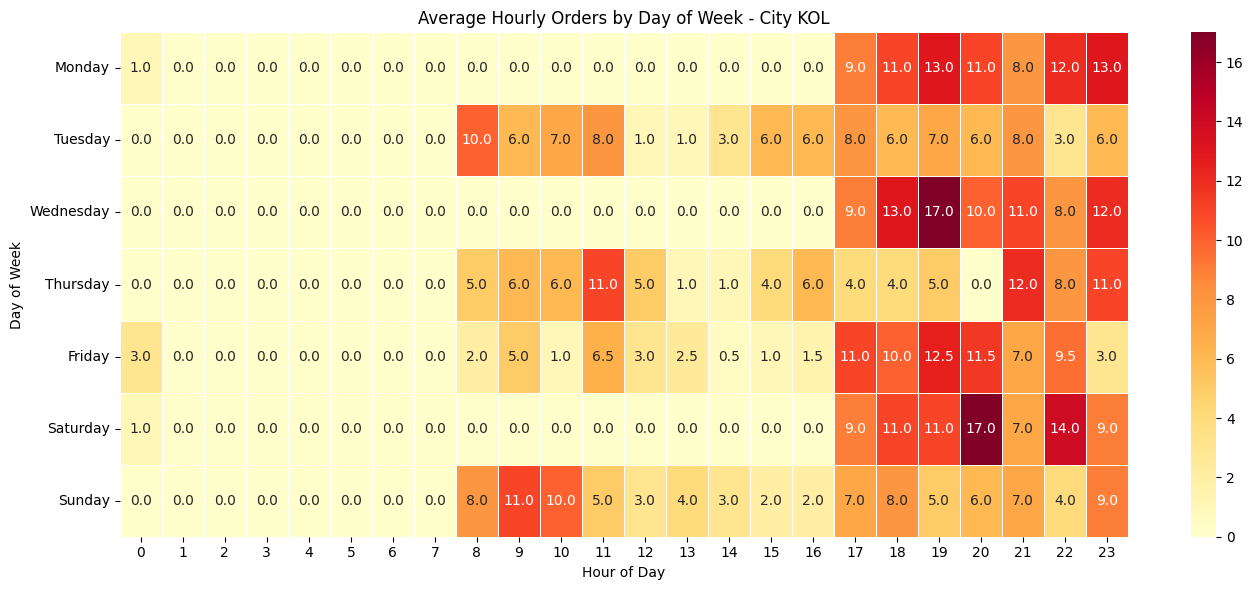

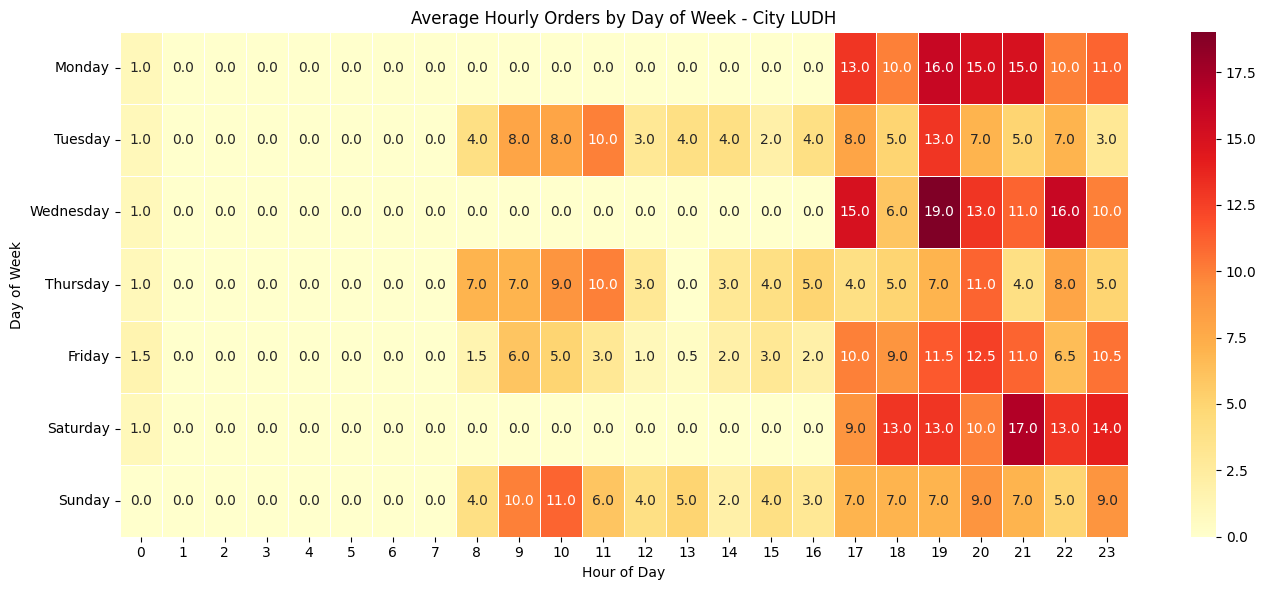

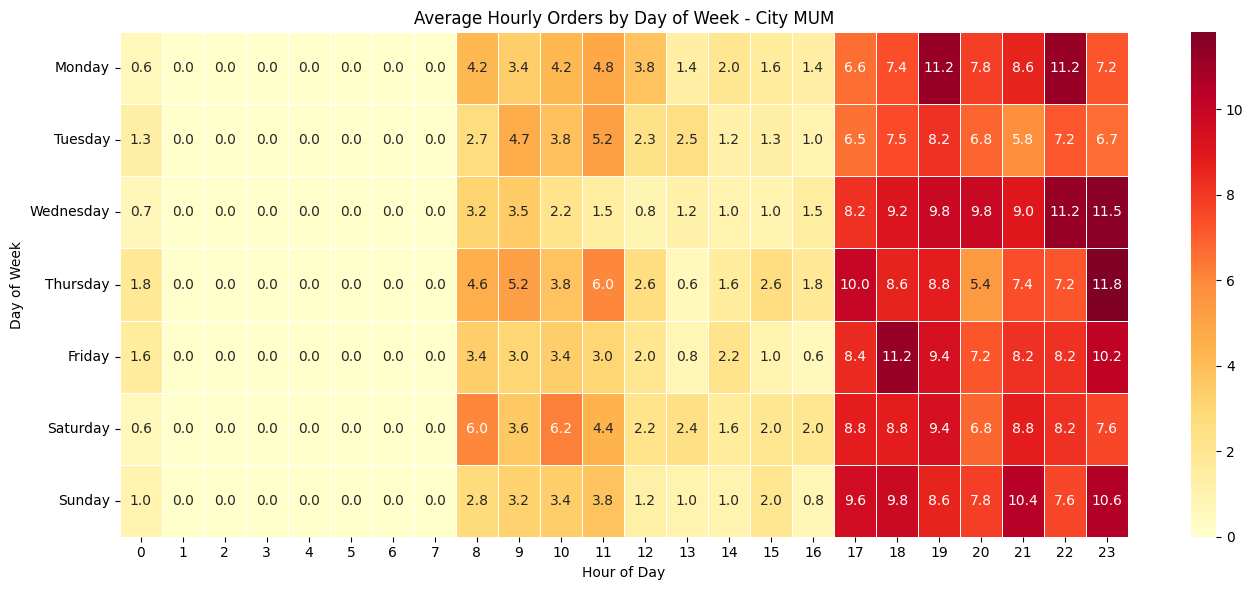

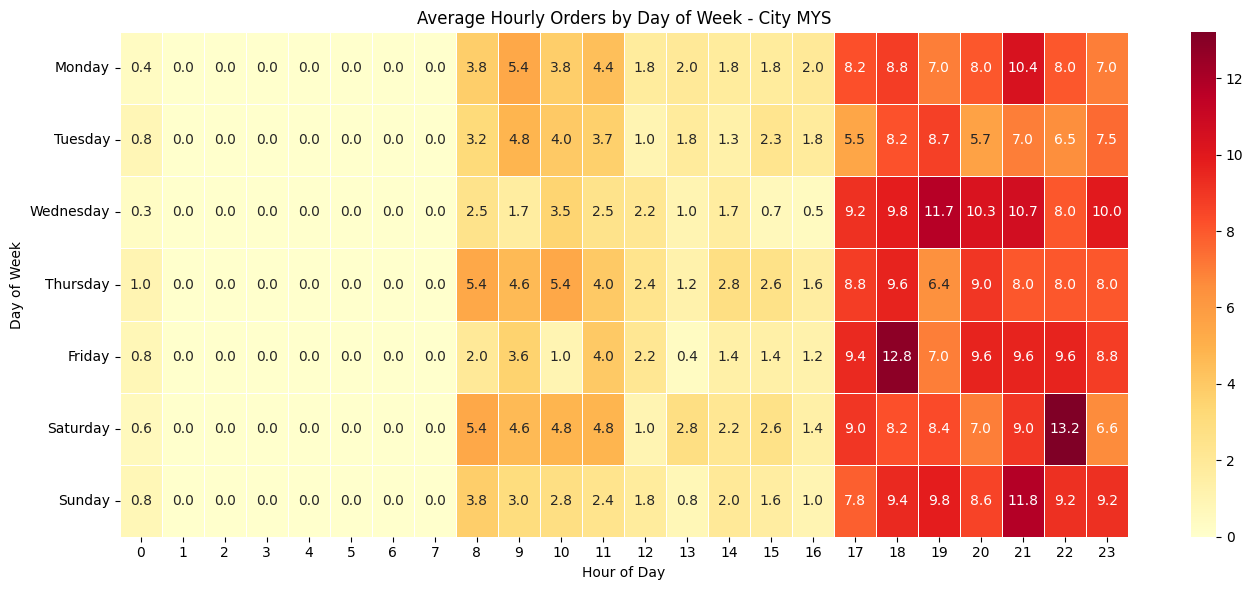

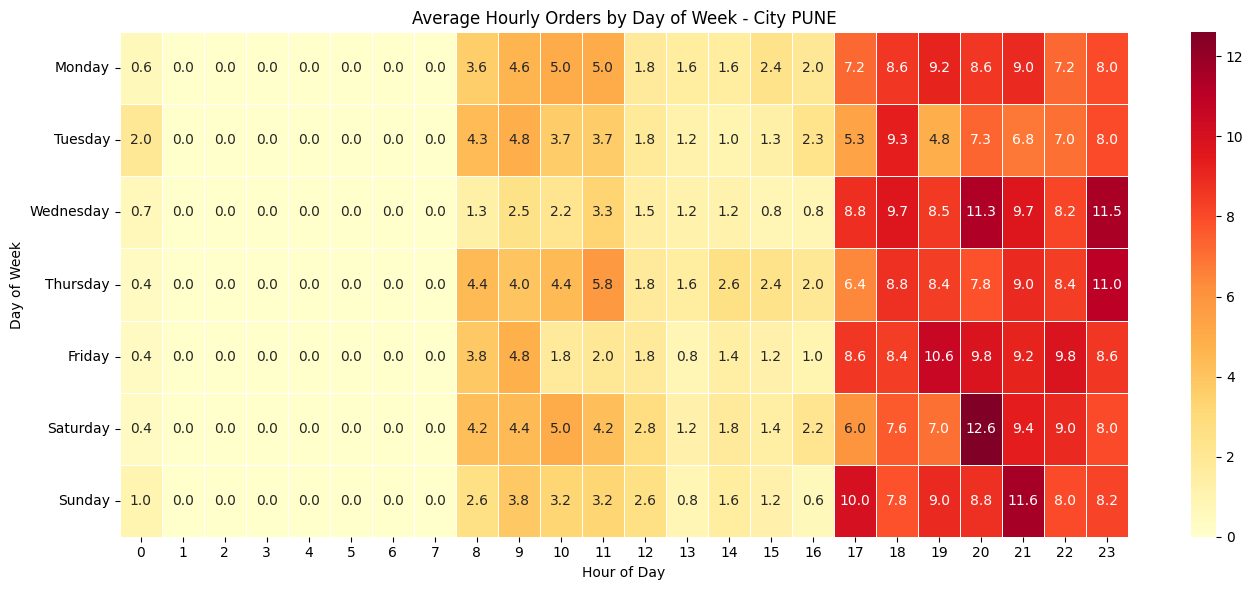

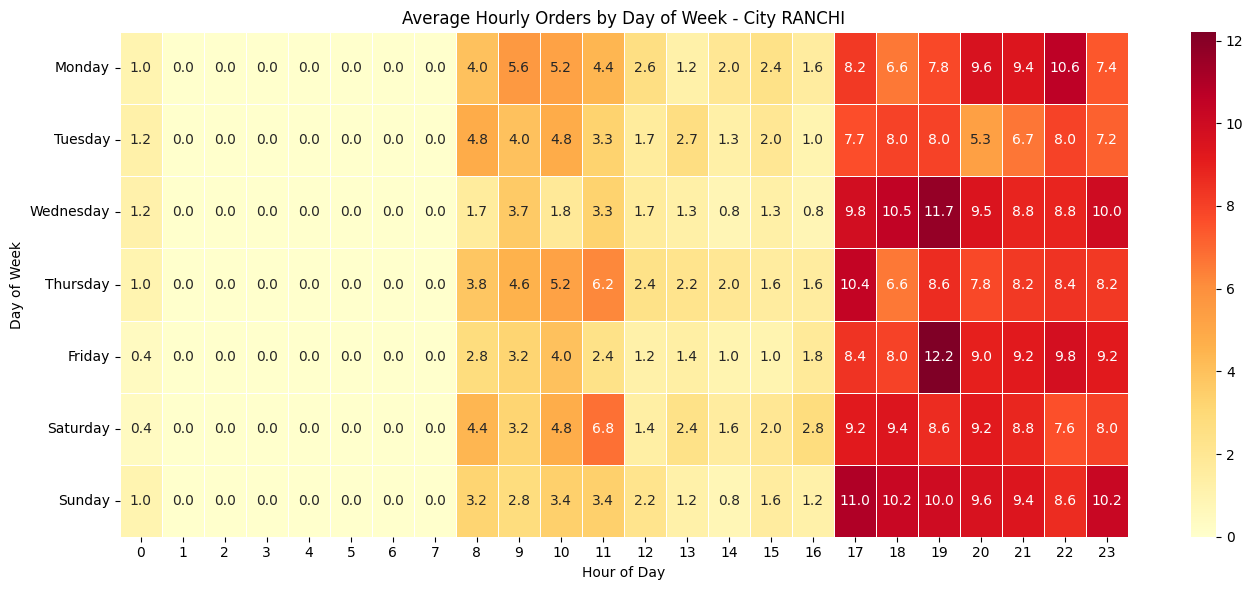

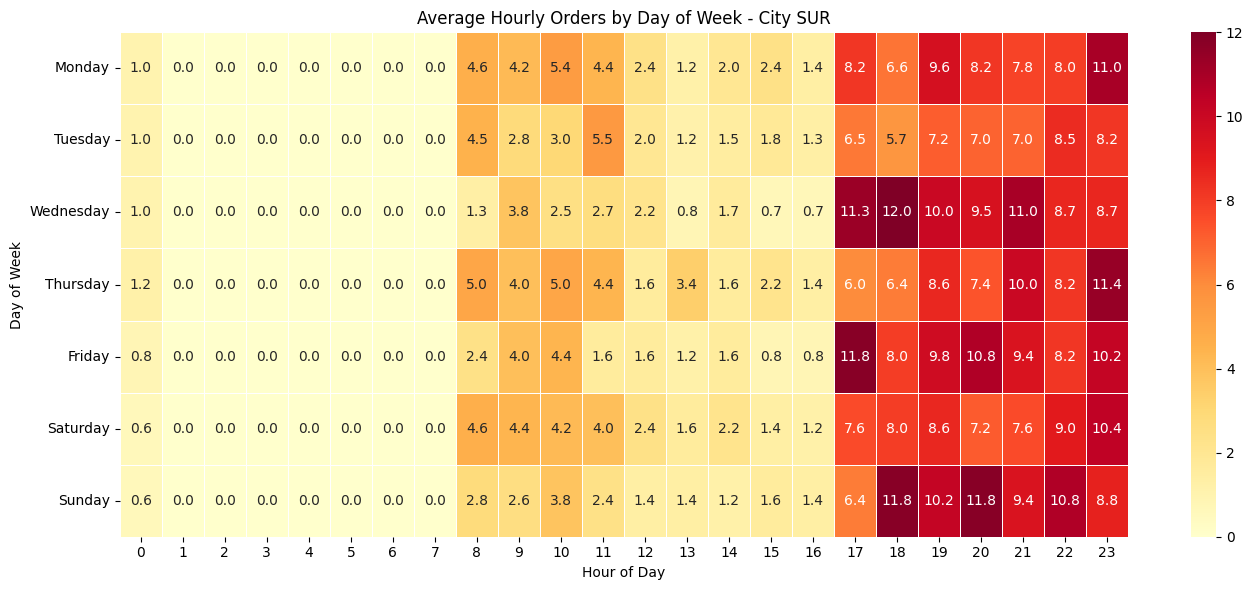

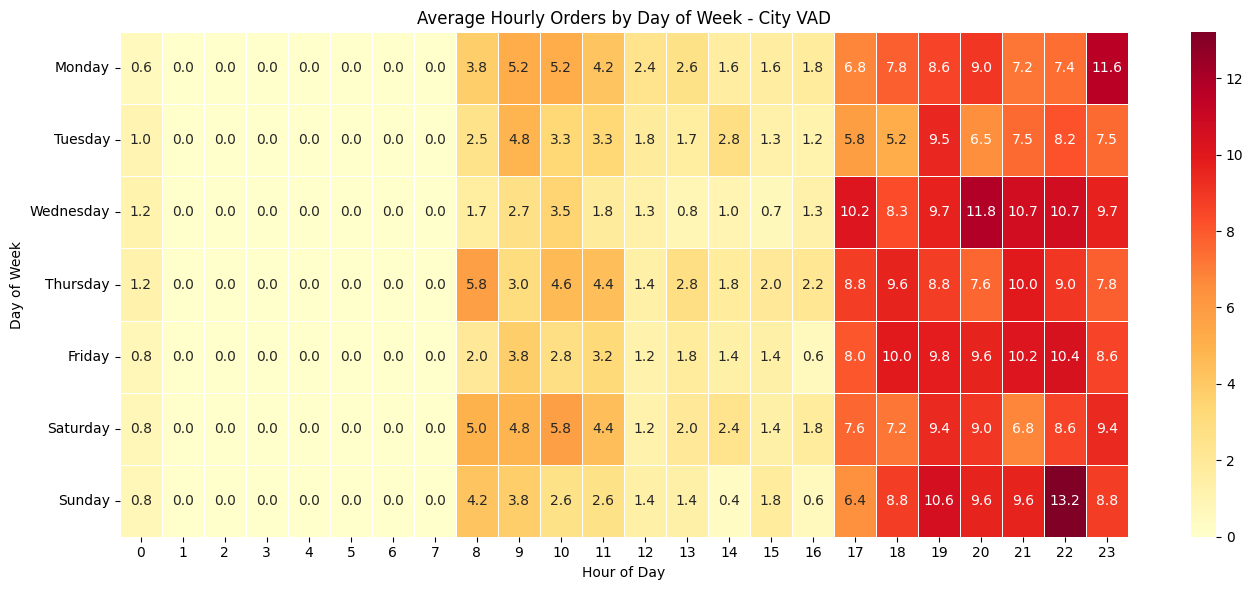

In [ ]:
# Group by City and resample hourly using Order_Timestamp
orders_hourly_city = (
    df_train
    .set_index('Order_Timestamp')
    .groupby('City_Code')
    .resample('H')
    .size()
    .reset_index(name='Num_Orders')
)

orders_hourly_city['weekday'] = orders_hourly_city['Order_Timestamp'].dt.day_name()
orders_hourly_city['hour'] = orders_hourly_city['Order_Timestamp'].dt.hour

# Weekday order for proper alignment
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plot heatmap per city
for city in orders_hourly_city['City_Code'].unique():
    city_df = orders_hourly_city[orders_hourly_city['City_Code'] == city]

    # Pivot for heatmap
    heatmap_data = city_df.groupby(['weekday', 'hour'])['Num_Orders'].mean().unstack()
    heatmap_data = heatmap_data.reindex(weekday_order)

    # Plot
    plt.figure(figsize=(14, 6))
    sns.heatmap(heatmap_data, cmap='YlOrRd', linewidths=0.5, annot=True, fmt=".1f")
    plt.title(f"Average Hourly Orders by Day of Week - City {city}")
    plt.xlabel("Hour of Day")
    plt.ylabel("Day of Week")
    plt.tight_layout()
    plt.show()

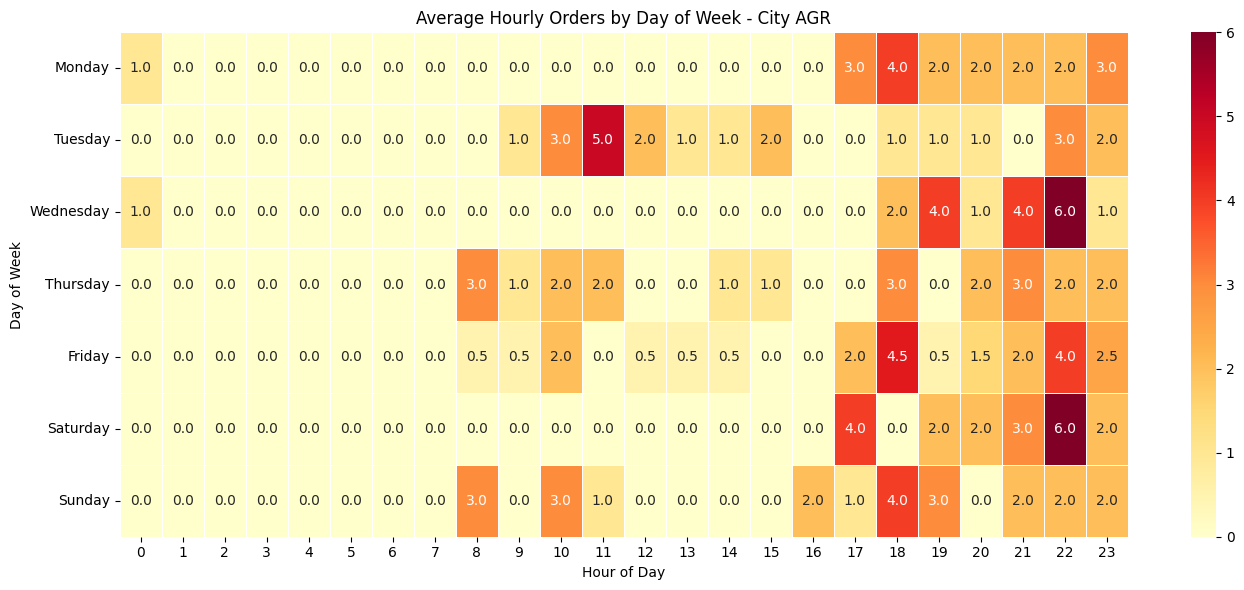

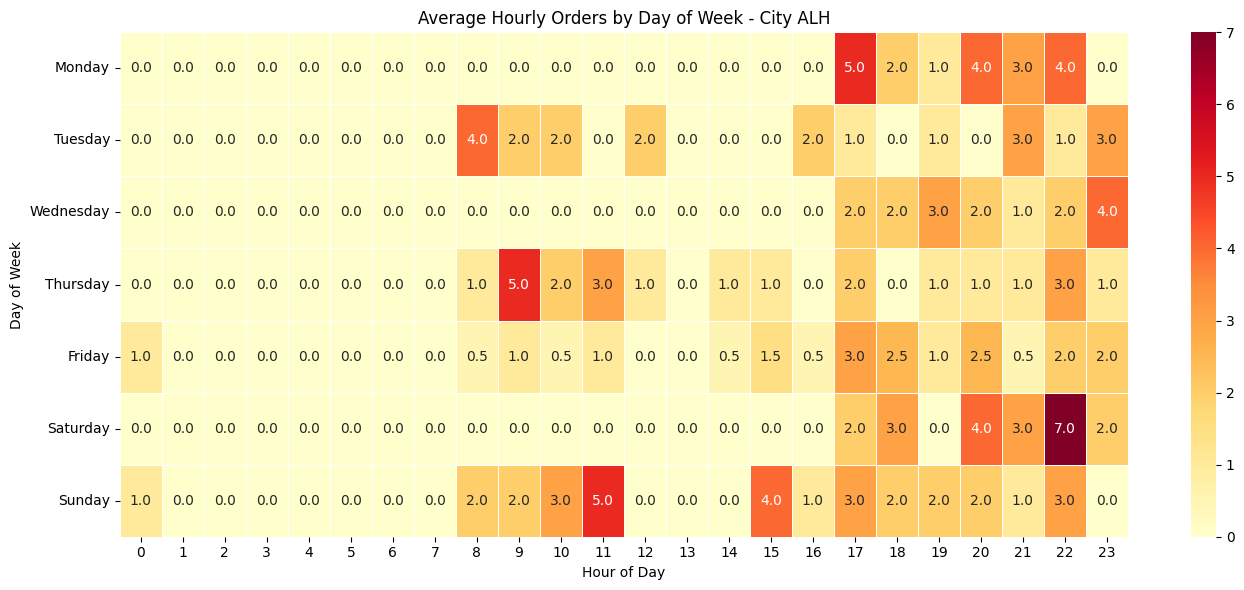

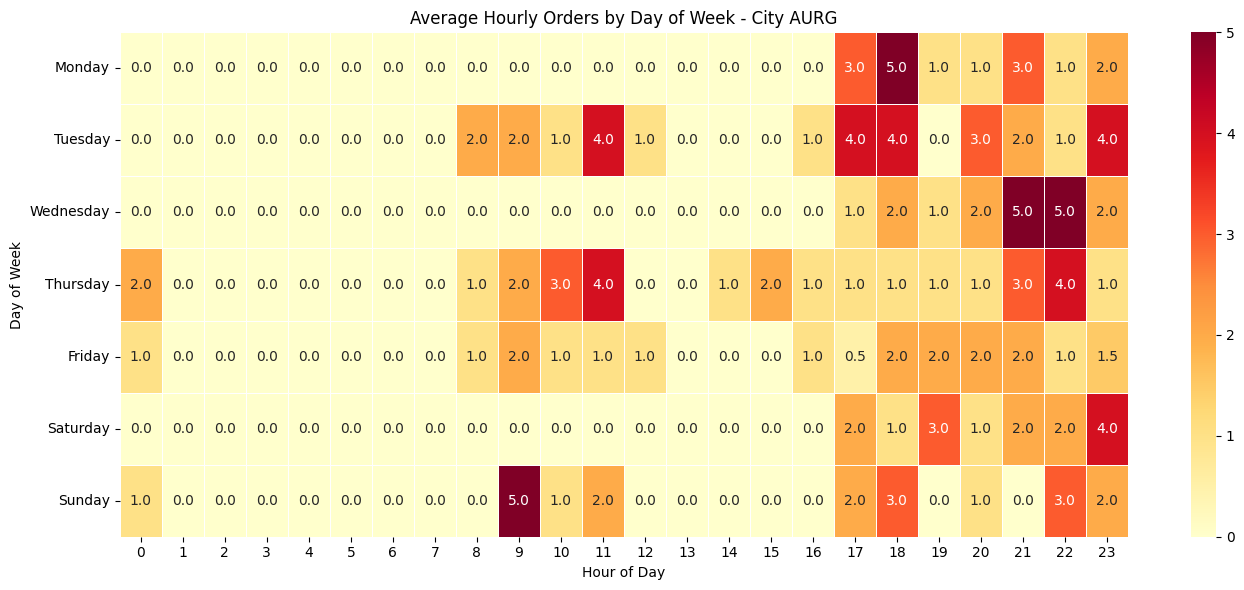

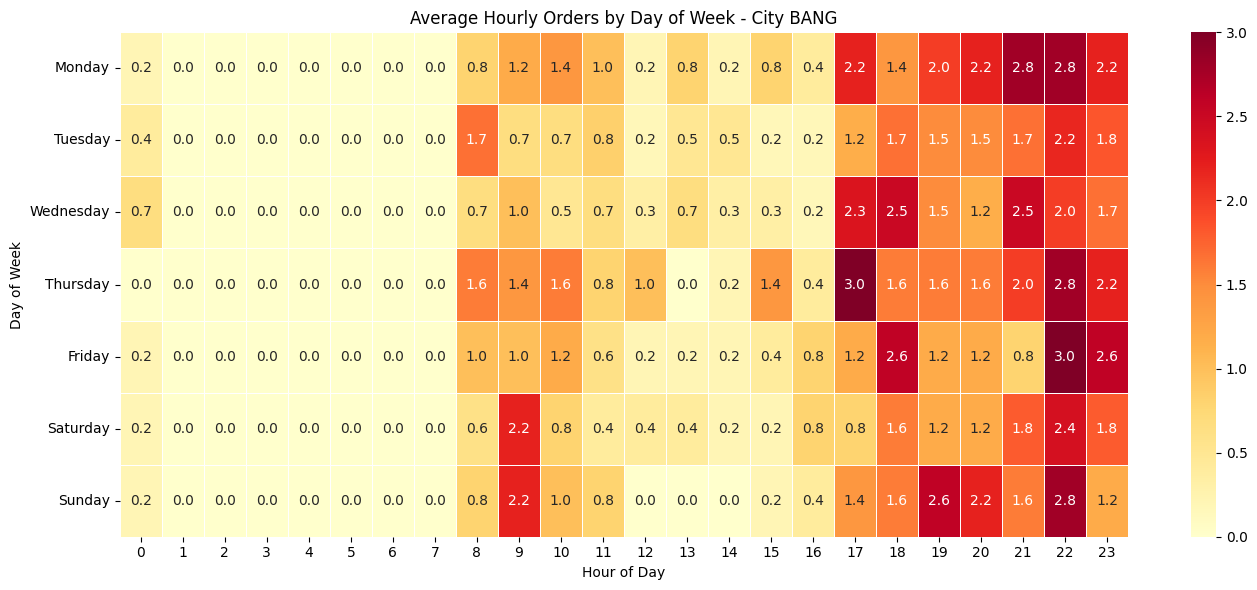

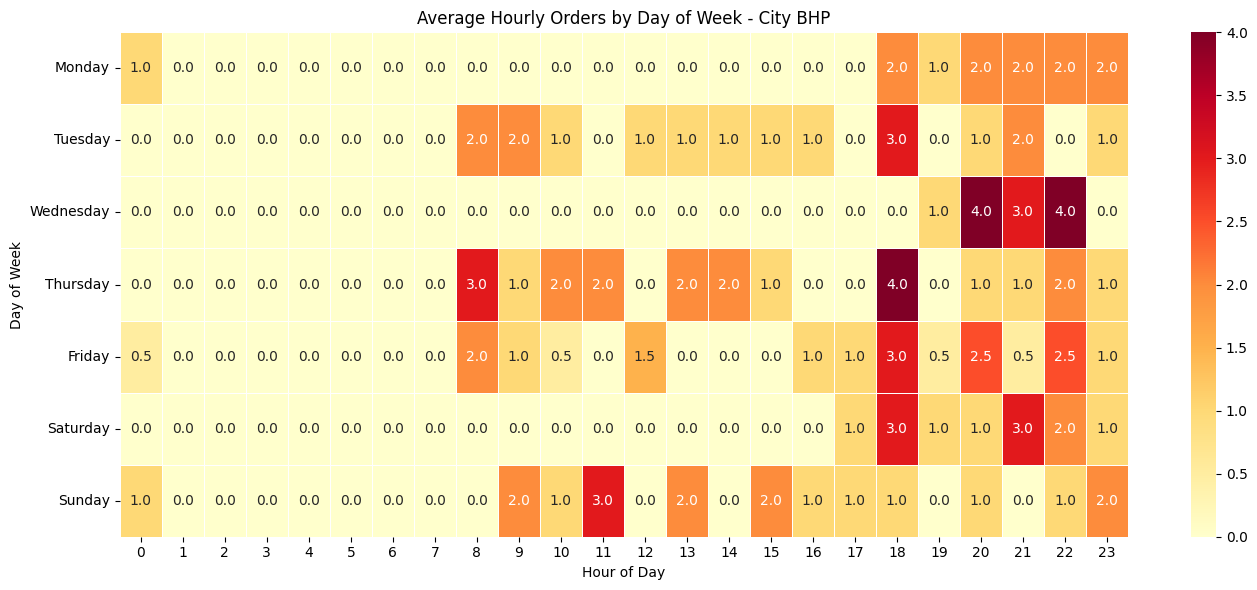

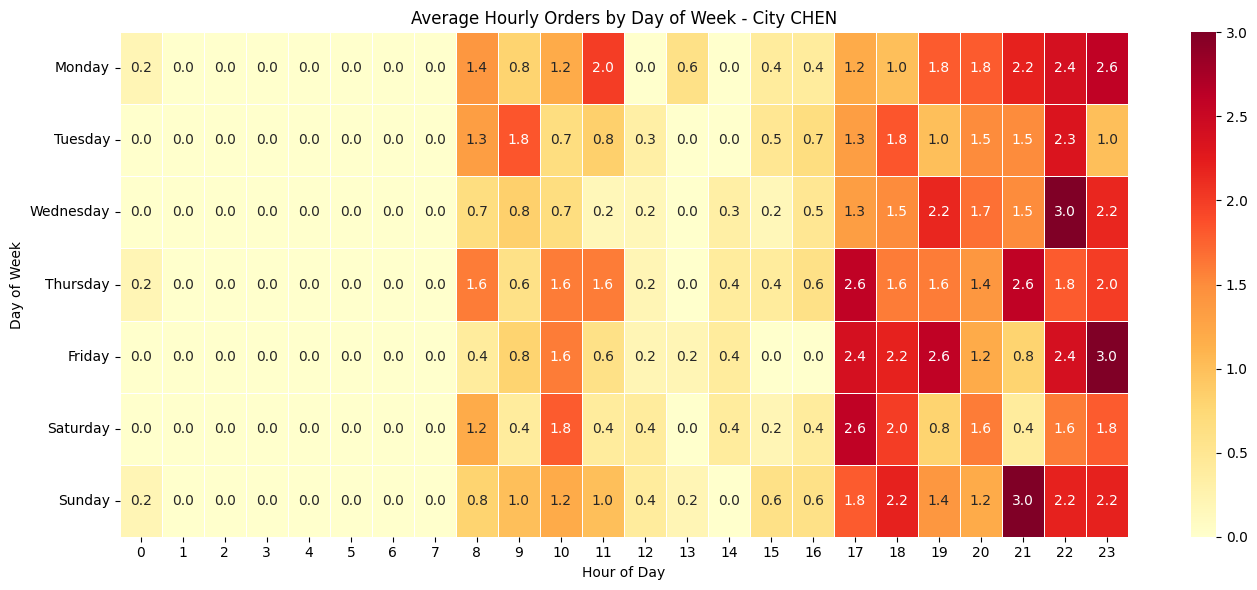

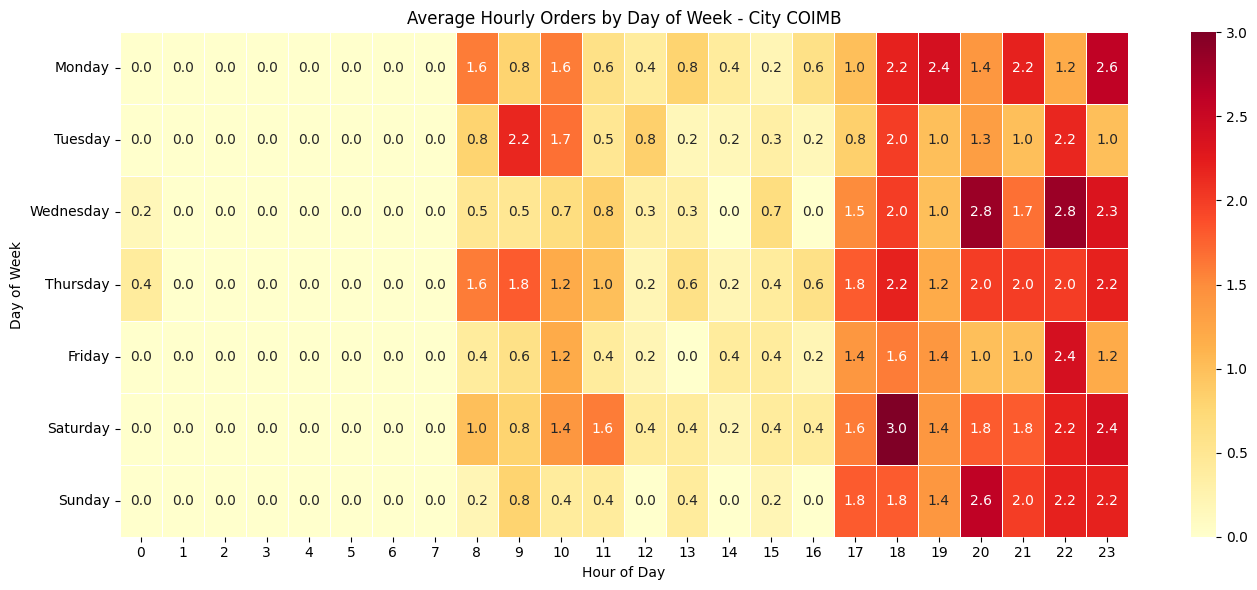

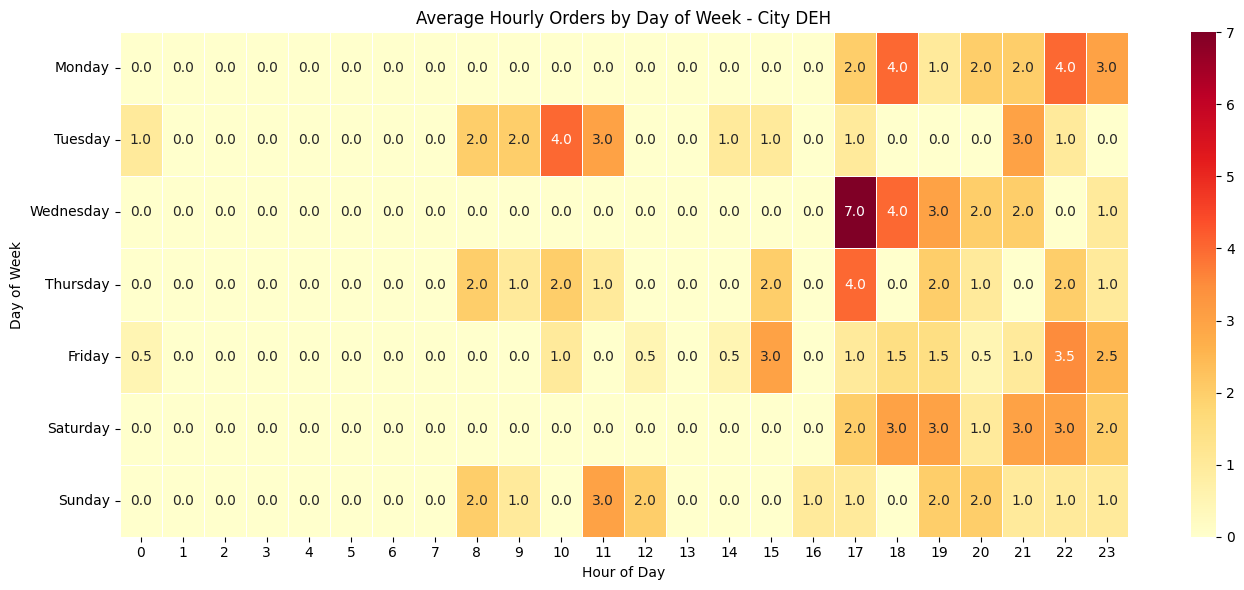

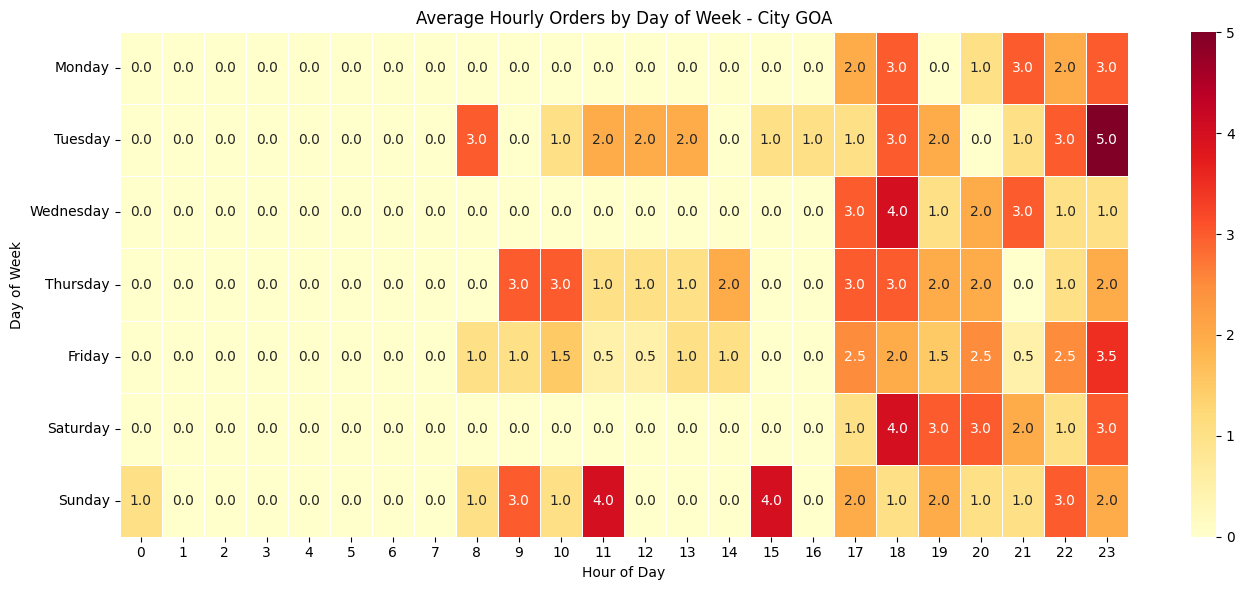

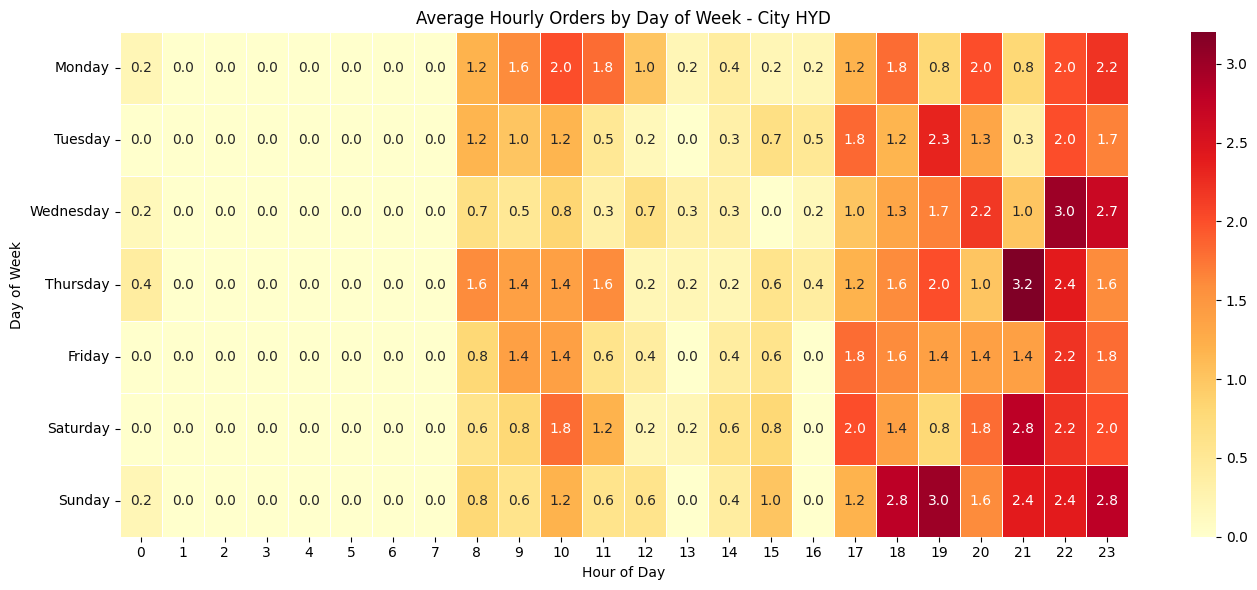

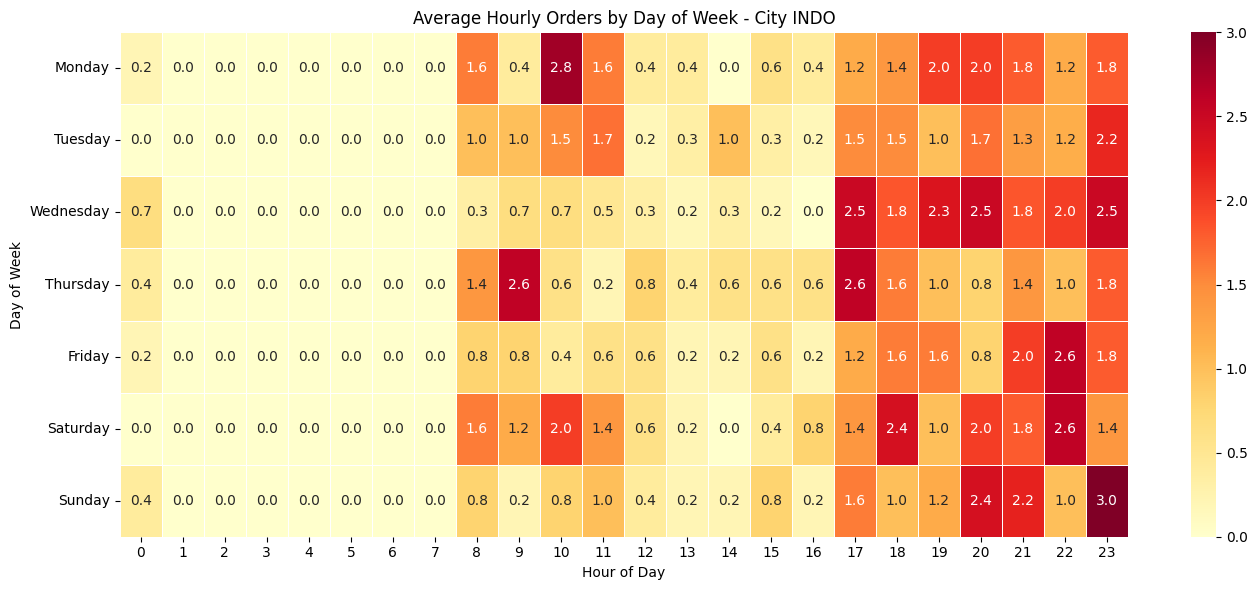

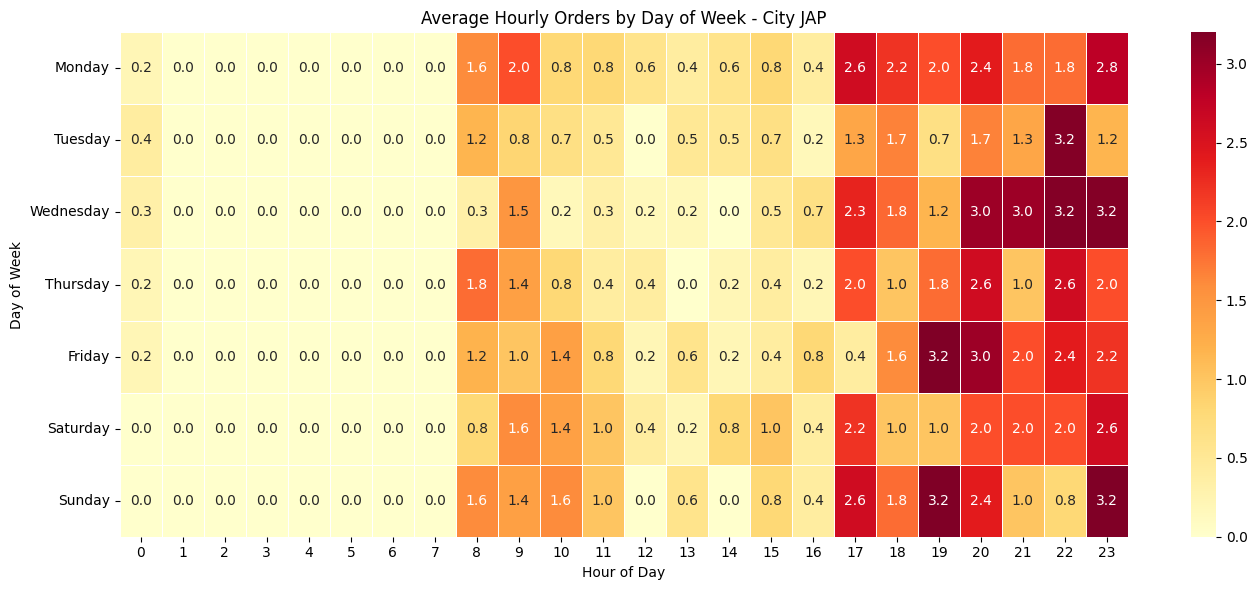

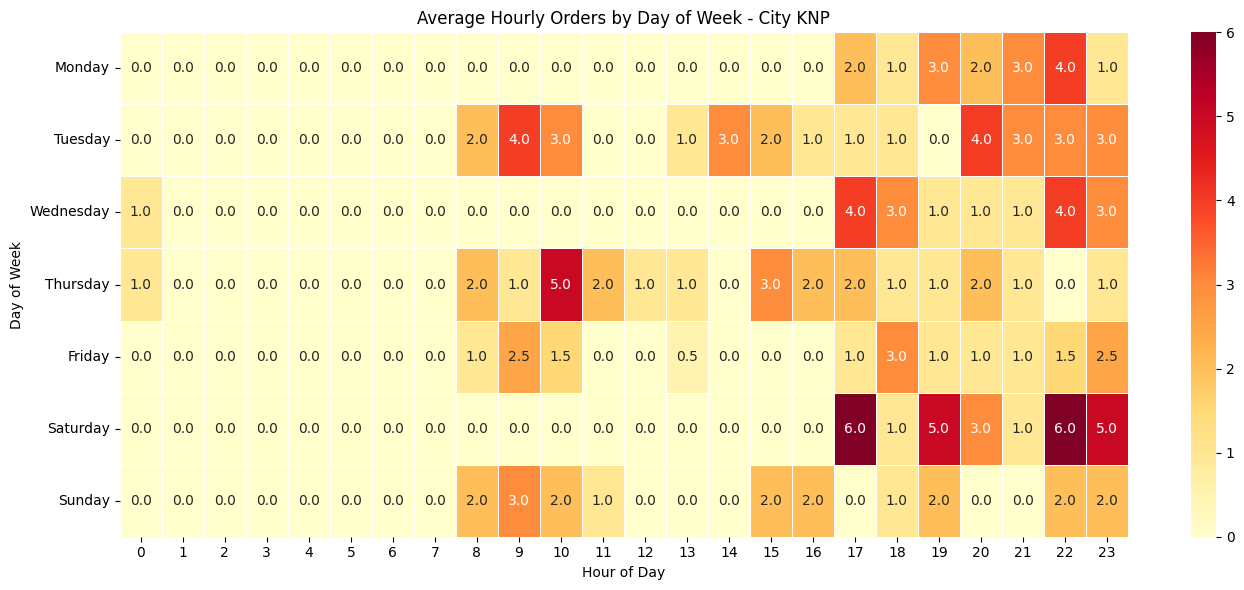

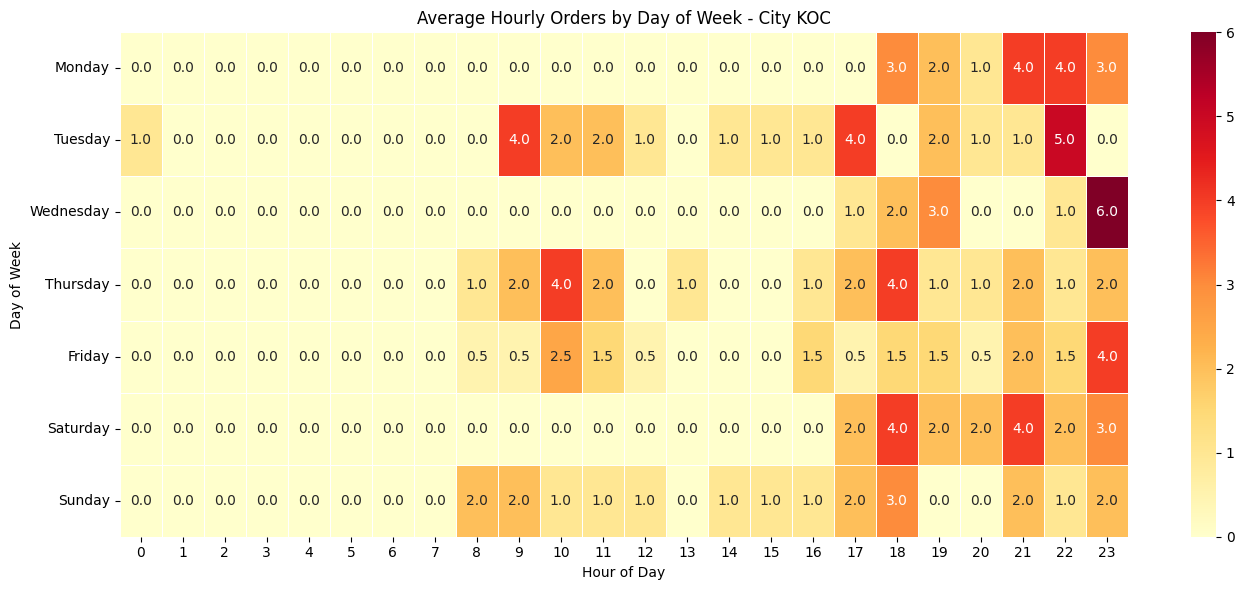

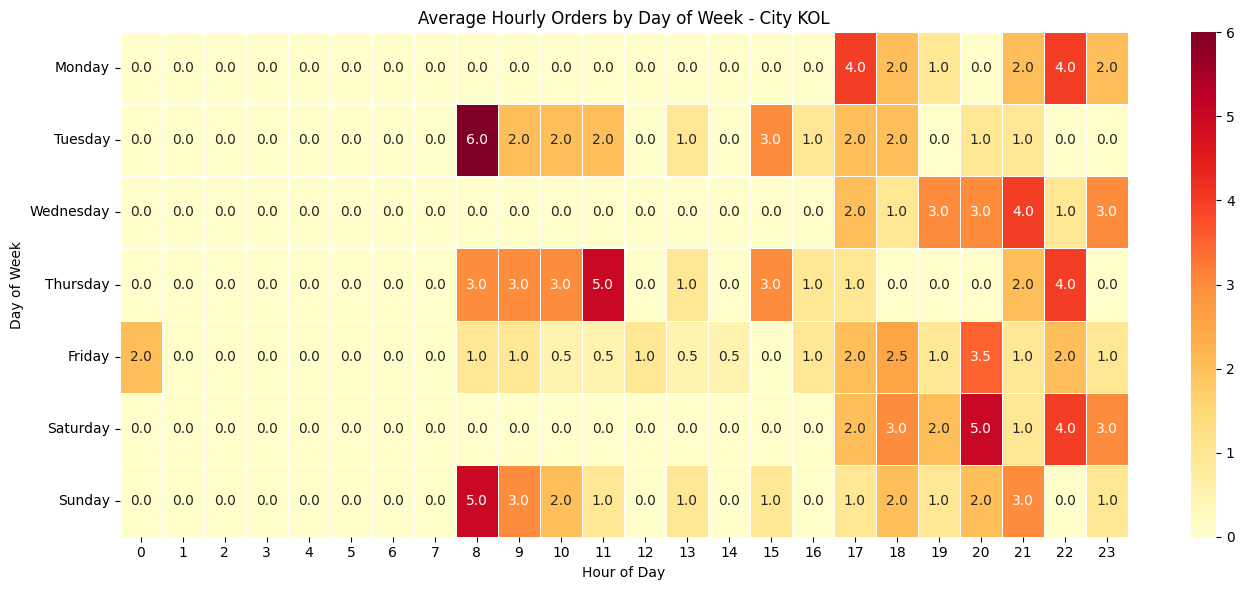

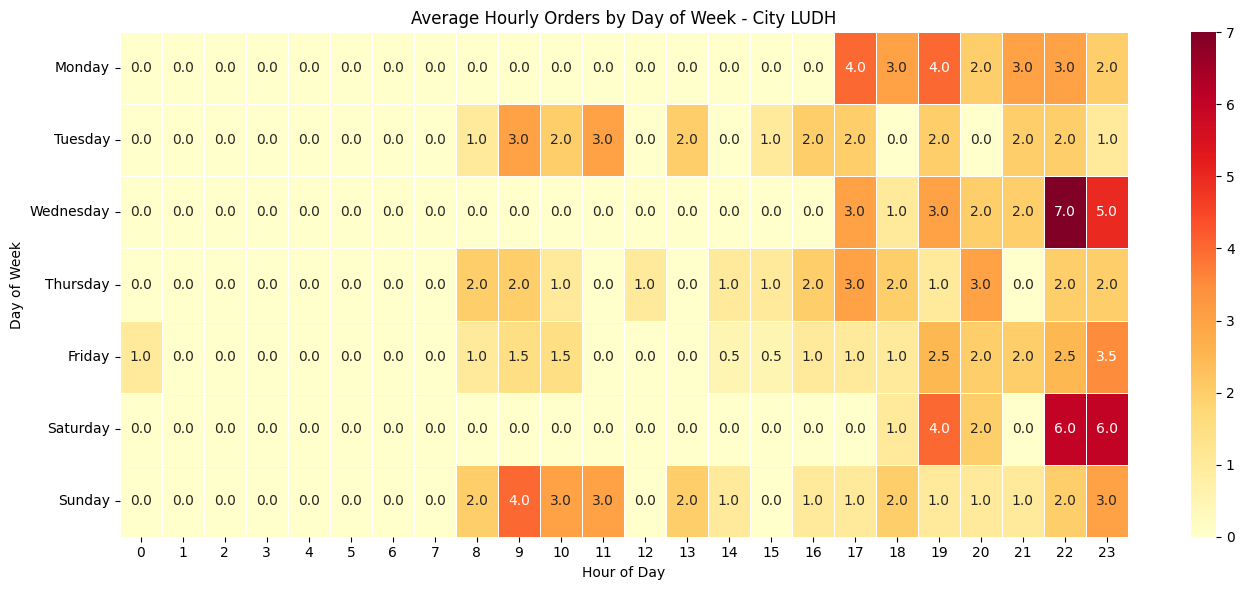

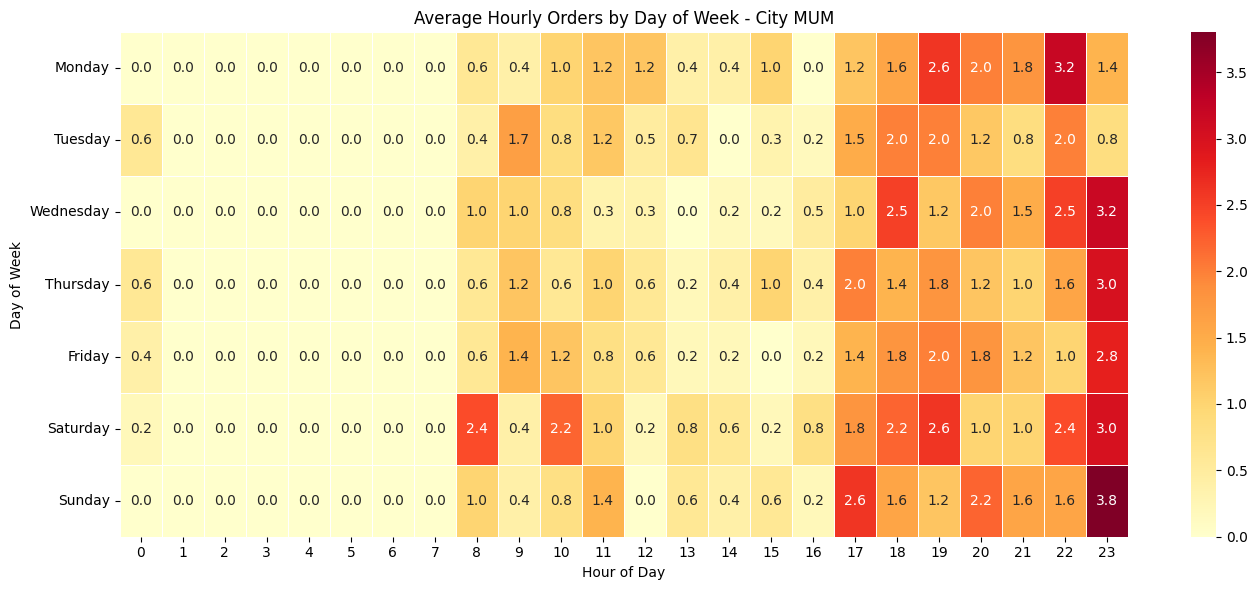

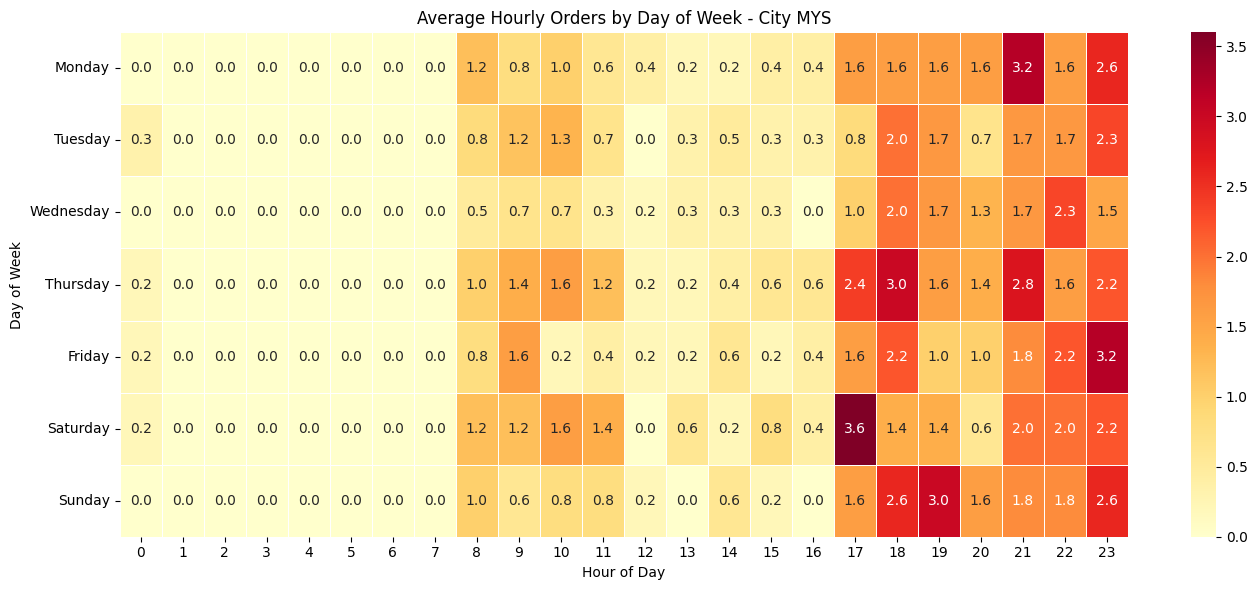

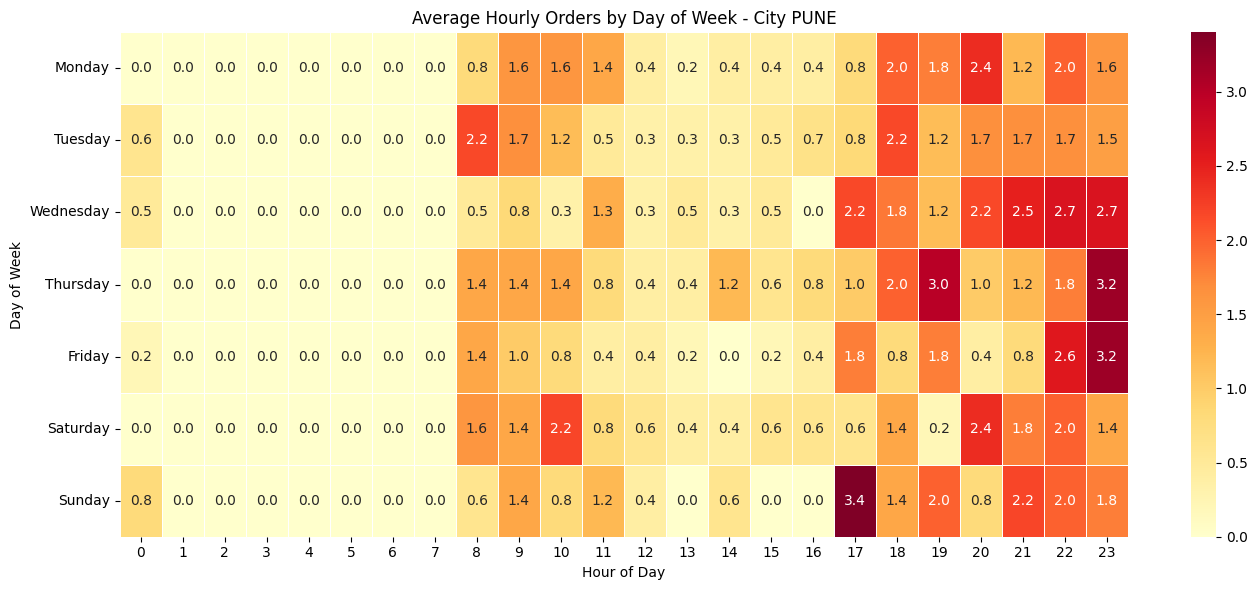

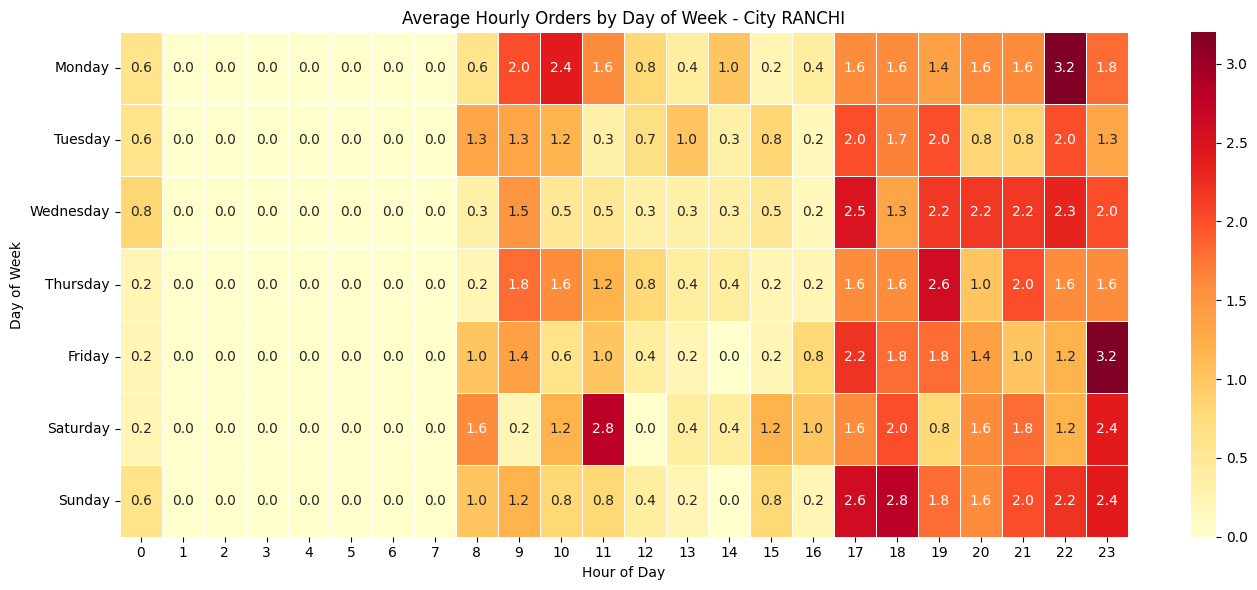

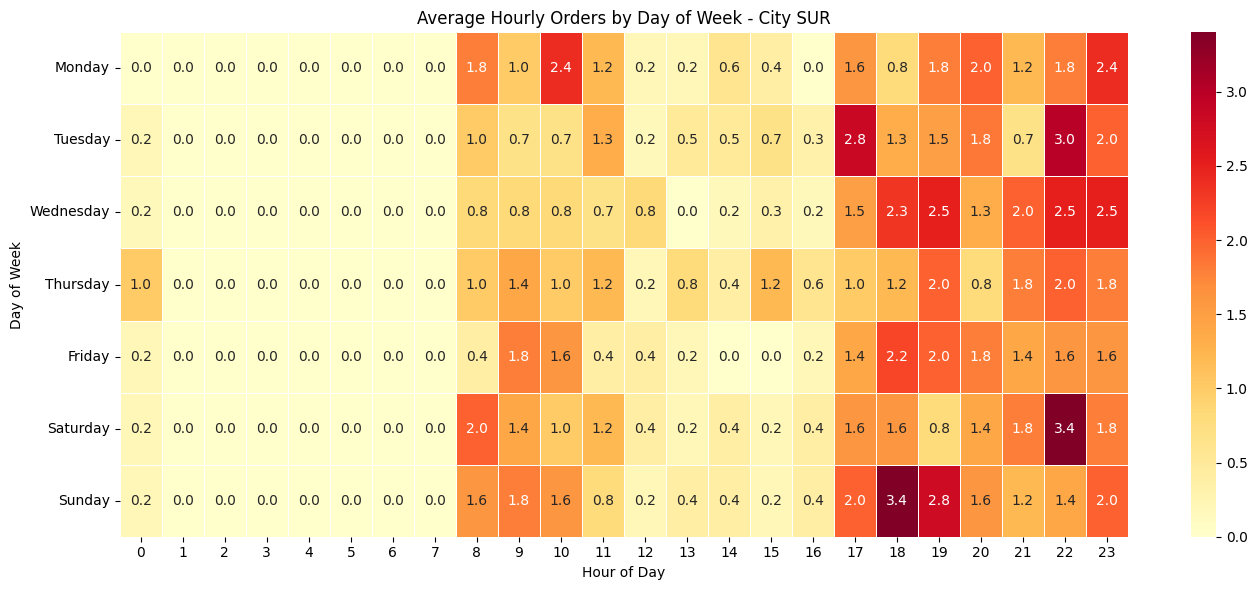

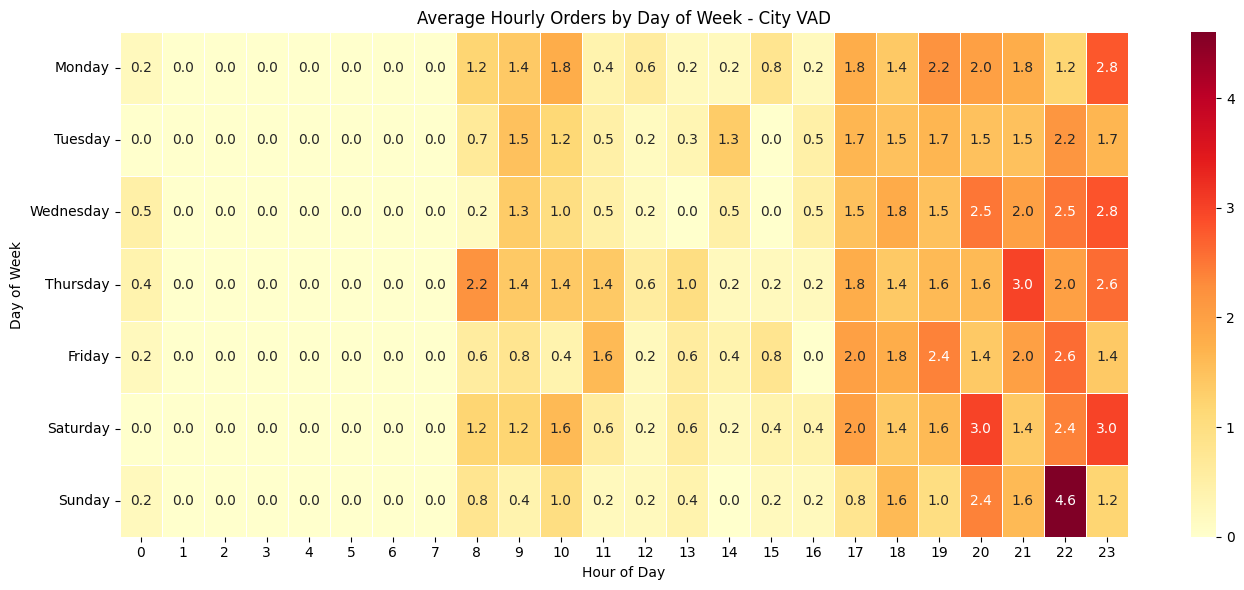

In [ ]:
## By City - Urban
df_urban = df_train[df_train['City'].str.strip() == "Urban"]

# Group by City_Code and resample hourly using Order_Timestamp
orders_hourly_urban = (
    df_urban
    .set_index('Order_Timestamp')
    .groupby('City_Code')
    .resample('H')
    .size()
    .reset_index(name='Num_Orders')
    )

orders_hourly_urban['weekday'] = orders_hourly_urban['Order_Timestamp'].dt.day_name()
orders_hourly_urban['hour'] = orders_hourly_urban['Order_Timestamp'].dt.hour

# Weekday order for proper alignment
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plot heatmap per city
for city in orders_hourly_urban['City_Code'].unique():
    city_df = orders_hourly_urban[orders_hourly_urban['City_Code'] == city]

    # Pivot for heatmap
    heatmap_data = city_df.groupby(['weekday', 'hour'])['Num_Orders'].mean().unstack()
    heatmap_data = heatmap_data.reindex(weekday_order)

    # Plot
    plt.figure(figsize=(14, 6))
    sns.heatmap(heatmap_data, cmap='YlOrRd', linewidths=0.5, annot=True, fmt=".1f")
    plt.title(f"Average Hourly Orders by Day of Week - City {city}")
    plt.xlabel("Hour of Day")
    plt.ylabel("Day of Week")
    plt.tight_layout()
    plt.show()

Text(0.5, 1.0, 'Hourly Order Distribution')

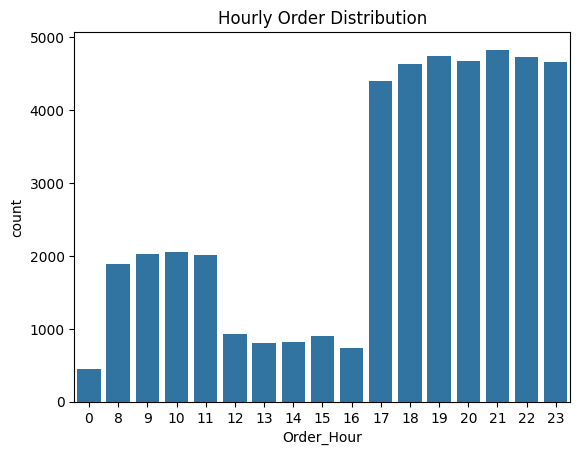

In [ ]:
sns.countplot(data=df_train, x='Order_Hour')
plt.title("Hourly Order Distribution")

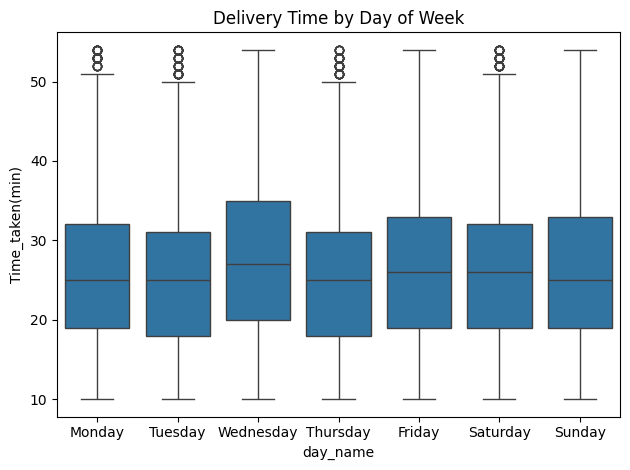

In [ ]:
# Define the correct order for days
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create the boxplot with ordered days
sns.boxplot(x='day_name', y='Time_taken(min)', data=df_train, order=day_order)
plt.title("Delivery Time by Day of Week")
plt.tight_layout()
plt.show()

<Axes: xlabel='Weatherconditions', ylabel='Time_taken(min)'>

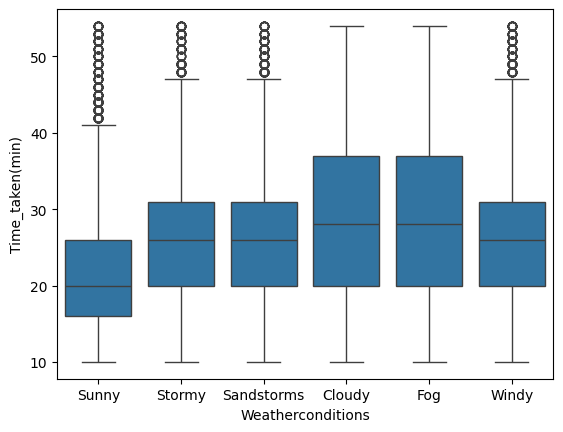

In [ ]:
sns.boxplot(x='Weatherconditions', y='Time_taken(min)', data=df_train)

<Axes: xlabel='Road_traffic_density', ylabel='Time_taken(min)'>

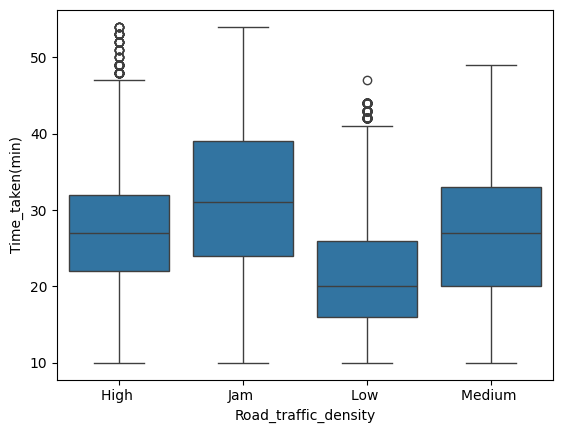

In [ ]:
sns.boxplot(x='Road_traffic_density', y='Time_taken(min)', data=df_train)

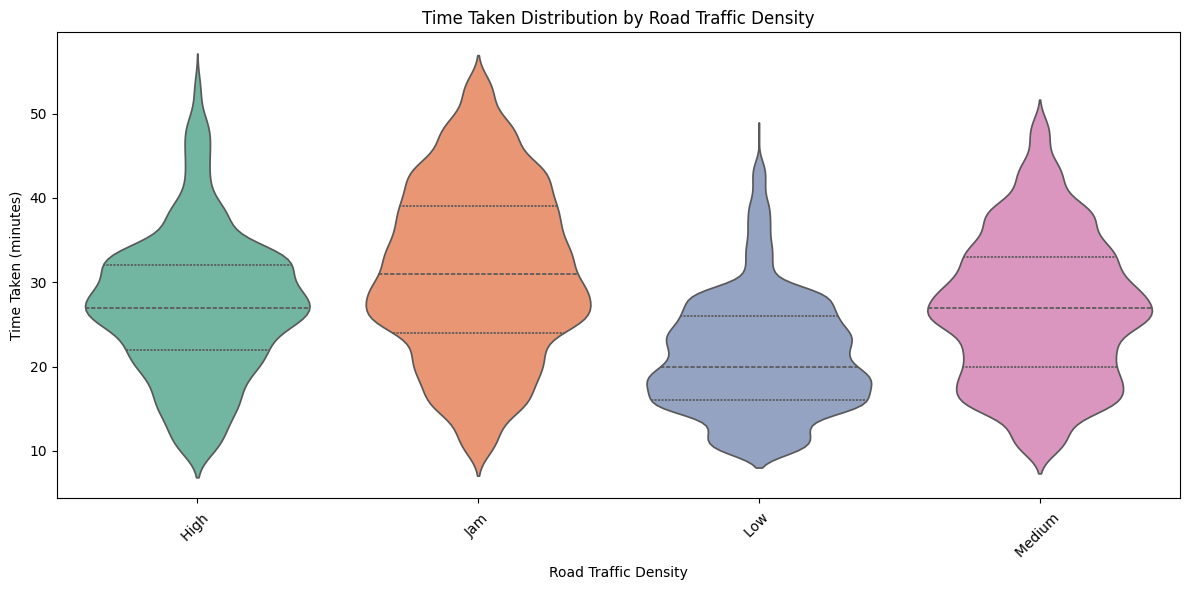

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Road_traffic_density', y='Time_taken(min)', data=df_train, inner='quartile', palette='Set2')
plt.title('Time Taken Distribution by Road Traffic Density')
plt.ylabel('Time Taken (minutes)')
plt.xlabel('Road Traffic Density')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Axes: xlabel='City'>

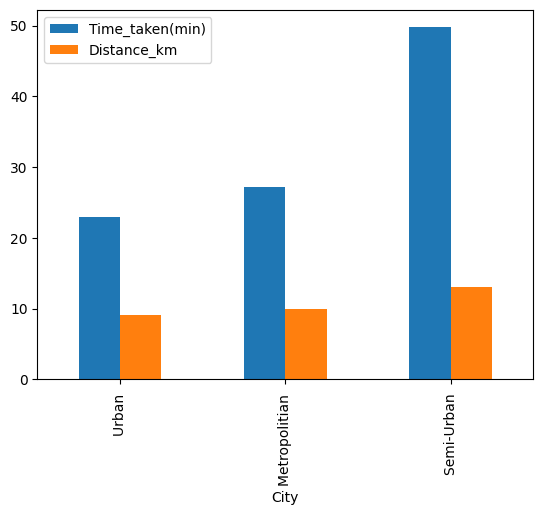

In [ ]:
df_train.groupby('City')[['Time_taken(min)', 'Distance_km']].mean().sort_values('Time_taken(min)').plot(kind='bar')

<Axes: xlabel='Festival', ylabel='Time_taken(min)'>

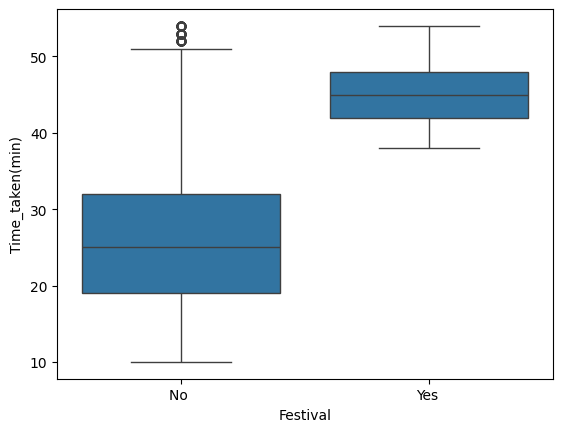

In [ ]:
sns.boxplot(x='Festival', y='Time_taken(min)', data=df_train)

<Axes: xlabel='Type_of_vehicle', ylabel='Time_taken(min)'>

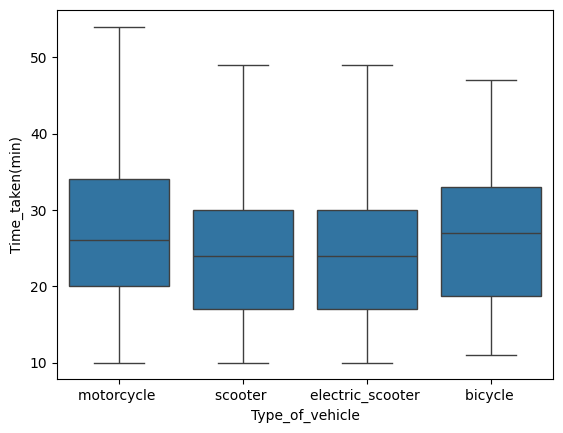

In [ ]:
sns.boxplot(x='Type_of_vehicle', y='Time_taken(min)', data=df_train)

<Axes: >

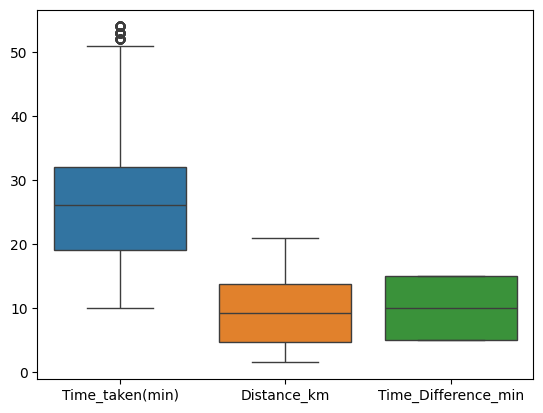

In [ ]:
sns.boxplot(data=df_train[['Time_taken(min)', 'Distance_km', 'Time_Difference_min']])

<Axes: >

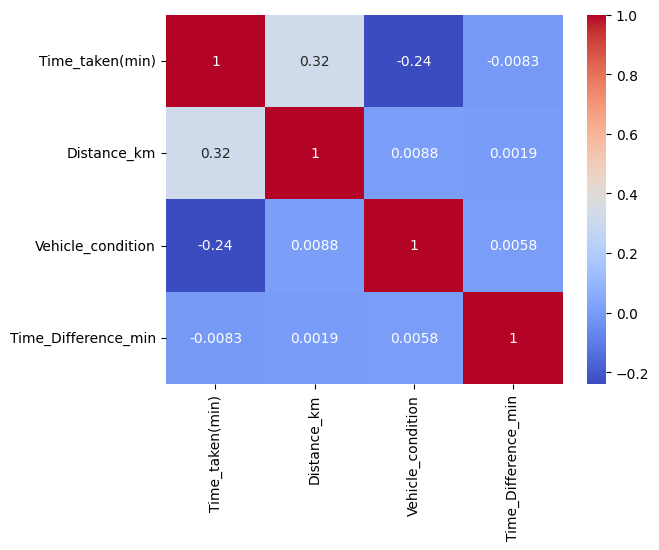

In [ ]:
corr = df_train[['Time_taken(min)', 'Distance_km', 'Vehicle_condition', 'Time_Difference_min']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [ ]:
df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

# Expanding Mean Model - Four Shifts

In [ ]:
# Group by shift-level granularity
group_cols = ['City_Code', 'Order_Date', 'Order_Hour']

# Base aggregation
df_agg_mean_model = df_train.groupby(group_cols).agg({
    'Distance_km': 'sum',
    'Festival_Binary': 'sum',
    'is_weekend': 'max',
    'Time_taken(min)': 'median',
    'Road_traffic_density': lambda x: x.mode().iloc[0] if not x.mode().empty else x.iloc[0],
    'Weatherconditions': lambda x: x.mode().iloc[0] if not x.mode().empty else x.iloc[0],
    'multiple_deliveries_1': lambda x: x.mode().iloc[0] if not x.mode().empty else x.iloc[0],
    'Shift_4': lambda x: x.mode().iloc[0] if not x.mode().empty else x.iloc[0],
    'day_name': lambda x: x.mode().iloc[0] if not x.mode().empty else x.iloc[0]
}).reset_index()

# Count of orders per shift
df_agg_mean_model['Num_Orders'] = df_train.groupby(group_cols).size().values

# Calculate Driver Demand: (No. of Orders * median_time_per_order) / (8 hours * 60 minutes)
#median_time_per_order = df_train['Time_taken(min)'].median()
df_agg_mean_model['Driver_Demand'] = np.ceil((df_agg_mean_model['Num_Orders'] * df_agg_mean_model['Time_taken(min)']) / 60).astype(int) ## rounding to the next whole number

# Ensure datetime sorting
df_agg_mean_model = df_agg_mean_model.sort_values(['City_Code', 'Order_Date', 'Order_Hour'])

df_agg_mean_model.head()

City_Code Order_Date  Order_Hour  Distance_km  Festival_Binary  is_weekend  \
0       AGR 2022-02-11           8    19.985372                0           0   
1       AGR 2022-02-11           9    19.572863                0           0   
2       AGR 2022-02-11          10    27.005634                0           0   
3       AGR 2022-02-11          11     6.110859                0           0   
4       AGR 2022-02-11          12    18.168377                0           0   

   Time_taken(min) Road_traffic_density Weatherconditions  \
0             24.0                 Low                Fog   
1             16.5                 Low             Cloudy   
2             19.0                 Low              Sunny   
3             40.0                High         Sandstorms   
4             26.0                High             Cloudy   

  multiple_deliveries_1    Shift_4 day_name  Num_Orders  Driver_Demand  
0                   yes    Morning   Friday           9              4  
1                   yes    Morning   Friday           8              3  
2                   yes    Morning   Friday          11              4  
3                   yes    Morning   Friday           3              2  
4                   yes  Afternoon   Friday           3              2

In [ ]:
# Create an expanding mean forecast of Driver_Demand
df_agg_mean_model['Expanding_Mean_Pred'] = (
    df_agg_mean_model
    .groupby(['City_Code', 'Order_Date', 'Shift_4'])['Driver_Demand']
    .apply(lambda x: x.shift(1).expanding().mean())  # shift(1) to avoid peeking at current value
    ).reset_index(level=[0, 1, 2], drop=True)

In [ ]:
df_agg_mean_model.head()

City_Code Order_Date  Order_Hour  Distance_km  Festival_Binary  is_weekend  \
0       AGR 2022-02-11           8    19.985372                0           0   
1       AGR 2022-02-11           9    19.572863                0           0   
2       AGR 2022-02-11          10    27.005634                0           0   
3       AGR 2022-02-11          11     6.110859                0           0   
4       AGR 2022-02-11          12    18.168377                0           0   

   Time_taken(min) Road_traffic_density Weatherconditions  \
0             24.0                 Low                Fog   
1             16.5                 Low             Cloudy   
2             19.0                 Low              Sunny   
3             40.0                High         Sandstorms   
4             26.0                High             Cloudy   

  multiple_deliveries_1    Shift_4 day_name  Num_Orders  Driver_Demand  \
0                   yes    Morning   Friday           9              4   
1                   yes    Morning   Friday           8              3   
2                   yes    Morning   Friday          11              4   
3                   yes    Morning   Friday           3              2   
4                   yes  Afternoon   Friday           3              2   

   Expanding_Mean_Pred  
0                  NaN  
1             4.000000  
2             3.500000  
3             3.666667  
4                  NaN

In [ ]:
# Drop NaNs from initial expanding periods
df_valid = df_agg_mean_model.dropna(subset=['Expanding_Mean_Pred'])
df_valid['Expanding_Mean_Pred'] = np.ceil(df_valid['Expanding_Mean_Pred']).astype(int)

mae_exp = mean_absolute_error(df_valid['Driver_Demand'], df_valid['Expanding_Mean_Pred'])
mse_exp = mean_squared_error(df_valid['Driver_Demand'], df_valid['Expanding_Mean_Pred'])
rmse_exp = np.sqrt(mse_exp)
r2_exp = r2_score(df_valid['Driver_Demand'], df_valid['Expanding_Mean_Pred'])

print(f"Expanding Mean Model Performance:\nMAE: {mae_exp:.2f}\nRMSE: {rmse_exp:.2f}")

Expanding Mean Model Performance:
MAE: 1.39
RMSE: 1.85


# Demand prediction based on previous week demand

In [ ]:
df_agg_mean_model['Order_Date'] = pd.to_datetime(df_agg_mean_model['Order_Date'])  # Ensure it's datetime
df_agg_mean_model['Last_Week_Date'] = df_agg_mean_model['Order_Date'] - pd.Timedelta(days=7)

In [ ]:
df_lag = df_agg_mean_model[['City_Code', 'Order_Date', 'Order_Hour', 'Driver_Demand']].copy()
df_lag = df_lag.rename(columns={
    'Order_Date': 'Last_Week_Date',
    'Driver_Demand': 'Demand_Last_Week'
    })

In [ ]:
df_agg_mean_model = df_agg_mean_model.merge(
    df_lag,
    how='left',
    on=['City_Code', 'Last_Week_Date', 'Order_Hour']
    )

In [ ]:
print(df_agg_mean_model.shape)
print(df_agg_mean_model[~df_agg_mean_model['Demand_Last_Week'].isna()].shape)

(6146, 17)
(2845, 17)


In [ ]:
# Drop NaNs
df_valid = df_agg_mean_model.dropna(subset=['Demand_Last_Week'])
df_valid['Demand_Last_Week'] = np.ceil(df_valid['Demand_Last_Week']).astype(int)

mae_prev = mean_absolute_error(df_valid['Driver_Demand'], df_valid['Demand_Last_Week'])
mse_prev = mean_squared_error(df_valid['Driver_Demand'], df_valid['Demand_Last_Week'])
rmse_prev = np.sqrt(mse_prev)
r2_prev = r2_score(df_valid['Driver_Demand'], df_valid['Demand_Last_Week'])

print(f"Previous Week Model Performance:\nMAE: {mae_prev:.2f}\nRMSE: {rmse_prev:.2f}")

Previous Week Model Performance:
MAE: 2.48
RMSE: 3.20


In [ ]:
df_agg_mean_model.head()

City_Code Order_Date  Order_Hour  Distance_km  Festival_Binary  is_weekend  \
0       AGR 2022-02-11           8    19.985372                0           0   
1       AGR 2022-02-11           9    19.572863                0           0   
2       AGR 2022-02-11          10    27.005634                0           0   
3       AGR 2022-02-11          11     6.110859                0           0   
4       AGR 2022-02-11          12    18.168377                0           0   

   Time_taken(min) Road_traffic_density Weatherconditions  \
0             24.0                 Low                Fog   
1             16.5                 Low             Cloudy   
2             19.0                 Low              Sunny   
3             40.0                High         Sandstorms   
4             26.0                High             Cloudy   

  multiple_deliveries_1    Shift_4 day_name  Num_Orders  Driver_Demand  \
0                   yes    Morning   Friday           9              4   
1                   yes    Morning   Friday           8              3   
2                   yes    Morning   Friday          11              4   
3                   yes    Morning   Friday           3              2   
4                   yes  Afternoon   Friday           3              2   

   Expanding_Mean_Pred Last_Week_Date  Demand_Last_Week  
0                  NaN     2022-02-04               NaN  
1             4.000000     2022-02-04               NaN  
2             3.500000     2022-02-04               NaN  
3             3.666667     2022-02-04               NaN  
4                  NaN     2022-02-04               NaN

# Mean Model + Previous Week Model

In [ ]:
df_agg_mean_model['Expanding_Mean_Last_Week'] = df_agg_mean_model['Expanding_Mean_Pred'].fillna(df_agg_mean_model['Demand_Last_Week'])

In [ ]:
# Create a forecast of Driver_Demand
df_agg_mean_model['Expanding_Mean_Last_Week'] = (
    df_agg_mean_model
    .groupby(['City_Code', 'Order_Date', 'Shift_4'])['Driver_Demand']
    .apply(lambda x: x.shift(1).expanding().mean())  # shift(1) to avoid peeking at current value
    ).reset_index(level=[0, 1, 2], drop=True)

In [ ]:
# Drop NaNs from initial expanding periods
df_valid = df_agg_mean_model.dropna(subset=['Expanding_Mean_Last_Week'])
df_valid['Expanding_Mean_Last_Week'] = np.ceil(df_valid['Expanding_Mean_Last_Week']).astype(int)

mae_exp_lw = mean_absolute_error(df_valid['Driver_Demand'], df_valid['Expanding_Mean_Last_Week'])
mse_exp_lw = mean_squared_error(df_valid['Driver_Demand'], df_valid['Expanding_Mean_Last_Week'])
rmse_exp_lw = np.sqrt(mse_exp)
r2_exp_lw = r2_score(df_valid['Driver_Demand'], df_valid['Expanding_Mean_Last_Week'])

print(f"Expanding Mean Model Performance:\nMAE: {mae_exp_lw:.2f}\nRMSE: {rmse_exp_lw:.2f}")

Expanding Mean Model Performance:
MAE: 1.39
RMSE: 1.85


# Exponential smoothing method - Holt-Winters and Hybrid Model (HW and Random Forest)

In [ ]:
# Group by shift-level granularity
group_cols = ['City_Code', 'Order_Date', 'Order_Hour']

# Base aggregation
df_agg = df_train.groupby(group_cols).agg({
    'Distance_km': 'sum',
    'Festival_Binary': 'sum',
    'is_weekend': 'max',
    'Time_taken(min)': 'median',
    'Road_traffic_density': lambda x: x.mode().iloc[0] if not x.mode().empty else x.iloc[0],
    'Weatherconditions': lambda x: x.mode().iloc[0] if not x.mode().empty else x.iloc[0],
    'multiple_deliveries_1': lambda x: x.mode().iloc[0] if not x.mode().empty else x.iloc[0],
    'Shift_4': lambda x: x.mode().iloc[0] if not x.mode().empty else x.iloc[0],
    'day_name': lambda x: x.mode().iloc[0] if not x.mode().empty else x.iloc[0]
}).reset_index()

# Count of orders per shift
df_agg['Num_Orders'] = df_train.groupby(group_cols).size().values

# Calculate Driver Demand: (No. of Orders * median_time_per_order) / (8 hours * 60 minutes)
#median_time_per_order = df_train['Time_taken(min)'].median()
df_agg['Driver_Demand'] = np.ceil((df_agg['Num_Orders'] * df_agg['Time_taken(min)']) / 60).astype(int) ## rounding to the next whole number

# Ensure datetime sorting
df_agg = df_agg.sort_values(['City_Code', 'Order_Date', 'Order_Hour'])

df_agg.head()

City_Code Order_Date  Order_Hour  Distance_km  Festival_Binary  is_weekend  \
0       AGR 2022-02-11           8    19.985372                0           0   
1       AGR 2022-02-11           9    19.572863                0           0   
2       AGR 2022-02-11          10    27.005634                0           0   
3       AGR 2022-02-11          11     6.110859                0           0   
4       AGR 2022-02-11          12    18.168377                0           0   

   Time_taken(min) Road_traffic_density Weatherconditions  \
0             24.0                 Low                Fog   
1             16.5                 Low             Cloudy   
2             19.0                 Low              Sunny   
3             40.0                High         Sandstorms   
4             26.0                High             Cloudy   

  multiple_deliveries_1    Shift_4 day_name  Num_Orders  Driver_Demand  
0                   yes    Morning   Friday           9              4  
1                   yes    Morning   Friday           8              3  
2                   yes    Morning   Friday          11              4  
3                   yes    Morning   Friday           3              2  
4                   yes  Afternoon   Friday           3              2

In [ ]:
df_agg['Timestamp'] = pd.to_datetime(df_agg['Order_Date']) + pd.to_timedelta(df_agg['Order_Hour'], unit='h')
df_agg = df_agg.set_index('Timestamp').sort_index()

In [ ]:
hw_model = ExponentialSmoothing(
    df_agg['Driver_Demand'],
    trend='add',
    seasonal='add',
    seasonal_periods=24  # daily seasonality
    ).fit()

df_agg['HW_Forecast'] = hw_model.fittedvalues
df_agg['HW_Residual'] = df_agg['Driver_Demand'] - df_agg['HW_Forecast']

In [ ]:
# Features
cat_cols_hw = ['Festival_Binary', 'is_weekend', 'Road_traffic_density', 'Shift_4', 'Weatherconditions', 'multiple_deliveries_1', 'day_name']
num_cols_hw = ['Time_taken(min)', 'Distance_km', 'Order_Hour', 'Num_Orders']

In [ ]:
# Encode categorical features if needed
df_encoded_cat = pd.get_dummies(df_agg[cat_cols_hw], drop_first=True)

# Scale numerical features
scaler = StandardScaler()
df_encoded_num = pd.DataFrame(scaler.fit_transform(df_agg[num_cols_hw]), columns=num_cols_hw, index=df_agg.index)

# Combine the scaled numerical features with the encoded categorical features
df_encoded = pd.concat([df_encoded_cat, df_encoded_num], axis=1)


rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(df_encoded, df_agg['HW_Residual'])

df_agg['Residual_Pred'] = rf.predict(df_encoded)
df_agg['Hybrid_Prediction'] = df_agg['HW_Forecast'] + df_agg['Residual_Pred']

In [ ]:
actual = df_agg['Driver_Demand']
hw = df_agg['HW_Forecast']
residual = df_agg['Residual_Pred']
hybrid = df_agg['Hybrid_Prediction']

# MAE
mae_hw = mean_absolute_error(actual, hw)
mae_rf = mean_absolute_error(actual, residual)  # This is kind of unfair since RF is predicting residuals, not demand
mae_hybrid = mean_absolute_error(actual, hybrid)

# MSE
mse_hw = mean_squared_error(actual, hw)
mse_rf = mean_squared_error(actual, residual)
mse_hybrid = mean_squared_error(actual, hybrid)

# RMSE
rmse_hw = np.sqrt(mse_hw)
rmse_rf = np.sqrt(mse_rf)
rmse_hybrid = np.sqrt(mse_hybrid)

print(f"Holt-Winters Forecast: {hw}")
print(f"Holt-Winters MAE: {mae_hw:.2f}, RMSE: {rmse_hw:.2f}")
print(f"Residual MAE:     {mae_rf:.2f}, RMSE: {rmse_rf:.2f} (not full forecast)")
print(f"Hybrid MAE:       {mae_hybrid:.2f}, RMSE: {rmse_hybrid:.2f}")

Holt-Winters Forecast: Timestamp
2022-02-11 00:00:00    1.564391
2022-02-11 00:00:00    1.143048
2022-02-11 00:00:00    1.238869
2022-02-11 00:00:00    1.310255
2022-02-11 08:00:00    1.046996
                         ...   
2022-04-06 23:00:00    5.306529
2022-04-06 23:00:00    5.633024
2022-04-06 23:00:00    5.127838
2022-04-06 23:00:00    5.167007
2022-04-06 23:00:00    5.874487
Name: HW_Forecast, Length: 6146, dtype: float64
Holt-Winters MAE: 1.12, RMSE: 1.50
Residual MAE:     3.70, RMSE: 4.08 (not full forecast)
Hybrid MAE:       0.19, RMSE: 0.27


In [ ]:
# Save this Model
import pickle

# Save the trained model
with open('rf_model.pkl', 'wb') as file:
    pickle.dump(rf, file)

# Save the scaler
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

# Save the column names for reference
model_columns = {
    'categorical_columns': cat_cols_hw,
    'numerical_columns': num_cols_hw,
    'encoded_columns': df_encoded.columns.tolist()
}
with open('model_columns.pkl', 'wb') as file:
    pickle.dump(model_columns, file)

In [ ]:
# Save the Holt-Winters Model

# Save the trained model
with open('hw_model.pkl', 'wb') as file:
    pickle.dump(hw_model, file)



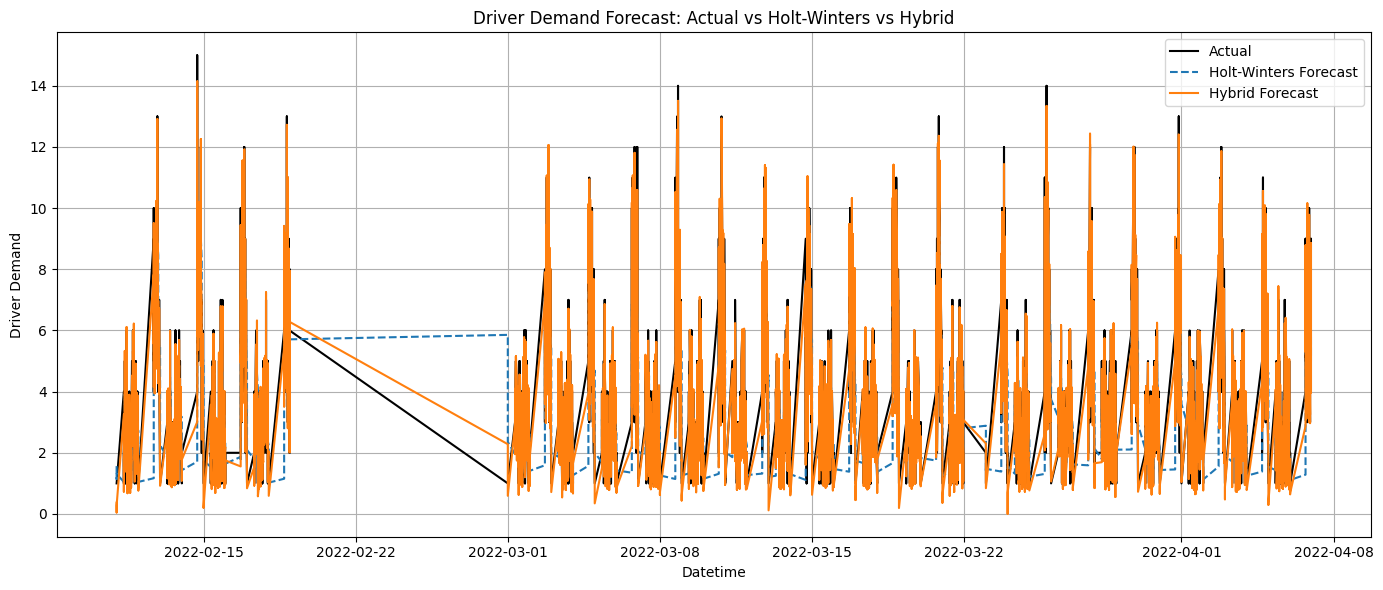

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(df_agg.index, actual, label='Actual', color='black')
plt.plot(df_agg.index, hw, label='Holt-Winters Forecast', linestyle='--')
plt.plot(df_agg.index, hybrid, label='Hybrid Forecast', linestyle='-')
plt.legend()
plt.title("Driver Demand Forecast: Actual vs Holt-Winters vs Hybrid")
plt.xlabel("Datetime")
plt.ylabel("Driver Demand")
plt.grid(True)
plt.tight_layout()
plt.show()

# Theta Method (not working)

In [ ]:
pip install statsforecast

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.4/354.4 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.8/285.8 kB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 11.6 MB/s eta 0:00:00


In [ ]:
from statsforecast import StatsForecast
from statsforecast.models import Theta

In [ ]:
# Filter for BANG
df_theta = df_agg[df_agg['City_Code'] == 'BANG'].copy()

# Create timestamp
df_theta['ds'] = pd.to_datetime(df_theta['Order_Date']) + pd.to_timedelta(df_theta['Order_Hour'], unit='h')
df_theta = df_theta.sort_values('ds')

# Rename for StatsForecast format
df_theta = df_theta[['ds', 'Driver_Demand']].copy()
df_theta['unique_id'] = 'BANG'
df_theta.rename(columns={'Driver_Demand': 'y'}, inplace=True)

In [ ]:
sf = StatsForecast(
    models=[Theta()],
    freq='H',
    n_jobs=1
    )

# Fit and forecast next 24 hours
df_theta_fcst = sf.forecast(df=df_theta, h=24)

In [ ]:
# theta_fitted = sf.models[0].fitted_values_ # Access the first element (Theta model) using index 0
# theta_fitted = sf.models[0] # Removed .fitted_values_ Access the first element (Theta model) using index 0
# df_agg['Theta_Forecast'] = df_agg.index.map(theta_fitted) # theta_fitted['Theta'].values

In [ ]:
# Merge actual + forecast
# df_plot = pd.concat([df_theta.set_index('ds')['y'], df_theta_fcst.set_index('ds')['Theta']], axis=1)

# plt.figure(figsize=(14,6))
# plt.plot(df_plot['y'], label='Actual')
# plt.plot(df_plot['Theta'], label='Theta Forecast', linestyle='--')
# plt.title("Theta Forecast — BANG Driver Demand")
# plt.legend()
# plt.grid(True)
# plt.show()

# Linear Regression (base model, not working)

In [ ]:
def create_shift_level_features(df):

    # Grouping columns
    group_cols = ['City_Code', 'Order_Date', 'Order_Hour', 'day_name']

    # Check if 'Time_taken(min)' is present
    has_time_taken = 'Time_taken(min)' in df.columns

    # Base aggregation dictionary
    agg_dict = {
        'Distance_km': 'sum',
        'Festival_Binary': 'sum',
        'is_weekend': 'max',
        'Road_traffic_density': lambda x: x.mode().iloc[0] if not x.mode().empty else x.iloc[0],
        'Weatherconditions': lambda x: x.mode().iloc[0] if not x.mode().empty else x.iloc[0],
        'multiple_deliveries_1': lambda x: x.mode().iloc[0] if not x.mode().empty else x.iloc[0],
        # 'day_name': lambda x: x.mode().iloc[0] if not x.mode().empty else x.iloc[0]
    }

    if has_time_taken:
        agg_dict['Time_taken(min)'] = 'median'

    # Aggregate at shift level
    df_agg = df.groupby(group_cols).agg(agg_dict).reset_index()

    # Number of orders per shift
    df_agg['Num_Orders'] = df.groupby(group_cols).size().values

    # Driver demand calculation (only if Time_taken(min) exists)
    if has_time_taken:
        df_agg['Driver_Demand'] = np.ceil((df_agg['Num_Orders'] * df_agg['Time_taken(min)']) / 60).astype(int) ## rounding to the nearest whole number

    return df_agg

In [ ]:
df_train_agg = create_shift_level_features(df_train)
df_train_agg.shape

(6146, 13)

In [ ]:
df_test_agg = create_shift_level_features(df_test)
df_test_agg.shape

(4857, 11)

In [ ]:
# Select features
numerical_cols = ['Distance_km', 'Festival_Binary', 'is_weekend', 'Num_Orders']

categorical_cols = ['Weatherconditions', 'Road_traffic_density', 'day_name', 'City_Code', 'multiple_deliveries_1']

target = ['Driver_Demand']

In [ ]:
all_features = numerical_cols + categorical_cols + target
df_train_agg_new = df_train_agg[all_features]

In [ ]:
df_train_agg_new.head()

Distance_km  Festival_Binary  is_weekend  Num_Orders Weatherconditions  \
0    19.985372                0           0           9               Fog   
1    19.572863                0           0           8            Cloudy   
2    27.005634                0           0          11             Sunny   
3     6.110859                0           0           3        Sandstorms   
4    18.168377                0           0           3            Cloudy   

  Road_traffic_density day_name City_Code multiple_deliveries_1  Driver_Demand  
0                 Low    Friday       AGR                   yes              4  
1                 Low    Friday       AGR                   yes              3  
2                 Low    Friday       AGR                   yes              4  
3                High    Friday       AGR                   yes              2  
4                High    Friday       AGR                   yes              2

In [ ]:
df_test_agg_new = df_test_agg.copy()

In [ ]:
features = numerical_cols + categorical_cols

X = df_train_agg_new[features]  # exclude target
y = df_train_agg_new[target]    # target column

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ])

In [ ]:
lr_base_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),       # Applies scaling + encoding
    ('regressor', LinearRegression())      # Then fits the model
    ])

In [ ]:
# Fit model on the training split
lr_base_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Distance_km',
                                                   'Festival_Binary',
                                                   'is_weekend',
                                                   'Num_Orders']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Weatherconditions',
                                                   'Road_traffic_density',
                                                   'day_name', 'City_Code',
                                                   'multiple_deliveries_1'])])),
                ('regressor', LinearRegression())])

In [ ]:
# Predict on the validation set
y_val_pred = lr_base_pipeline.predict(X_val)

mae = mean_absolute_error(y_val, y_val_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2 = r2_score(y_val, y_val_pred)

print("Validation Set Performance:")
print(f"MAE:  {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.2f}")

Validation Set Performance:
MAE:  0.49
RMSE: 0.64
R²:   0.92


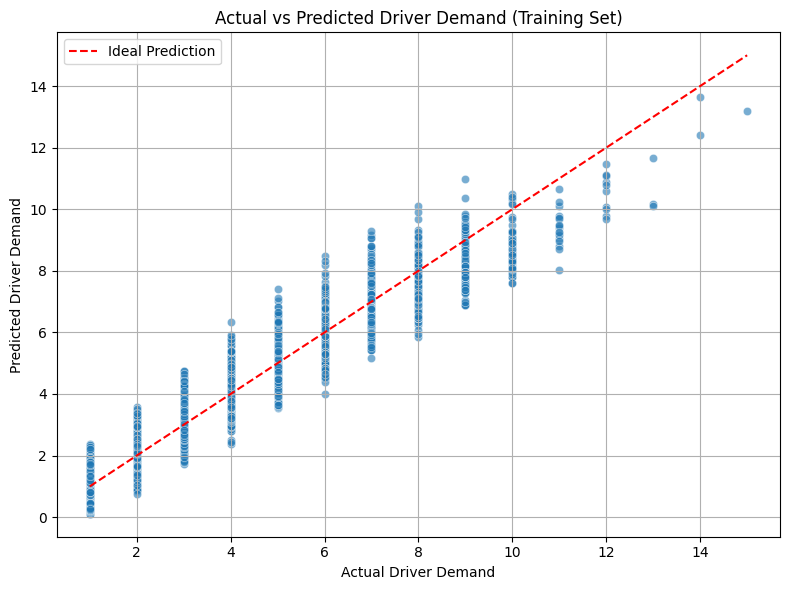

In [ ]:
# Predict on training data
y_train_pred = lr_base_pipeline.predict(X_train)

# Flatten arrays if needed
y_train_actual = y_train.values.flatten()
y_train_pred_flat = y_train_pred.flatten()

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_train_actual, y=y_train_pred_flat, alpha=0.6)
plt.plot([y_train_actual.min(), y_train_actual.max()],
         [y_train_actual.min(), y_train_actual.max()],
         color='red', linestyle='--', label='Ideal Prediction')

plt.xlabel('Actual Driver Demand')
plt.ylabel('Predicted Driver Demand')
plt.title('Actual vs Predicted Driver Demand (Training Set)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
X_test = df_test_agg_new[numerical_cols + categorical_cols]

In [ ]:
# Fit and predict
y_pred_lr = lr_base_pipeline.predict(X_test)

In [ ]:
# Store predictions in df_test if you want
df_test_agg_new["Predicted_Driver_Demand"] = y_pred_lr

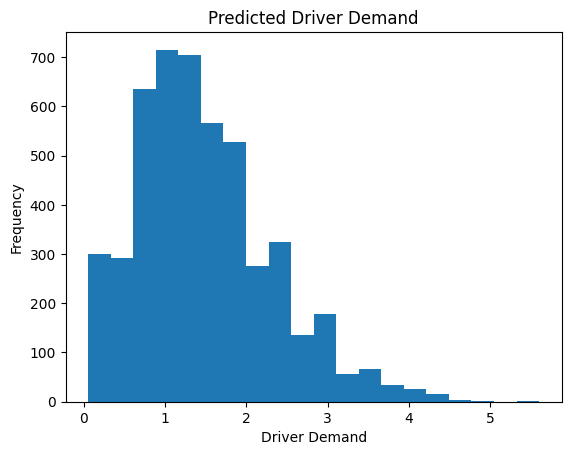

In [ ]:
# Distribution of predicted driver demand
df_test_agg_new["Predicted_Driver_Demand"].plot(kind='hist', bins=20, title='Predicted Driver Demand')
plt.xlabel('Driver Demand')
plt.show()

In [ ]:
# Retrieve feature names after one-hot encoding
encoded_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
all_feature_names = numerical_cols + list(encoded_feature_names)

# Coefficients
coefficients = lr_base_pipeline.named_steps['regressor'].coef_.flatten()
coefficients = np.round(coefficients, 2)

# Display
feature_importance = pd.DataFrame({
    'Feature': all_feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(feature_importance)

                         Feature  Coefficient
3                     Num_Orders         1.44
10     Road_traffic_density_Low         -0.80
0                    Distance_km         0.65
9      Road_traffic_density_Jam          0.32
11  Road_traffic_density_Medium         -0.26
21                 City_Code_BHP         0.21
7        Weatherconditions_Sunny        -0.19
18                 City_Code_ALH         0.15
26                 City_Code_HYD         0.08
20                City_Code_BANG         0.08
6       Weatherconditions_Stormy        -0.08
5   Weatherconditions_Sandstorms        -0.08
19                City_Code_AURG         0.08
28                 City_Code_JAP         0.07
22                City_Code_CHEN         0.06
23               City_Code_COIMB         0.06
30                 City_Code_KOC        -0.04
32                City_Code_LUDH         0.04
15             day_name_Thursday        -0.04
36              City_Code_RANCHI         0.04
29                 City_Code_KNP  

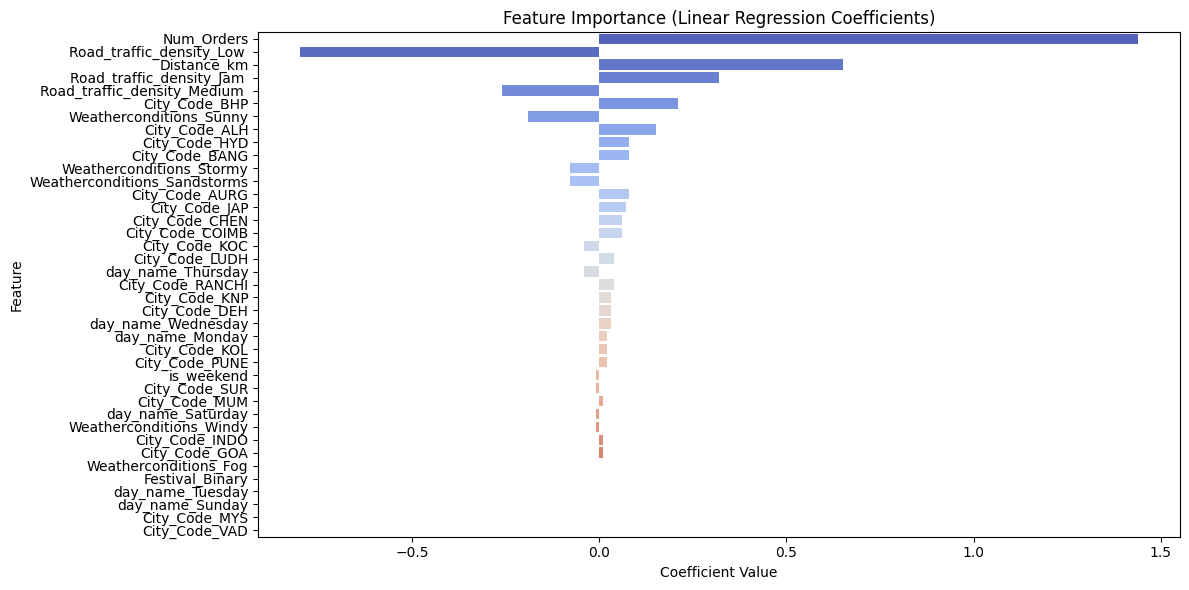

In [ ]:
# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance, x='Coefficient', y='Feature', palette='coolwarm')
plt.title('Feature Importance (Linear Regression Coefficients)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Hybrid Model (XGBoost on Residuals)

This model combines the predictive strength of Holt-Winters for trend and seasonality with XGBoost's capability to predict residuals based on other features. It is especially useful for time series forecasting when both structured periodic patterns and unpredictable external factors need to be accounted for.

In [ ]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score, KFold, train_test_split

In [ ]:
features = [
    'Road_traffic_density',
    'Weatherconditions',
    'Festival_Binary',
    'is_weekend',
    'Distance_km',
    'multiple_deliveries_1',
    'Time_taken(min)',
    'Shift_4',
    'day_name',
    'Num_Orders',
    'Order_Hour'
    ]

In [ ]:
df_encoded = pd.get_dummies(df_agg, columns=[
    'Road_traffic_density',
    'Weatherconditions',
    'multiple_deliveries_1',
    'Shift_4',
    'day_name'
    ])

In [ ]:
features = [col for col in df_encoded.columns if
            col.startswith('Road_traffic_density') or
            col.startswith('Weatherconditions') or
            col.startswith('multiple_deliveries') or
            col.startswith('Shift_4') or
            col.startswith('day_name') or
            col in ['Festival_Binary', 'is_weekend', 'Distance_km', 'Num_Orders', 'Time_taken(min)', 'Order_Hour']]

In [ ]:
## Compute Residuals
df_encoded['Residual'] = df_encoded['Driver_Demand'] - df_encoded['HW_Forecast']

In [ ]:
#Drop NA values from df_encoded, making sure to keep only the columns in `features` as well as the 'Residual' column.
df_encoded = df_encoded[features + ['HW_Forecast', 'Residual']].dropna()

X = df_encoded[features] # Select features
y = df_encoded['Residual']  # Select target

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=False)

xgb_residual_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)
xgb_residual_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
## Predict and Combine
# Predict Residuals for Validation data
df_encoded['Residual_Pred_XGB'] = xgb_residual_model.predict(df_encoded[features])

# Create combined prediction (Actual forecast + residual prediction)
df_encoded['Hybrid_Pred_XGB'] = df_encoded['HW_Forecast'] + df_encoded['Residual_Pred_XGB']

In [ ]:
## Evaluate Performance
mae_xgboost = mean_absolute_error(df_agg.loc[X_val.index, 'Driver_Demand'], df_encoded.loc[X_val.index, 'Hybrid_Pred_XGB'])
rmse_xgboost = np.sqrt(mean_squared_error(df_agg.loc[X_val.index, 'Driver_Demand'],
                                          df_encoded.loc[X_val.index, 'Hybrid_Pred_XGB']))

print(f"Hybrid XGBoost (No lags) MAE: {mae_xgboost:.2f}, RMSE: {rmse_xgboost:.2f}")

Hybrid XGBoost (No lags) MAE: 0.53, RMSE: 0.70


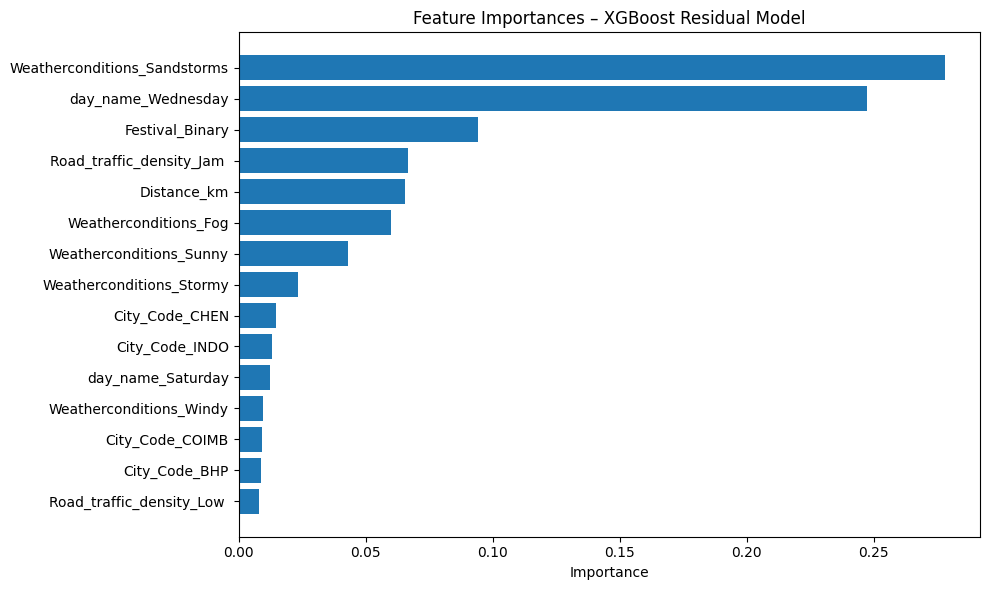

In [ ]:
# Extract fitted XGBoost model
importances = xgb_residual_model.feature_importances_

# 4. Zip and sort
feature_importance_df = sorted(zip(all_feature_names, importances), key=lambda x: x[1], reverse=True)

# 5. Plot top 15
top_n = 15
labels, scores = zip(*feature_importance_df[:top_n])
plt.figure(figsize=(10, 6))
plt.barh(labels[::-1], scores[::-1])
plt.title("Feature Importances – XGBoost Residual Model")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()



# Streamlit UI

The below code is for the generation & execution of the Streamlit UI for the prediction.
This section contains a replica of sections of the code in this Notebook that is fed to the Streamlit Engine for the UI Generation and Execution

In [ ]:
%%writefile app.py
# Streamlit Code Starts Here

import streamlit as st
from streamlit_folium import folium_static
from datetime import datetime
import folium
import pandas as pd
import pickle
from sklearn.preprocessing import StandardScaler
import math
from PIL import Image, ImageFile

driver_demand = 0
# Load saved model and preprocessing objects
try:

    # Load the HW model
    with open('hw_model.pkl', 'rb') as file:
      hw_model = pickle.load(file)

    # Load the RF model
    with open('rf_model.pkl', 'rb') as file:
        rf = pickle.load(file)

    # Load the scaler
    with open('scaler.pkl', 'rb') as file:
        scaler = pickle.load(file)

    # Load column information
    with open('model_columns.pkl', 'rb') as file:
        model_columns = pickle.load(file)
        df_encoded = pd.DataFrame(columns=model_columns['encoded_columns'])

except Exception as e:
    st.error(f"Error loading model files. Please ensure model files are in the same directory.")

# ---------- New UI -----------------------

st.title("Delivery Driver Demand Prediction")

try:

    ImageFile.LOAD_TRUNCATED_IMAGES = True
    image = Image.open("delivery_banner.png")
    st.image(image, use_container_width=True)
except FileNotFoundError:
    st.warning("Please place a 'delivery_banner.png' file in the same directory for the banner.")


# --- Sidebar for Inputs ---
with st.sidebar:
    st.header("Delivery Order")

    order_city = st.selectbox("City", ["INDO", "BANG", "COIMB", "CHEN", "HYD", "RANCHI", "MYS", "DEH", "KOC", "PUNE", "LUDH", "KNP", "MUM", "KOL", "JAP", "SUR", "GOA", "AURG", "AGR", "VAD", "ALH", "BHP"])
    order_time = st.slider("Order Time (24-hour format)", min_value=0.0, max_value=23.5, step=0.5, value=12.0)
    order_date = st.date_input("Order Date")
    order_day = st.selectbox("Order Day", ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
    is_festival = st.checkbox("Is Festival?")
    distance = st.number_input("Distance", value=0.0)
    time_taken = st.number_input("Time Taken(min)", value=0)
    shift = st.selectbox("Shift", ["Morning", "Afternoon", "Evening", "Low Demand"])
    traffic_density = st.slider("Traffic Density)", min_value=0, max_value=4, value=2)
    num_orders = st.number_input("Number of Orders", value=1)
    weather = st.selectbox("Weather Conditions", ["Sunny", "Stormy", "Sandstorms", "Cloudy", "Fog", "Windy"])

# --- Main Area with Two Columns ---
col1, col2 = st.columns(2)

with col1:
     st.subheader("Input Summary")
     st.write(f"**Timestamp:** {pd.to_datetime(order_date) + pd.to_timedelta(order_time, unit='h')}")
     st.write(f"**City Code:** {order_city}")
     st.write(f"**Order Hour:** {order_time}")
     st.write(f"**Order Date:** {order_date}")
     st.write(f"**Day of the Week:** {order_day}")
     st.write(f"**Festival:** {'Yes' if is_festival else 'No'}")
     st.write(f"**Weekend:** {'Yes' if order_day in ['Saturday', 'Sunday'] else 'No'}")
     st.write(f"**Shift:** {shift}")
     st.write(f"**Road Traffic Density:** {'Low' if traffic_density==1 else 'Medium' if traffic_density==2 else 'High' if traffic_density==3 else 'Jam'}")
     st.write(f"**Multiple Deliveries:** {'Yes' if num_orders > 1 else 'No'}")
     st.write(f"**Number of Orders:** {num_orders}")
     st.write(f"**Weather Conditions:** {weather}")
     st.write(f"**Time Taken (min):** {time_taken}")
     st.write(f"**Distance (km):** {distance}")

with col2:
     st.subheader("Demand Prediction")
     st.info("Prediction of Number of Drivers Required")


# Updated function with driver demand prediction
def predict_delivery_time_and_demand(
    order_city, order_time,
    order_date, order_day, is_festival, distance, time_taken, shift, traffic_density,
    num_orders, weather
):
    # Placeholder for delivery time prediction
    # delivery_time = 30  # Example prediction in minutes

    try:
        # Convert order_date to features (month, day, etc.) if needed
        month = order_date.month
        day_of_month = order_date.day

        # Create a dictionary with user inputs for driver demand prediction
        user_inputs = {
            'Timestamp' : pd.to_datetime(order_date) + pd.to_timedelta(order_time, unit='h'),
            'City_Code': order_city,
            'Order_Hour': order_time,
            'Order_Date': order_date,
            'day_name': order_day,
            'Festival_Binary': 1 if is_festival else 0,
            'is_weekend': 1 if order_day in ['Saturday', 'Sunday'] else 0,
            'Shift_4': shift,
            'Road_traffic_density': 'Low' if traffic_density==1 else 'Medium' if traffic_density==2 else 'High' if traffic_density==3 else 'Jam',
            'multiple_deliveries_1': 1 if num_orders > 1 else 0,
            'Num_Orders': num_orders,
            'Weatherconditions': weather,
#            'avg_delivery_time': avg_delivery_time,
#            'driver_availability': driver_availability,
            'Time_taken(min)': time_taken,
            'Distance_km' : distance
        }

        # Create a dataframe with a single row containing user inputs
        input_df = pd.DataFrame([user_inputs])

        # Get category and numerical columns from loaded model info
        cat_cols_hw = model_columns['categorical_columns']
        num_cols_hw = model_columns['numerical_columns']

        # Process categorical features
        input_df_encoded_cat = pd.get_dummies(input_df[cat_cols_hw], drop_first=True)

        # Process numerical features
        input_df_encoded_num = pd.DataFrame(
            scaler.transform(input_df[num_cols_hw]),
            columns=num_cols_hw
        )

        # Combine features
        input_df_encoded = pd.concat([input_df_encoded_cat, input_df_encoded_num], axis=1)

        # Ensure all columns from training data are present
        for col in model_columns['encoded_columns']:
            if col not in input_df_encoded.columns:
                input_df_encoded[col] = 0

        # Ensure columns are in the same order as during training
        input_df_encoded = input_df_encoded[model_columns['encoded_columns']]

        # Holt-Winters Prediction
        try:
            # Create a Pandas Timestamp from the input date and time
            prediction_timestamp = pd.to_datetime(order_date) + pd.to_timedelta(order_time, unit='h')

            # Predict HW_Forecast for the input timestamp
            input_df['HW_Forecast'] = hw_model.predict(start=input_df.index[0], end=input_df.index[0]).iloc[0]

            # hw_forecast_value = hw_model.predict(start=prediction_timestamp, end=prediction_timestamp).iloc[0]
            # This throws an error "Holt-Winters prediction failed:
            #                     'The start argument could not be matched to a location related
            #                     to the index of the data.'. Using fallback value."
            # input_df['HW_Forecast'] = hw_forecast_value
        except Exception as e:
            st.warning(f"Holt-Winters prediction failed: {e}. Using fallback value.")
            # Fallback: Use a default or historical-based forecast
            input_df['HW_Forecast'] = input_df['Driver_Demand'].mean()  # Simplistic fallback
            # Alternatively, load historical data and refit if available:
            # historical_df = pd.read_csv('historical_driver_demand.csv')
            # combined_data = pd.concat([historical_df, input_df]).sort_index()
            # hw_model_refit = ExponentialSmoothing(
            #     combined_data['Driver_Demand'],
            #     trend='add',
            #     seasonal='add',
            #     seasonal_periods=24
            # ).fit()
            # input_df['HW_Forecast'] = hw_model_refit.predict(start=input_df.index[0], end=input_df.index[0]).iloc[0]


        # Make prediction for residual
        residual_pred = rf.predict(input_df_encoded)[0]

        # hw_forecast Prediction Not Working
        # hw_forecast = input_df['HW_Forecast'].iloc[0]

        # Use a default HW forecast value or calculate based on time features
        hw_forecast = 3.17  # Replaced with mean from trining

        # Calculate final hybrid prediction
        # driver_demand = hw_forecast + residual_pred
        driver_demand = hw_forecast + residual_pred
        with col2:
          st.success(f"Predicted Driver Demand: {math.ceil(driver_demand)} drivers")

    except Exception as e:
        st.error(f"Prediction error: {e}")
        driver_demand = 0  # Fallback value

    return user_inputs, driver_demand


with st.sidebar:
  # Predict button
  if st.button("Predict"):
      delivery_time, driver_demand = predict_delivery_time_and_demand(
          order_city, order_time,
          order_date, order_day, is_festival, distance, time_taken, shift, traffic_density,
          num_orders, weather
      )
  #    st.success(f"input_df_encoded: {delivery_time} ")



Writing app.py


In [ ]:
# Initialize NGrok Tunnel and run streamlit App
# This requires the ngrok tunnel to be started manually
#    ngrok auth token set to Sharath's account
# Might throw an error (to debug) but app will run

from pyngrok import ngrok

# Start Streamlit app
!streamlit run app.py &>/dev/null&
# ngrok.set_auth_token("2thiYjV2Q9qkCuD5orEKRtKj8by_4AjsuNuwc8Xm55UzwVBgS")
# Set up ngrok tunnel
# ngrok config add-authtoken 2s9hTp73lKY1x7HBLYHGBLG6lVg_5Xx6tS9odrkitb1e8sib4

# public_url = ngrok.connect(addr='8502')
# print("Streamlit app is running at:", public_url)
ngrok.set_auth_token("2thiYjV2Q9qkCuD5orEKRtKj8by_4AjsuNuwc8Xm55UzwVBgS")
public_url = ngrok.connect(addr='8502')
print("Streamlit app is running at:", public_url)

Streamlit app is running at: NgrokTunnel: "https://b0b7-35-236-132-207.ngrok-free.app" -> "http://localhost:8502"


# Direct XGBoost

In [ ]:
features_1 = [
    'Road_traffic_density',
    'Weatherconditions',
    #'Festival_Binary',
    'is_weekend',
    'Distance_km',
    'multiple_deliveries_1',
    'Time_taken(min)',
    'Shift_4',
    'day_name',
    'Num_Orders',
    'Order_Hour'
    ]

In [ ]:
# Separate features and target
X_1 = df_agg[['Road_traffic_density',
    'Weatherconditions',
    #'Festival_Binary',
    'is_weekend',
    'Distance_km',
    'multiple_deliveries_1',
    'Time_taken(min)',
    'Shift_4',
    'day_name',
    'Num_Orders',
    'Order_Hour'
    ]]
y_1 = df_agg[['Driver_Demand']]

# Define categorical columns
cat_cols = ['Road_traffic_density', 'Weatherconditions', 'multiple_deliveries_1', 'day_name', 'Shift_4']

# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ],
    remainder='passthrough'
    )

In [ ]:
# Split into train/validation
X_train_1, X_val_1, y_train_1, y_val_1 = train_test_split(X_1, y_1, test_size=0.2, shuffle=False)

# Create pipeline with preprocessing + XGB
model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('xgb', xgb.XGBRegressor(
        objective='reg:squarederror',
        n_estimators=100,
        learning_rate=0.1,
        max_depth=4,
        random_state=42
        ))
    ])

# Fit model
model.fit(X_train_1, y_train_1)

# Predict
y_pred_1 = model.predict(X_val_1)

# Round to match demand units
y_pred_1 = np.ceil(y_pred_1).astype(int)

In [ ]:
# Evaluate
mae_xgb = mean_absolute_error(y_val_1, y_pred_1)
rmse_xgb = np.sqrt(mean_squared_error(y_val_1, y_pred_1))

print(f"Direct XGB Model Performance MAE: {mae_xgb:.2f}, RMSE: {rmse_xgb:.2f}, R²: {r2_score(y_val_1, y_pred_1):.2f}")

Direct XGB Model Performance MAE: 0.52, RMSE: 0.72, R²: 0.89


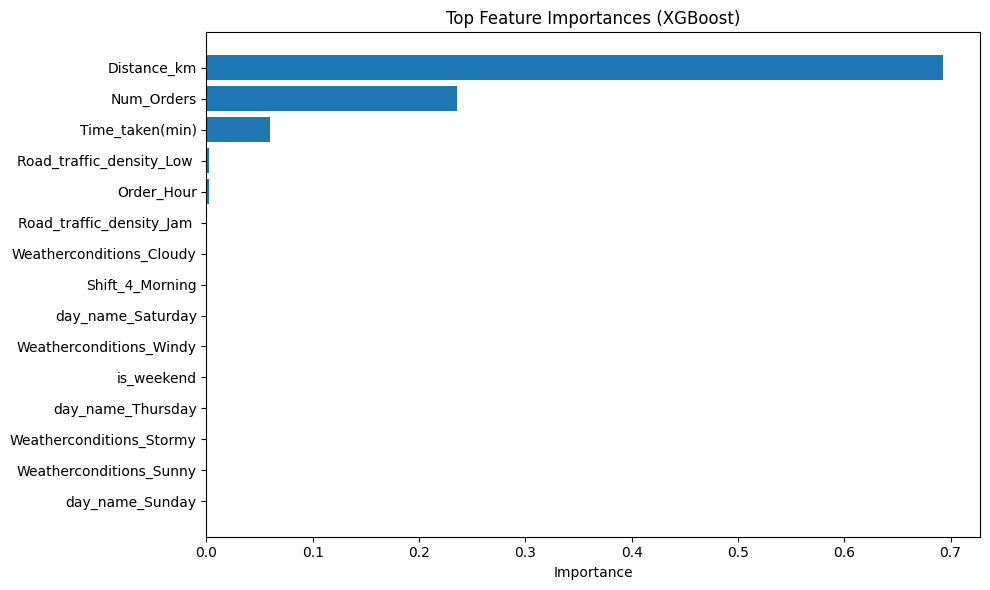

In [ ]:
# 1. Get the OneHotEncoder categories
ohe = model.named_steps['preprocess'].named_transformers_['cat']
encoded_cat_features = ohe.get_feature_names_out(cat_cols)

# 2. Get final feature names (encoded + passthrough numerical)
numerical_cols = [col for col in features_1 if col not in cat_cols]
all_feature_names_1 = list(encoded_cat_features) + numerical_cols

# 3. Get feature importances from the XGBoost model
xgb_model_1 = model.named_steps['xgb']
importances_1 = xgb_model_1.feature_importances_

# 4. Zip and sort
feature_importance_df_1 = sorted(zip(all_feature_names_1, importances_1), key=lambda x: x[1], reverse=True)

# 5. Plot top 15
top_n = 15
labels, scores = zip(*feature_importance_df_1[:top_n])
plt.figure(figsize=(10, 6))
plt.barh(labels[::-1], scores[::-1])
plt.title("Top Feature Importances (XGBoost)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

# Results of all the Models

In [ ]:
print(f"Expanding Mean Model Performance MAE: {mae_exp:.2f}, RMSE: {rmse_exp:.2f}")
print(f"Previous Week Model Performance MAE: {mae_prev:.2f}, RMSE: {rmse_prev:.2f}")
print(f"Expanding Mean Model + Previous Week Model Performance MAE: {mae_exp_lw:.2f}, RMSE: {rmse_exp_lw:.2f}")
print(f"Holt-Winters MAE: {mae_hw:.2f}, RMSE: {rmse_hw:.2f}")
print(f"Residual MAE: {mae_rf:.2f}, RMSE: {rmse_rf:.2f} (not full forecast)")
print(f"Hybrid MAE: {mae_hybrid:.2f}, RMSE: {rmse_hybrid:.2f}")
print(f"Hybrid XGBoost MAE: {mae_xgboost:.2f}, RMSE: {rmse_xgboost:.2f}")
print(f"Direct XGB Model Performance MAE: {mae_xgb:.2f}, RMSE: {rmse_xgb:.2f}, R²: {r2_score(y_val_1, y_pred_1):.2f}")

Expanding Mean Model Performance MAE: 1.39, RMSE: 1.85
Previous Week Model Performance MAE: 2.48, RMSE: 3.20
Expanding Mean Model + Previous Week Model Performance MAE: 1.39, RMSE: 1.85
Holt-Winters MAE: 1.12, RMSE: 1.50
Residual MAE: 3.70, RMSE: 4.08 (not full forecast)
Hybrid MAE: 0.19, RMSE: 0.27
Hybrid XGBoost MAE: 0.53, RMSE: 0.70
Direct XGB Model Performance MAE: 0.52, RMSE: 0.72, R²: 0.89


In [ ]:
model_results = {
    'Model': [
        'Expanding Mean Model',
        'Previous Week Model',
        'Expanding Mean + Previous Week Model',
        'Holt-Winters Model',
        'Residuals (Holt-Winters Model)', #forecast based on the residuals of the Holt-Winters model
        'Hybrid Model (HW + Residual RF)',
        'Hybrid Model (HW + Residual XGB)',
        'Direct XGBoost Model'
    ],
    'MAE': [mae_exp, mae_prev, mae_exp_lw, mae_hw, mae_rf, mae_hybrid, mae_xgboost, mae_xgb],
    'RMSE': [rmse_exp, rmse_prev, rmse_exp_lw, rmse_hw, rmse_rf, rmse_hybrid, rmse_xgboost, rmse_xgb],
    'Notes': [
        '',
        '',
        '',
        '',
        'Not full forecast',
        '',
        '',
        f'R²: {r2_score(y_val_1, y_pred_1):.2f}'
        ]
    }

pd.DataFrame(model_results)

Model       MAE      RMSE              Notes
0                  Expanding Mean Model  1.389062  1.852160                   
1                   Previous Week Model  2.481898  3.200890                   
2  Expanding Mean + Previous Week Model  1.389062  1.852160                   
3                    Holt-Winters Model  1.115502  1.497166                   
4        Residuals (Holt-Winters Model)  3.698386  4.079732  Not full forecast
5       Hybrid Model (HW + Residual RF)  0.194823  0.268944                   
6      Hybrid Model (HW + Residual XGB)  0.529830  0.700466                   
7                  Direct XGBoost Model  0.524390  0.724148           R²: 0.89

### Hybrid Model (HW + Residual RF)

The **Hybrid Model (HW + Residual RF)** combines **Holt-Winters Exponential Smoothing (HW)** and **Random Forest (RF)** to improve time series forecasting for driver demand prediction.

#### **1. Holt-Winters Exponential Smoothing (HW)**
The **HW** model captures the **seasonality** and **trend** of driver demand over time. It generates a forecast based on historical data, accounting for periodic fluctuations and long-term trends.

#### **2. Random Forest for Residuals**
After generating the HW forecast, we compute the **residuals** (the difference between the actual demand and the HW forecast). These residuals represent errors that the HW model didn't capture. A **Random Forest Regressor** is then trained on various features (e.g., weather, traffic, time of day) to predict these residuals.

#### **3. Hybrid Prediction**
The final prediction is obtained by adding the residuals predicted by the Random Forest model to the Holt-Winters forecast:

Hybrid Prediction = HW Forecast + Residual Prediction

This hybrid approach improves forecast accuracy by adjusting for the errors in the initial HW prediction.

#### **Why It Works for Driver Demand**
- **HW** handles seasonality and trends in driver demand.
- **Random Forest** captures complex factors (like traffic and weather) affecting demand that aren't accounted for by the HW model.
- The combination results in more accurate driver demand predictions, minimizing errors and improving forecasting performance.

This method is particularly useful when you need to account for both recurring patterns (seasonality, time of day) and unpredictable factors (traffic, weather).